# 线性规划和整数规划

可以利用`lpSolve`包里的lp()函数。

```r
lp (direction = "min", objective.in, const.mat, const.dir, const.rhs,
	transpose.constraints = TRUE, int.vec, presolve=0, compute.sens=0,
        binary.vec, all.int=FALSE, all.bin=FALSE, scale = 196, dense.const, 
        num.bin.solns=1, use.rw=FALSE, timeout = 0L)
```

主要参数解释：
- `direction`：字符字符串，指定优化的方向：“min”（默认）或“max”。
- `objective.in`：数值向量，目标函数的系数。
- `const.mat`：数值约束系数的矩阵，每个约束一行，每个变量一列（除非transpose.constraints = FALSE；见下面的解释）。
- `const.dir`：字符字符串向量，给出每一个约束方程的约束方向：每个值应为“<”，“< =”，“=”，“==”，“>”，或“> =”中的一个。
- `const.rhs`：数值向量，即每一个约束方程不等式或等式右边的常数值。
- `transpose.constraints`：默认为TRUE的情况下，每个约束占据`const.mat`的一行，在将该矩阵传递给优化代码之前需要对其进行转置。对于非常大的约束矩阵，可能更明智的做法是逐列构建约束矩阵。在这种情况下，需要将transpose.constraints设置为`FALSE`。
- `all.int`：逻辑值：决定是否所有变量都应为整数。默认值为FALSE。
- `int.vec`：数值向量，给出要求为整数的变量的索引。因此，该向量的长度将是整数变量的数量。
- `all.bin`：逻辑值：是否所有变量都应为二进制？默认值：FALSE。
- `binary.vec`：类似int.vec的数值向量，给出要求为二进制的变量的索引。
- `presolve`：数值：决定是否进行预处理。默认为0（否）；任何非零值表示“是”。目前忽略。
- `compute.sens`：数值：决定是否计算灵敏度。默认为0（否）；任何非零值表示“是”。


scale
整数：lpSolve缩放的值。详细信息可以在lpSolve文档中找到。设置为0表示不进行缩放。默认值：196。

dense.const
三列的稠密约束数组。如果提供了const.mat，则会忽略此选项。否则，列是约束编号、列编号和值；每个非零约束矩阵中的条目应有一行。

num.bin.solns
整数：如果all.bin=TRUE，则用户可以请求返回最多num.bin.solns个最优解。

use.rw
逻辑值：如果为TRUE且num.bin.solns > 1，则在第一个解后为每个解将lp写入文件并重新读取。这只是为了克服某个地方的错误。虽然默认值为FALSE，但我们建议您将其设置为TRUE，如果您需要num.bin.solns > 1，直到找到错误为止。

timeout
整数：超时变量，以秒为单位，默认值为0L，表示没有设置限制。

通过`$solution`, `$objval`获取决策变量的值和目标函数的解。

## 运输问题

运输问题属于线性规划问题，可以根据模型按照线性规划的方式求解，但由于其特殊性，用常规的线性规划来求解并不是最有效的方法。lpSolve包提供了函数lp.transport() 来求解运输问题。

```r
lp.transport (cost.mat, direction="min", row.signs, row.rhs, col.signs,
              col.rhs, presolve=0, compute.sens=0, integers = 1:(nc*nr) )
```

主要参数解释：
- cost.mat：成本矩阵；第ij个元素是从源i到目的地j运输一个物品的成本。
- direction：“min”或“max”。
- row.signs：字符字符串向量，给出行约束的方向：每个值应为“<”，“< =”，“=”，“==”，“>”，或“> =”。
- col.signs：字符字符串向量，给出列约束的方向：每个值应为“<”，“< =”，“=”，“==”，“>”，或“> =”。
- row.rhs：数值向量，行约束等式或不等式右边的值。
- col.rhs：数值向量，列约束等式或不等式右边的值。
presolve
数值：是否预处理？默认为0（否）；任何非零值表示“是”。目前忽略。
- compute.sens：数值：是否计算敏感性？默认为0（否）；任何非零值表示“是”。

integers
整数向量，其中第i个元素给出第i个整数变量的索引。其长度将是整数变量的数量。默认值：所有变量均为整数。设置为NULL表示没有变量为整数。

## 指派问题

复杂的规划优化问题，可以利用专门软件lingo求解。

# 图论

## 最短路算法

### 固定起点的最短路

可以使用`shortest_pathes()`函数计算两点之间的最短距离：
```r
shortest_paths(
  graph,
  from,
  to = V(graph),
  mode = c("out", "all", "in"),
  weights = NULL,
  output = c("vpath", "epath", "both"),
  predecessors = FALSE,
  inbound.edges = FALSE,
  algorithm = c("automatic", "unweighted", "dijkstra", "bellman-ford")
)
```

参数：
- `graph`：要处理的图形对象。
- `from`：数值常量，参数指定将计算最短路径的起始顶点或目标顶点。<span style = 'color:red'><strong>注意，目前它不能赋值为顶点ID的向量，而仅仅只能赋值单独顶点的标号。</strong></span>
- `to`：数值向量，参数指定将计算最短路径的目标顶点。默认情况下，它包含所有顶点。也可以单独指定一个顶点。
- `mode`：字符常量，用于指定在<span style = 'color:red'><strong>有向图</strong></span>中计算给定顶点的最短路径是从该顶点出发还是到达该顶点。如果是"`out`"，则计算从给定顶点出发的最短路径；如果是"`in`"，则计算到达给定顶点的最短路径；如果是"`all`"，则使用相应的无向图（即搜索非有向路径）。<span style = 'color:red'><strong>对于无向图，此参数被忽略。</strong></span>
- `weights`：参数可以是一个数值向量，用于给出边的权重。如果该参数为NULL，并且图中有一个weight边属性，则将使用该属性。如果该参数为NA，则不使用权重（即使图中有权重属性）。
- `output`：字符标量，定义如何报告计算好的最短路径。"vpath"表示报告路径上的顶点（这种形式在igraph版本0.6之前使用）；"epath"表示报告路径上的边；"both"表示同时返回两种形式，以带有"vpath"和"epath"两个组件的命名列表的形式返回。
- `algorithm`：用于计算的算法。默认情况下，igraph会尝试选择最快的合适算法。如果没有权重，则使用无权重的广度优先搜索算法；<span style = 'color:red'><strong>有向图如果所有权重都是正数</strong></span>，则使用Dijkstra算法；如果有负权重并且计算源超过100个，则使用Johnson算法；否则使用Bellman-Ford算法。可以通过明确给出此参数来覆盖igraph的选择。
- `predecessors`：逻辑标量，是否返回每个顶点的前导顶点。树中顶点i的前导顶点是从中到达顶点i的顶点。起始顶点（在from参数中）的前导顶点根据定义是它自己。如果前导顶点为零，则意味着在搜索期间未从源到达给定的顶点。注意，如果到达所有to中的顶点，则搜索终止。
- `inbound.edges`：逻辑标量，是否返回每个顶点的入边。树中顶点i的入边是到达顶点i的边。起始顶点和未在搜索期间到达的顶点在向量的相应条目中为零。注意，如果到达所有to中的顶点，则搜索终止。

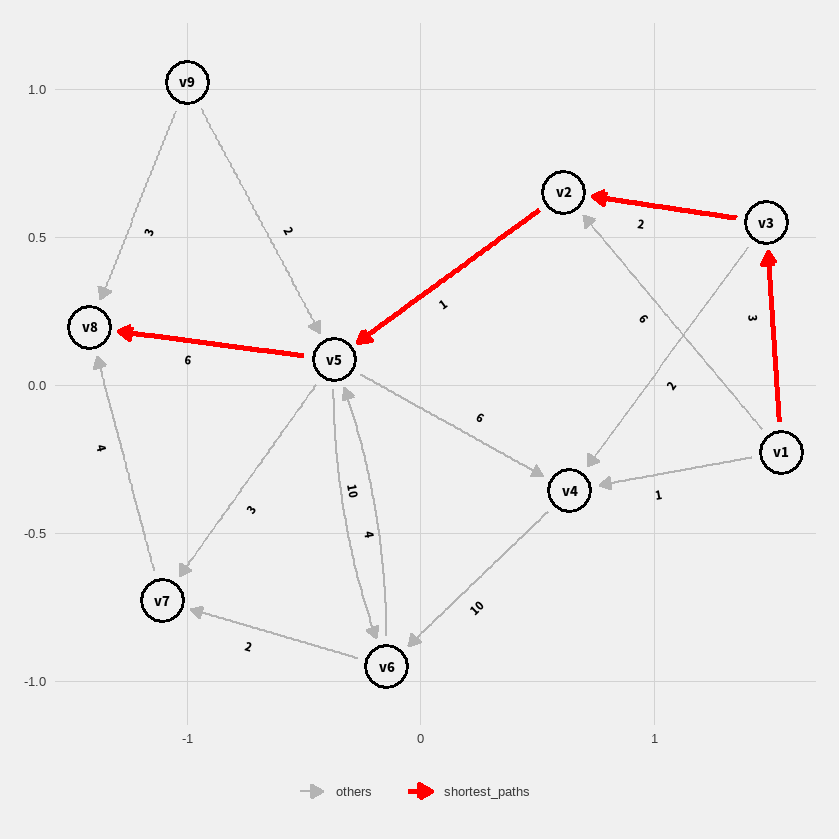

In [5]:
# 有向图
library(tidygraph)
library(igraph)
library(ggraph)
library(ggthemes)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()

from <- c(1, 1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6, 6, 7, 9, 9)
to <- c(2, 3, 4, 5, 2, 4, 6, 4, 6, 7, 8, 5, 7, 8, 5, 8)
weight <- c(6, 3, 1, 1, 2, 2, 10, 6, 4, 3, 6, 10, 2, 4, 2, 3)
name <- paste0("v", seq(1, 9))
edges <- data.frame(from = from, to = to, weight = weight)
nodes <- data.frame(name = name)
graph <- tbl_graph(
  nodes = nodes,
  edges = edges,
  directed = TRUE
)
result <- shortest_paths(
  graph, 
  from = 1, 
  to = 8, 
  mode = "out",
  algorithm = "Dijkstra", 
  output = "both"
  )

shortest_paths <- as.numeric(result$epath[[1]])
as_data_frame(graph, "edges") %>%
  mutate(
    path_id = seq(1, nrow(as_data_frame(graph, "edges"))),
    diff = ifelse(path_id%in%shortest_paths, "shortest_paths", "others")
) -> new_edges
new_nodes <- as_data_frame(graph, "vertices")

plot <- tbl_graph(nodes = new_nodes, edges <- new_edges, directed = TRUE)
ggraph(plot, layout = "stress")+
  geom_edge_fan(
    aes(label = weight, color = diff, edge_width = diff),
    arrow = arrow(length = unit(8, "pt"), type = "closed"),
    angle_calc = "along",
    label_dodge = unit(12, "pt"),
    label_push = unit(12, "pt"),
    start_cap = circle(18, "pt"),
    end_cap = circle(18, "pt"),
    family = "siyuan",
    label_size = 3
    )+
  geom_node_point(
    size = 11,
    shape = 21,
    stroke = 1.5
  )+
  geom_node_text(
    size = 3.5,
    aes(label = name),
    family = "siyuan"
  )+
  theme_fivethirtyeight()+
  scale_edge_color_manual(name = NULL, values = c("shortest_paths" = "red", "others" = "grey70"))+
  scale_edge_width_manual(name = NULL, values = c("shortest_paths" = 1.5, "others" = .8))+
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.1)))

$vpath
$vpath[[1]]
+ 9/11 vertices, named, from 2688ab6:
[1] v1  v2  v5  v6  v3  v7  v10 v9  v11


$epath
$epath[[1]]
+ 8/22 edges from 2688ab6 (vertex names):
[1] v1--v2  v2--v5  v5--v6  v3--v6  v3--v7  v7--v10 v9--v10 v9--v11


$predecessors
NULL

$inbound_edges
NULL



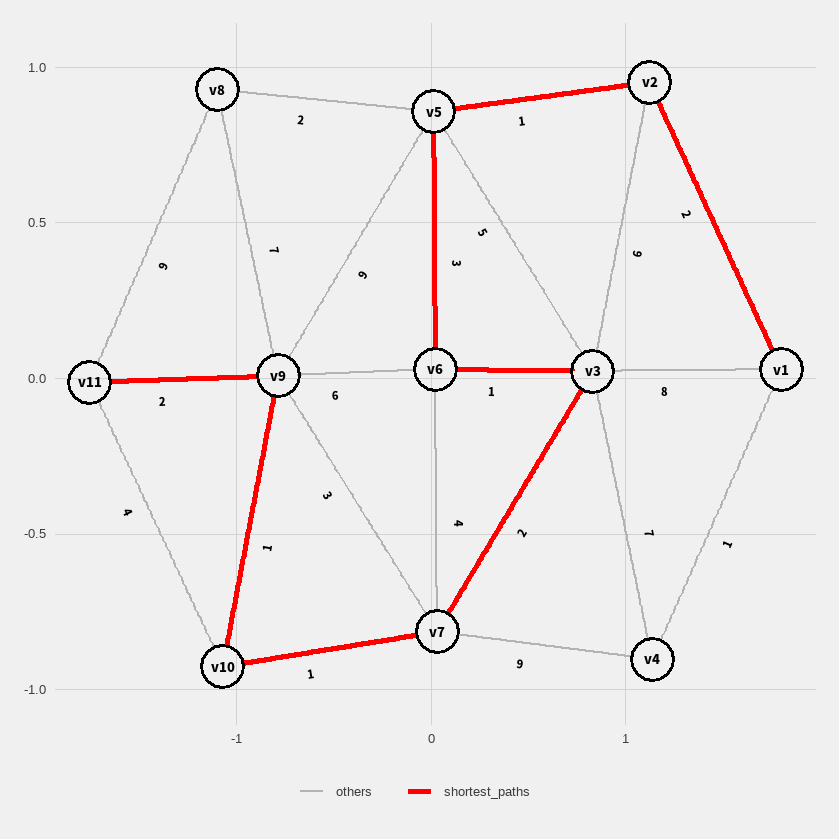

In [3]:
# 无向图
library(tidygraph)
library(igraph)
library(ggraph)
library(ggthemes)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()

adjmatrix <- matrix(c(
  0, 2, 8, 1, 0, 0, 0, 0, 0, 0, 0,
  2, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0,
  8, 6, 0, 7, 5, 1, 2, 0, 0, 0, 0,
  1, 0, 7, 0, 0, 0, 9, 0, 0, 0, 0,
  0, 1, 5, 0, 0, 3, 0, 2, 9, 0, 0,
  0, 0, 1, 0, 3, 0, 4, 0, 6, 0, 0,
  0, 0, 2, 9, 0, 4, 0, 0, 3, 1, 0,
  0, 0, 0, 0, 2, 0, 0, 0, 7, 0, 9,
  0, 0, 0, 0, 9, 6, 3, 7, 0, 1, 2,
  0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4,
  0, 0, 0, 0, 0, 0, 0, 9, 2, 4, 0),
  byrow = TRUE,
  nrow = 11
)
colnames(adjmatrix) <- paste0("v", seq(1:11))
rownames(adjmatrix) <- paste0("v", seq(1:11))

graph <- graph_from_adjacency_matrix(
  adjmatrix = adjmatrix,
  mode = "undirected",
  weighted = TRUE,
  )

result <- shortest_paths(
  graph, 
  from = 1, 
  to = 11, 
  algorithm = "Dijkstra", 
  output = "both"
  )

print(result)

shortest_paths <- as.numeric(result$epath[[1]]) # 返回路线的标号
as_data_frame(graph, "edges") %>%
  mutate(
    path_id = seq(1, nrow(as_data_frame(graph, "edges"))),
    diff = ifelse(path_id%in%shortest_paths, "shortest_paths", "others")
) -> new_edges
new_nodes <- as_data_frame(graph, "vertices")

plot <- tbl_graph(nodes = new_nodes, edges <- new_edges, directed = FALSE)
ggraph(plot, layout = "stress")+
  geom_edge_fan(
    aes(label = weight, color = diff, edge_width = diff),
    angle_calc = "along",
    label_dodge = unit(13, "pt"),
    label_push = unit(13, "pt"),
    start_cap = circle(12, "pt"),
    end_cap = circle(12, "pt"),
    family = "siyuan",
    label_size = 3
    )+
  geom_node_point(
    size = 11,
    shape = 21,
    stroke = 1.5
  )+
  geom_node_text(
    size = 3.5,
    aes(label = name),
    family = "siyuan"
  )+
  theme_fivethirtyeight()+
  scale_edge_color_manual(name = NULL, values = c("shortest_paths" = "red", "others" = "grey70"))+
  scale_edge_width_manual(name = NULL, values = c("shortest_paths" = 1.5, "others" = .8))+
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.1)))

### 任意两点之间的最短路

可以使用igraph中的`distances()`函数，各参数含义前面已经解释过：
```r
distances(
  graph,
  v = V(graph),
  to = V(graph),
  mode = c("all", "out", "in"),
  weights = NULL,
  algorithm = c("automatic", "unweighted", "dijkstra", "bellman-ford", "johnson")
)
```

In [2]:
library(tidygraph)
library(igraph)
library(ggraph)
library(ggthemes)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()

adjmatrix <- matrix(c(
  0, 20, 0, 0, 15, 0,
  20, 0, 20, 60, 25, 0,
  0, 20, 0, 30, 18, 0,
  0, 60, 30, 0, 0, 0,
  15, 25, 18, 0, 0, 15,
  0, 0, 0, 0, 15, 0
), byrow = TRUE, nrow = 6
)
colnames(adjmatrix) <- paste0("v", seq(1:6))
rownames(adjmatrix) <- paste0("v", seq(1:6))

graph <- graph_from_adjacency_matrix(
  adjmatrix,
  mode = "undirected",
  weighted = TRUE
)

result <- distances(
  graph, 
  mode = "out",
  algorithm = "bellman-ford"
  )

print(result)

   v1 v2 v3 v4 v5 v6
v1  0 20 33 63 15 30
v2 20  0 20 50 25 40
v3 33 20  0 30 18 33
v4 63 50 30  0 48 63
v5 15 25 18 48  0 15
v6 30 40 33 63 15  0


## 最小生成树

可以使用igraph包中的`mst()`（minimum spanning tree）函数：
```r
mst(graph, weights = NULL, algorithm = NULL, ...)
```

- `graph`：参数接受图形对象。
- `weights`：参数给出图中边权重的数值向量。权重的顺序由边的ID决定（即要保证边权重与边一一对应）。如果选择无权算法，则此参数被忽略。
- `algorithm`：用于计算最小生成树的算法。`unweighted`可以用于无权图，`prim`用于加权图（weighted graphs）。如果此参数为NULL（默认），则igraph将自动选择算法，选择规则如下：如果图中有一个非空的名为weight或者weights的边属性参数，则选择Prim算法；否则使用无权算法。

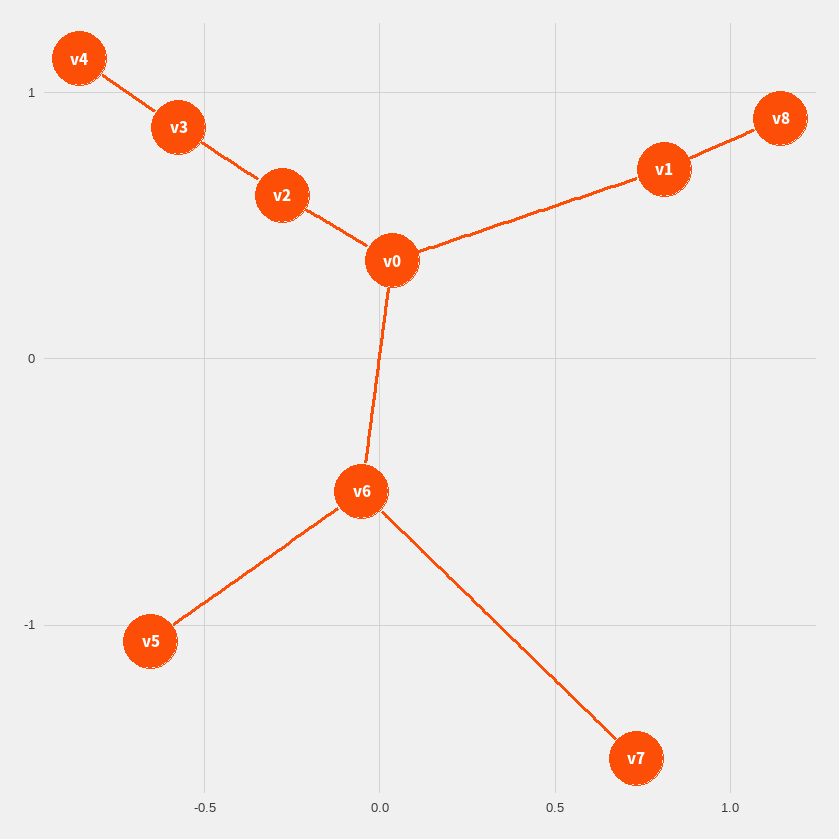

In [2]:
library(tidygraph)
library(igraph)
library(ggraph)
library(ggthemes)
library(showtext)
font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()
from <- c(rep(1, 8), rep(2:9, each = 3))
to <- c(seq(2, 9), 1, 3, 9, 1, 2, 4, 1, 3, 5, 1, 4, 6, 1, 5, 7, 1, 6, 8, 1, 7, 9, 1, 2, 8)
weight <- c(2, 1, 3, 4, 4, 2, 5, 4, 2, 4, 1, 1, 4, 1, 3, 1, 1, 4, 1, 5, 4, 5, 2, 2, 2, 3, 5, 3, 5, 4, 1, 5)
name <- paste0("v", seq(0, 8))
edges <- data.frame(from = from, to = to, weight = weight)
nodes <- data.frame(name = name)
graph <- tbl_graph(nodes = nodes, edges = edges, directed = FALSE)
result <- mst(graph, weights = weight, algiorithm = "prim")

ggraph(as_tbl_graph(result), layout = "kk")+
  geom_edge_fan(
    edge_color = "#FC4E07",
    edge_width = 1,
    start_cap = circle(6, "mm"),
    end_cap = circle(6, "mm")
  )+
  geom_node_point(
    shape = 21,
    size = 15,
    color = "#FC4E07",
    fill = "#FC4E07"
  )+
  geom_node_text(
    aes(label = name),
    color = "white",
    size = 4,
    family = "siyuan")+
  theme_fivethirtyeight()

## 着色问题

```r
greedy_vertex_coloring(graph, heuristic = c("colored_neighbors"))
```

参数：
- `graph`：要着色的图形对象。
- `heuristic`：选择下一个要考虑的顶点的启发式方法。目前只支持一种启发式方法："colored_neighbors"，它选择具有最大数量的已着色邻居的顶点

贪心算法在解决图的着色问题时通常是一种简单且快速的方法，但并不一定总是能够得到全局最优解。其优势在于计算速度快，适用于处理中小型的图，对于大型图也可能得到较好的近似解。
贪心算法对于每个顶点逐个着色，每次都选择当前可用的最小颜色，即与已着色邻居不冲突的最小颜色。然而，由于每次只考虑局部最优解，而不考虑全局最优解，可能会导致算法陷入局部最优解而无法达到全局最优解。这就是为什么贪心算法在某些情况下可能得到次优解或不同于最优解的着色方案的原因。因而，对于复杂的大型图或需要找到全局最优解的情况，需要考虑其他算法。

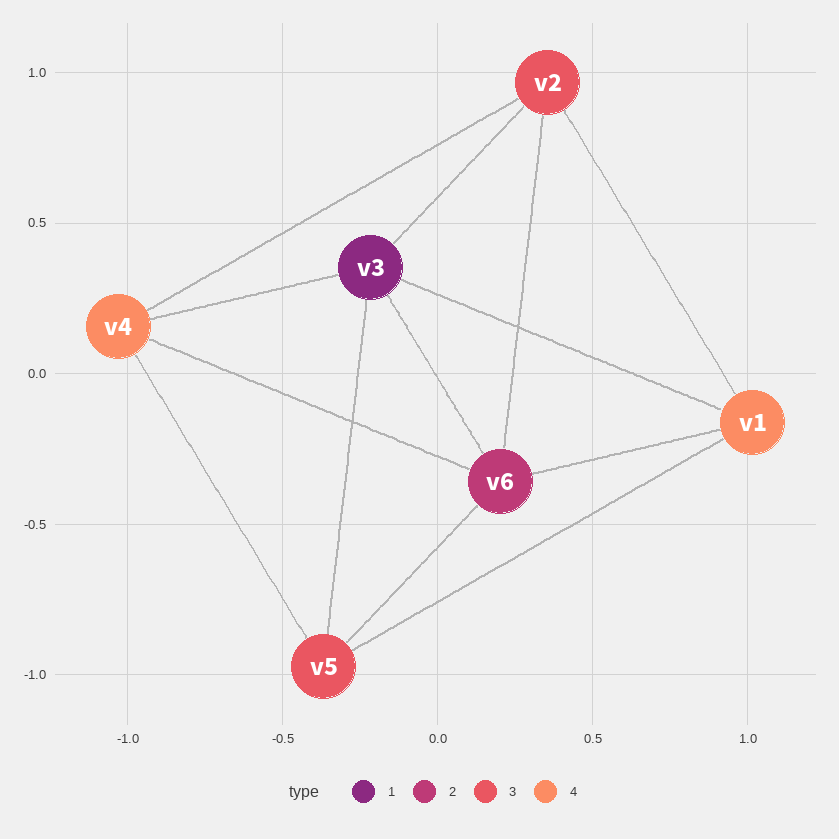

In [7]:
library(tidygraph)
library(igraph)
library(ggraph)
library(ggthemes)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()
from <- c(rep(c(1, 2, 4, 5), each = 4), rep(c(3, 6), each = 5))
to <- c(2, 3, 5, 6, 1, 3, 4, 6, 2, 3, 5, 6, 1, 3, 4, 6, 1, 2, 4, 5, 6, 1, 2, 3, 4, 5)
name <- paste0("v", seq(1, 6))
edges <- data.frame(from = from, to = to)
nodes <- data.frame(name = name)

graph <- tbl_graph(nodes = nodes, edges = edges, directed = FALSE)
color <- greedy_vertex_coloring(graph)
ggraph(graph, layout = "kk")+
  geom_edge_link(
    edge_color = "grey70",
    edge_width = .8,
    start_cap = circle(7, "mm"),
    end_cap = circle(7, "mm")
  )+
  geom_node_point(
    aes(color = as.character(color)),
    size = 18
  )+
  geom_node_text(
    aes(label = name),
    color = "white",
    size = 6,
    family = "siyuan"
    )+
  theme_fivethirtyeight()+
  scale_color_manual(values = viridis::viridis_pal(option = "magma", begin = .4)(length(color)))+
  scale_x_continuous(expand = expansion(mult = c(.1, .1)))+
  scale_y_continuous(expand = expansion(mult = c(.1, .1)))+
  guides(
    color = guide_legend(
        title = "type",
        override.aes = list(size= 6))
  )

## 最大流最小费用问题

最大流问题可以使用igraph包中的`max_flow()`函数：
```r
max_flow(graph, source, target, capacity = NULL)
```

参数解释：
- `graph`: 输入的图对象，即要进行最大流计算的有向图。
- `source`: 源节点的ID，即流量的起始节点。
- `target`: 汇节点的ID，即流量的目标节点。
- `capacity`: 一个数值向量，表示各边的容量。如果这个参数为NULL（默认值），则使用图中的边属性的`capacity`属性。<span style = 'color:red'><strong>需要注意的是，这个函数不使用边属性的`weight`属性</span></strong>。

max_flow()函数返回一个名为`flow_result`的列表，包含以下几个组成部分：
- `value`: 一个数值，表示最大流的值，即从源节点到汇节点的最大流量。
- `flow`: 一个数值向量，向量的每个元素对应每条边的流量值。对于无向图来说，该向量的元素可能为负数，负值表示流量从大的顶点流向小的顶点。正值表示流量从小的顶点流向大的顶点。
- `cut`: 一个数值向量，表示最小割的边的ID。可以根据最小边的信息扩大最大流。
- `partition1`: 一个数值向量，表示最小割中的第一部分顶点ID。
- `partition2`: 一个数值向量，表示最小割中的第二部分顶点ID。
- `stats`: 一个包含一些统计信息的列表，记录了`push-relabel`算法的一些操作次数。

In [2]:
library(tidygraph)
library(igraph)

from <- c(1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 6, 6, 7, 7)
to <- c(2, 3, 4, 3, 5, 6, 4, 5, 6, 7, 3, 7, 8, 5, 8, 6, 8)
name <- paste0("v", seq(1, 8))
capacity <- c(6, 4, 5, 3, 9, 9, 5, 6, 7, 3, 2, 5, 12, 8, 10, 4, 15)
edges <- data.frame(from = from, to = to)
nodes <- data.frame(name = name)

graph <- tbl_graph(
  nodes = nodes,
  edges = edges,
  directed = TRUE
)

result <- max_flow(
  graph,
  source = 1,
  target = 8,
  capacity = capacity
)

print(result)

$value
[1] 15

$flow
 [1] 6 4 5 0 0 6 0 0 1 3 0 5 0 0 7 0 8

$cut
[1] 1 2 3

$partition1
+ 1/8 vertex, named, from e445b96:
[1] v1

$partition2
+ 7/8 vertices, named, from e445b96:
[1] v2 v3 v4 v5 v6 v7 v8

$stats
$stats$nopush
[1] 6

$stats$norelabel
[1] 0

$stats$nogap
[1] 0

$stats$nogapnodes
[1] 0

$stats$nobfs
[1] 1




最大流可以由igraph中的简便函数`max_flow()`实现，

## 社区发现

### cluster_louvain

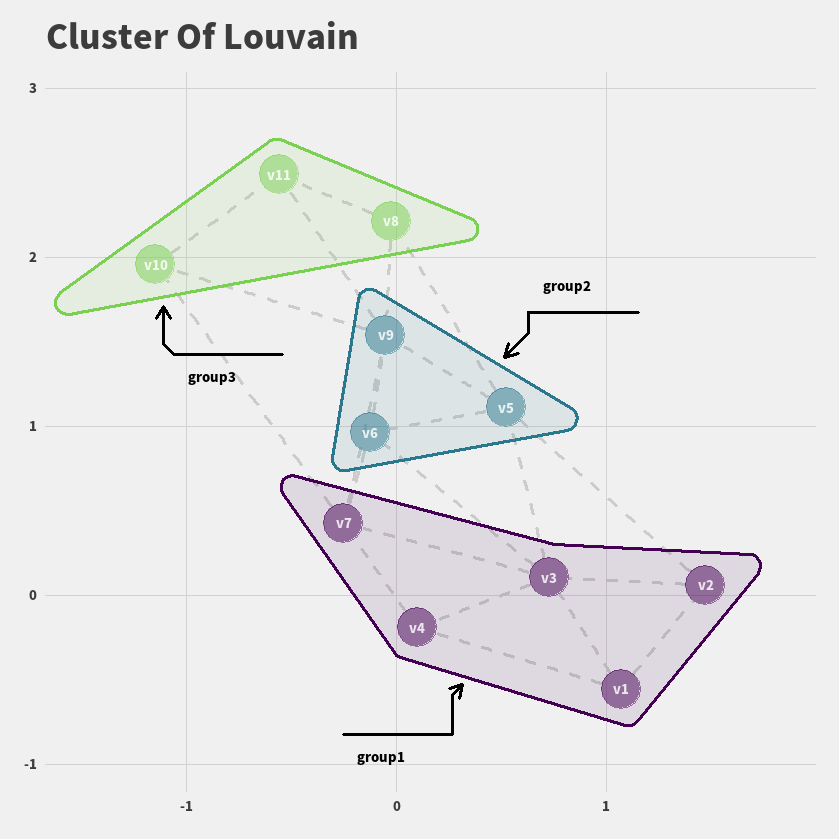

In [2]:
library(tidyverse)
library(tidygraph)
library(igraph)
library(ggraph)
library(ggforce)
library(ggthemes)
library(showtext)
library(navdata)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()

adjmatrix <- matrix(c(
  0, 2, 8, 1, 0, 0, 0, 0, 0, 0, 0,
  2, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0,
  8, 6, 0, 7, 5, 1, 2, 0, 0, 0, 0,
  1, 0, 7, 0, 0, 0, 9, 0, 0, 0, 0,
  0, 1, 5, 0, 0, 3, 0, 2, 9, 0, 0,
  0, 0, 1, 0, 3, 0, 4, 0, 6, 0, 0,
  0, 0, 2, 9, 0, 4, 0, 0, 3, 1, 0,
  0, 0, 0, 0, 2, 0, 0, 0, 7, 0, 9,
  0, 0, 0, 0, 9, 6, 3, 7, 0, 1, 2,
  0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4,
  0, 0, 0, 0, 0, 0, 0, 9, 2, 4, 0),
  byrow = TRUE,
  nrow = 11
)
colnames(adjmatrix) <- paste0("v", seq(1:11))
rownames(adjmatrix) <- paste0("v", seq(1:11))

graph <- graph_from_adjacency_matrix(
  adjmatrix = adjmatrix,
  mode = "undirected",
  weighted = TRUE,
)

result <- cluster_louvain(graph)

V(graph)$group <- case_when(
  V(graph)$name%in%result[[1]] ~ "group1",
  V(graph)$name%in%result[[2]] ~ "group2",
  V(graph)$name%in%result[[3]] ~ "group3",
)

plot <- create_layout(graph, layout = "fr")

ggraph(plot, layout = "fr")+
  geom_edge_fan(
    edge_width = 1,
    edge_color = "grey80",
    edge_linetype = "dashed",
    angle_calc = "along",
    label_dodge = unit(13, "pt"),
    label_push = unit(13, "pt"),
    start_cap = circle(12, "pt"),
    end_cap = circle(12, "pt"),
    family = "siyuan",
    label_size = 3
  )+
  geom_node_point(
    aes(color = group),
    size = 11,
    alpha = .5
  )+
  geom_node_text(
    aes(label = name),
    size = 3.5,
    color = "white",
    family = "siyuan"
  )+
  geom_mark_hull(
    aes(label = group, x = x, y = y, color = group, fill = group),
    expand = unit(7, "mm"),
    concavity = 2,
    radius = unit(2.5, "mm"),
    label.family = "siyuan",
    label.fontsize = 10,
    label.colour = "black",
    label.fill = NA,
    label.margin = margin(0.3, 0.3, 0.3, 0.3, "cm"),
    con.colour = "black",
    con.size = 1,
    con.type = "elbow",
    con.border = "one",
    con.cap = unit(2, "mm"),
    con.arrow = arrow(length = unit(3, "mm")),
    alpha = .1,
    linewidth = 1
    ) +
  labs(title = "Cluster Of Louvain")+
  theme_fivethirtyeight()+
  theme(
    text = element_text(family = "siyuan"),
    plot.title = element_text(size = 25)
  )+
  scale_x_continuous(expand = expansion(mult = c(0.2, 0.2)))+
  scale_y_continuous(expand = expansion(mult = c(0.2, 0.2)))+
  scale_fill_manual(values = viridis::viridis_pal(end = .8)(3))+
  scale_color_manual(values = viridis::viridis_pal(end = .8)(3))+
  guides(
    color = "none",
    fill = "none"
  )

# 插值

`pracma`包提供了插值方法，包括如下几种。

## 多项式插值

### 拉格朗日插值

```r
lagrangeInterp(x, y, xs)
```

参数xs即表示需要进行插值的点，要么为不赋值，要么输入一个数值向量。

In [1]:
library(pracma)
x0 <- 1:6
y0 <- c(16, 18, 21, 17, 15, 12)
x <- c(1.5, 2.6)

result <- lagrangeInterp(x0, y0, x)
print(result)

[1] 14.91797 20.88461


### 牛顿插值

```r
newtonInterp(x, y, xs)
```

## 分段插值

龙格振荡问题

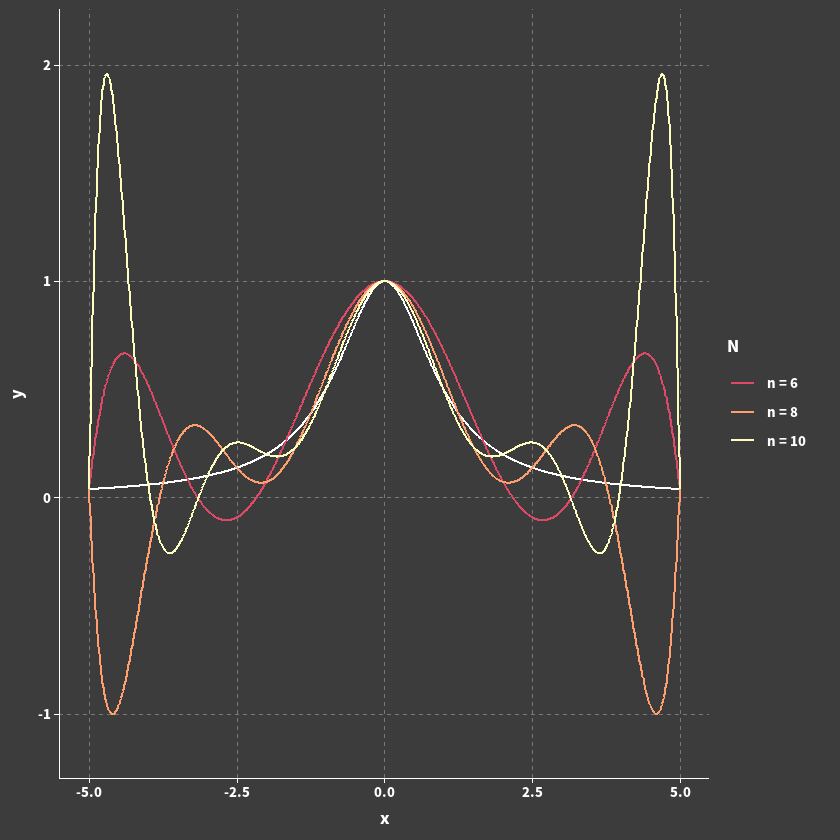

In [2]:
library(tidyverse)
library(pracma)
library(ggthemr)
library(showtext)
font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/思源黑体CN-HEAVY.OTF"
font_add("siyuan", font_path)
showtext_auto()
ggthemr(palette = "chalk", type = "outer")

x <- seq(-5, 5, 0.01)
y <- 1/(1+x^2)

x1 <- seq(-5, 5, length.out = 7)
y1 <- 1/(1+x1^2)

x2 <- seq(-5, 5, length.out = 9)
y2 <- 1/(1+x2^2)

x3 <- seq(-5, 5, length.out = 11)
y3 <- 1/(1+x3^2)
interp1 <- lagrangeInterp(x1, y1, x)
interp2 <- lagrangeInterp(x2, y2, x)
interp3 <- lagrangeInterp(x3, y3, x)

y4 <- seq(-5, 5, length.out = 11)
tibble(
  x = x,
  y = y
) %>%
  ggplot(aes(x, y)) +
    geom_line(color = "white", linewidth = .8) +
    geom_line(aes(x, y, color = "n = 6"), data = tibble(x = x, y = interp1), linewidth = .8)+
    geom_line(aes(x, y, color = "n = 8"), data = tibble(x = x, y = interp2), linewidth = .8)+
    geom_line(aes(x, y, color = "n = 10"), data = tibble(x = x, y = interp3), linewidth = .8)+
    scale_color_manual(
      name = "N",
      breaks = c("n = 6", "n = 8", "n = 10"),
      values = viridis::viridis_pal(option = "magma", begin = .6)(3)
      )+
    scale_x_continuous(expand = expansion(mult = c(0.05, 0.05))) +
    scale_y_continuous(expand = expansion(mult = c(0.1, 0.1))) +
    theme(
      text = element_text(family = "siyuan")
    )

### 分段线性插值

```r
interp1(x, y, xi = x, method = c("linear", "constant", "nearest", "spline", "cubic"))
```

其中：
- `x, y`：数值向量；x和y必须具有相同的长度。
- `xi`：数值向量；要计算插值的点；所有点必须位于min(x)和max(x)之间。

- `method`：“constant”，“linear”，“nearest”，“spline”或“cubic”其中一个；默认为“linear”（分段线性插值）。
    - `constant` 点之间的常数插值。
    - `nearest` 最近邻插值。
    - `spline` 三次样条插值（与`spine()`函数略有不同）。
    - `cubic` 三次埃尔米特插值。

### 三次样条插值

```r
spline(x, y = NULL, n = 3*length(x), method = "fmm", xmin = min(x), xmax = max(x), xout, ties = mean)
```

参数解释：
- `x，y`：给出要插值的点的坐标向量。对于method = "hyman"，y必须是递增或递减的。
- `method`：指定要使用的样条类型。可能的取值有"fmm"（Forsythe、Malcolm和Moler方法）、"natural"（自然样条）、"periodic"、"monoH.FC"和"hyman"。可以缩写。
- `n`：如果未指定xout参数，则插值将在n个等间距点上进行，跨越区间[xmin, xmax]。
- `xmin，xmax`：插值区间的左右端点。默认为min(x), max(x)。
- `xout`：一个可选的值集，用于指定插值的位置。
- `ties`：处理绑定的x值。字符串"ordered"或一个函数（或函数的名称），它接受一个向量参数并返回一个单一的数字或两个长度的列表（list）。

In [3]:
x0 <- c(1, 2, 3, 4, 5)
y0 <- c(10, 15, 8, 12, 20)
x <- seq(1, 5, length.out = 20)
y_interp <- spline(x0, y0, xout = x)$y
print(y_interp)

 [1] 10.000000 13.328474 15.246440 15.968509 15.709287 14.683627 13.135783
 [8] 11.367109  9.685523  8.398941  7.805560  7.980026  8.773436 10.027166
[15] 11.582592 13.287651 15.047383 16.796229 18.468873 20.000000


# 现代优化算法

## 遗传算法

### mcga()

mcga包中的mcga()函数可以作为使用遗传算法的一种选择：
```r
mcga(popsize, chsize, crossprob = 1.0, mutateprob = 0.01, 
	 elitism = 1, minval, maxval, maxiter = 10, evalFunc)
```

# 时间序列

在描述这些时间序列前，我们需要仔细定义一些词：
1. 趋势性（trend）

当数据**长期**增加或减少时，存在趋势。趋势不必是线性的。当一个趋势从增加趋势变为下降趋势时，我们会称其为“改变方向”。

2. 季节性（seasonal）

当时间序列受到季节性因素（如一年中的时间或一星期中的天数）的影响时，就会发生季节性模式。季节性总是具有固定和已知的时期。

3. 周期性（cyclic）

当数据表现出**不固定频率**的上升和下降时，就会发生周期。这些波动通常是由于经济状况造成的，并且通常与“商业周期（business cycle）”有关。这些波动的持续时间通常至少为2年。

周期性行为与季节性行为很容易混为一谈，但它们确实完全不同。如果**波动不是固定频率**，那么它们是周期性的；如果频率不变并与日历的某些方面相关联，则该模式是季节性的。一般来说，周期的平均长度比季节性模式的长度长，周期的大小往往比季节性模式的大小变化更大。

## 季节性图

季节图类似于时间图，不同之处在于数据是针对观测数据的各个“季节”绘制的。

如果数据具有多个季节性模式，则可探索性地选择绘制所需的季节性图。数据来自澳大利亚维多利亚州的半小时电力需求。

In [3]:
library(fpp3)
print(head(vic_elec))

# A tsibble: 6 x 5 [30m] <Australia/Melbourne>
  Time                Demand Temperature Date       Holiday
  <dttm>               <dbl>       <dbl> <date>     <lgl>  
1 2012-01-01 00:00:00  4383.        21.4 2012-01-01 TRUE   
2 2012-01-01 00:30:00  4263.        21.0 2012-01-01 TRUE   
3 2012-01-01 01:00:00  4049.        20.7 2012-01-01 TRUE   
4 2012-01-01 01:30:00  3878.        20.6 2012-01-01 TRUE   
5 2012-01-01 02:00:00  4036.        20.4 2012-01-01 TRUE   
6 2012-01-01 02:30:00  3866.        20.2 2012-01-01 TRUE   


`gg_season()`函数可以自动绘制季节性图，且同样的，接受ggplot2思想进行修改：
```r
gg_season(
  data,
  y = NULL,
  period = NULL,
  facet_period = NULL,
  max_col = Inf,
  max_col_discrete = 7,
  pal = (scales::hue_pal())(9),
  polar = FALSE,
  labels = c("none", "left", "right", "both"),
  labels_repel = FALSE,
  labels_left_nudge = 0,
  labels_right_nudge = 0,
  ...
  )
```
主要参数：
- `data`：一个整洁的时间序列对象（tsibble）
- `y`：要绘制的变量。
- `period`：指定绘制的季节周期，用于显示。
- `pal`：要使用的颜色调色板（必须为颜色向量）。
- `...`：传递给geom_line()的其他参数。

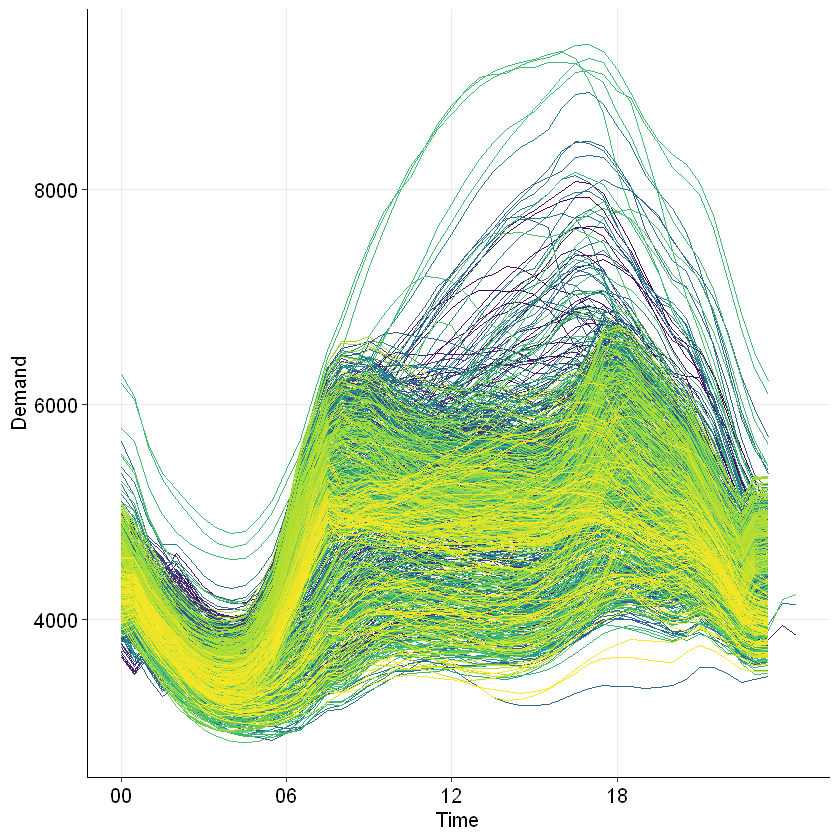

In [6]:
#! 以天为时期，查看每天的情况
library(tidyverse)
library(fpp3)
library(ggpubr)
vic_elec %>%
  gg_season(
    Demand,
    pal = (viridis::viridis_pal())(9),
    period = "day"
  ) +
  theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    legend.position = "none"
  )

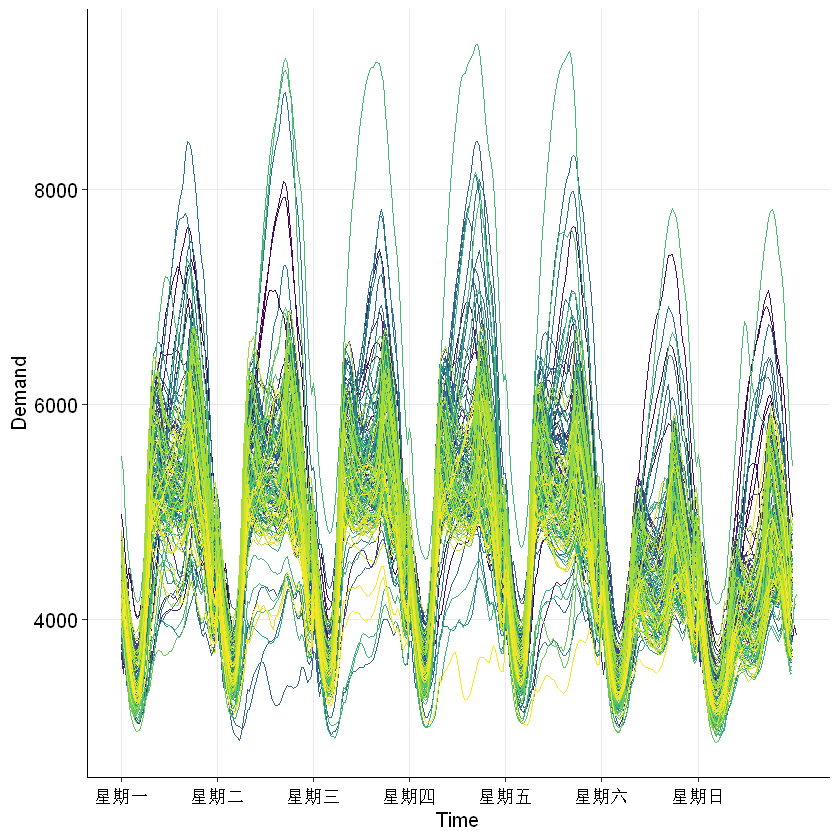

In [8]:
#! 以周为时期，查看每周的情况
vic_elec %>%
  gg_season(
    Demand,
    pal = (viridis::viridis_pal())(9),
    period = "week"
  ) +
  theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    legend.position = "none"
  )

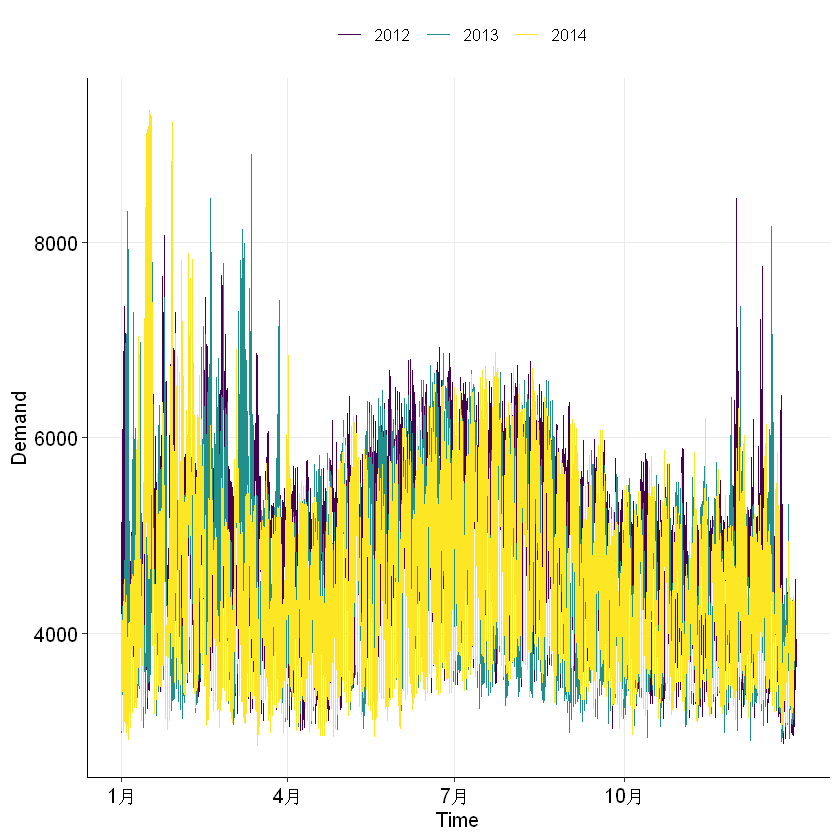

In [10]:
#! 以年为时期，查看每年的情况
vic_elec %>%
  gg_season(
    Demand,
    pal = (viridis::viridis_pal())(9),
    period = "year"
  ) +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

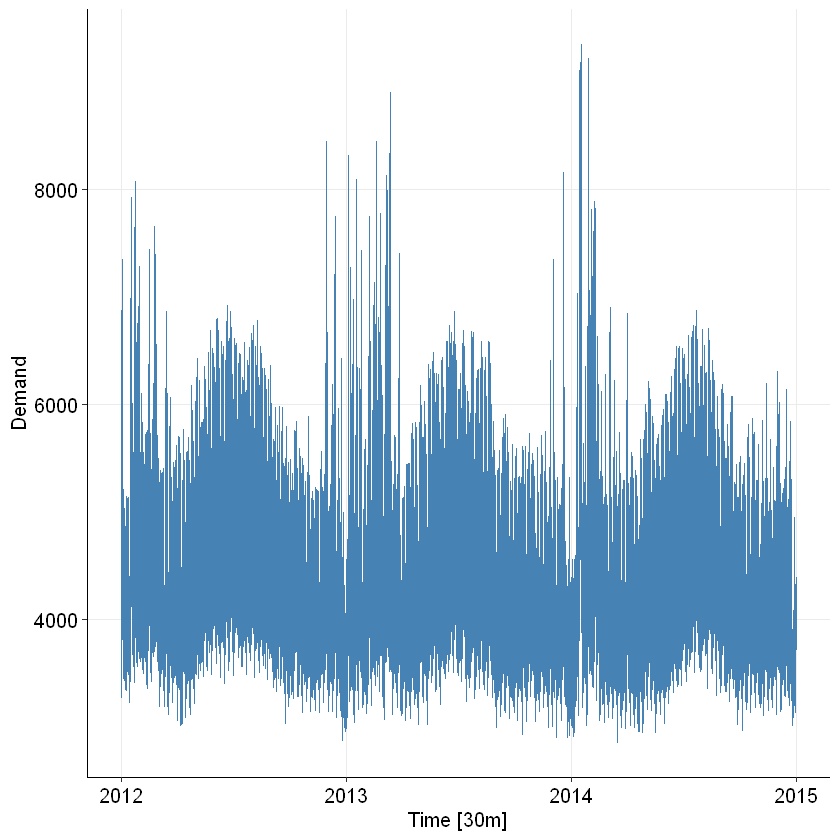

In [13]:
#! 最后看下时间图，对比季节图
autoplot(vic_elec, .vars = Demand) +
  geom_line(color = "steelblue") +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

## 季节性子序列图

当tsibble对象中存在分组索引（key）时，`gg_season()`仍能胜任：

这是澳大利亚季度假期的数据，对数据进行一定的处理：

In [15]:
holidays <- tourism %>%
  filter(Purpose == "Holiday") %>%
  group_by(State) %>%
  summarise(Trips = sum(Trips))
print(head(holidays))

# A tsibble: 6 x 3 [1Q]
# Key:       State [1]
  State Quarter Trips
  <chr>   <qtr> <dbl>
1 ACT   1998 Q1  196.
2 ACT   1998 Q2  127.
3 ACT   1998 Q3  111.
4 ACT   1998 Q4  170.
5 ACT   1999 Q1  108.
6 ACT   1999 Q2  125.


In [17]:
print(unique(holidays$State))

[1] "ACT"                "New South Wales"    "Northern Territory"
[4] "Queensland"         "South Australia"    "Tasmania"          
[7] "Victoria"           "Western Australia" 


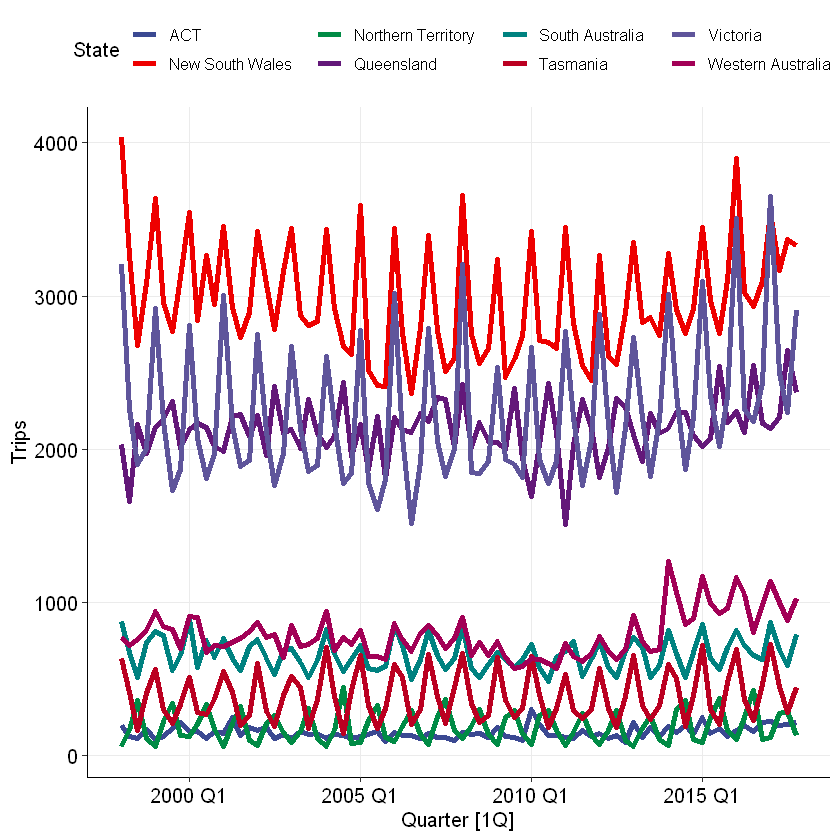

In [23]:
#! 可以很好地看到每个州数据的季节性
#! 但每个季节的细致波动很难发现
library(ggsci)
autoplot(holidays, Trips) +
  geom_line(linewidth = 1.5) +
  scale_color_aaas() +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

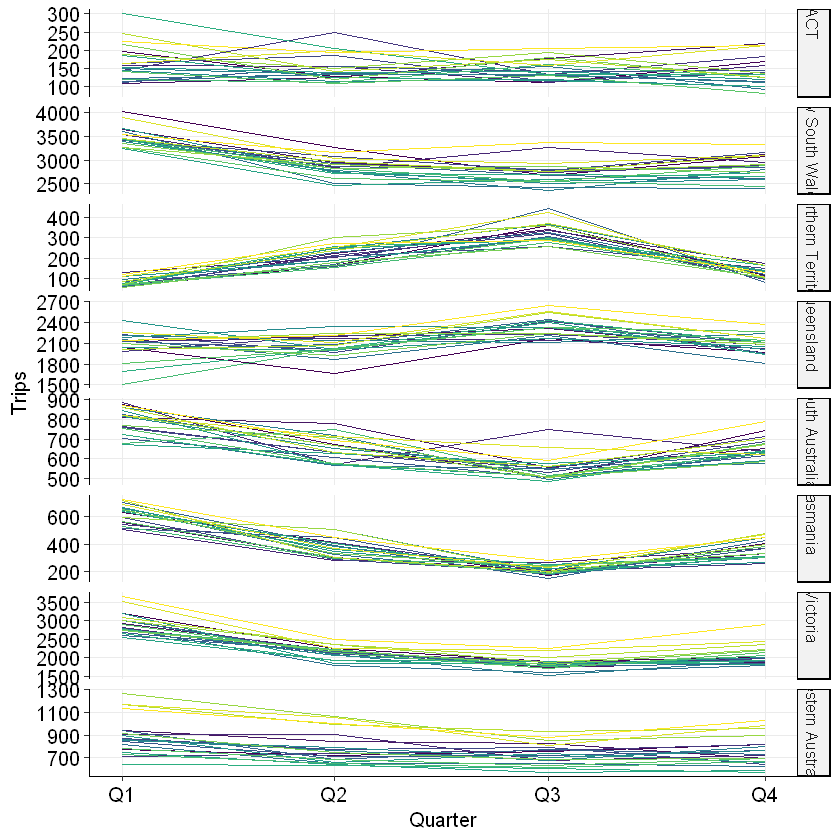

In [20]:
#! gg_season()自动按照key进行分面
#! 每年的数据会发生重合，也不是很容易进行阅读
gg_season(
  holidays,
  Trips,
  period = "year",
  pal = (viridis::viridis_pal())(9)
) +
  theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    legend.position = "none"
  )

季节性子系列图可以解决这种情况。此外该图按照季节性周期中的每个季节来分面化时间序列。这些分面形成了由该季节中的数据组成的较小时间序列图。例如，如果有几年的月度数据，生成的图会显示每个月的单独时间序列图，且第一个子系列图（比如）将仅包含所有年份1月的数据。

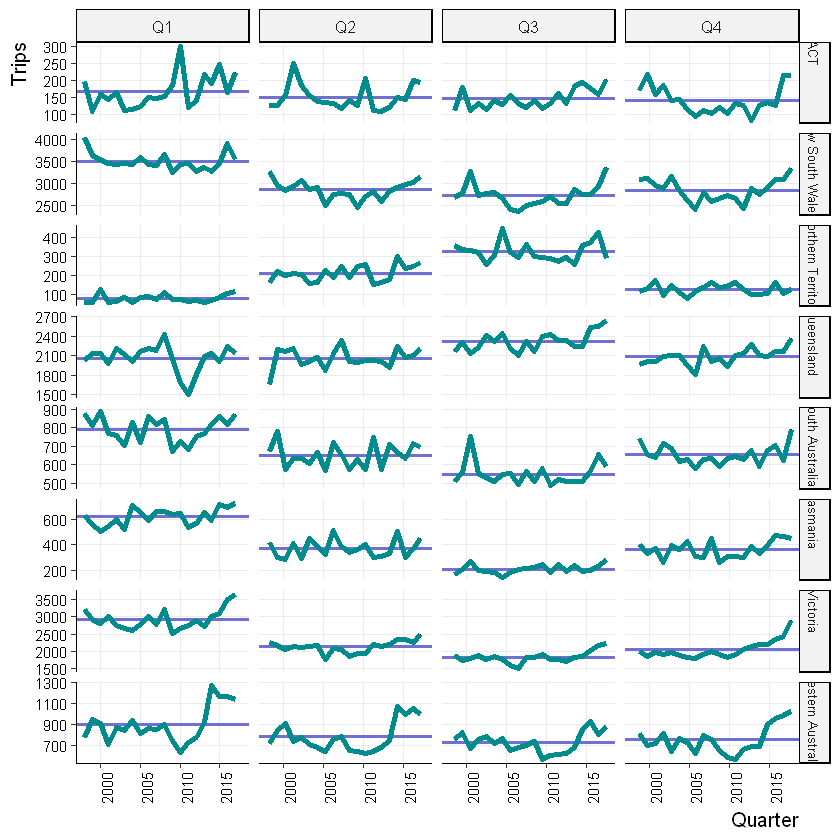

In [24]:
holidays %>%
  gg_subseries(
    Trips,
    period = "year"
  ) +
  geom_hline(
    aes(yintercept = !!sym(".yint")),
    color = "#7070d0",
    linewidth = 1
  ) +           #? 关于子系列水平线的颜色和粗细修改，可以直接修改封装函数的源代码
  geom_line(color = "#008c8c", linewidth = 1.5) +
  theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    strip.text.y.right = element_text(hjust = .5, size = 8),
    strip.clip = "on",
    axis.title = element_text(hjust = 1),
    axis.text.x = element_text(angle = 90, size = 9),
    axis.text.y = element_text(size = 9)
  )

## 滞后图

滞后图是检验季节性和自相关性的利器，`gg_lag()`函数可以很好地满足该需求：
```r
gg_lag(
  data,
  y = NULL,
  period = NULL,
  lags = 1:9,
  geom = c("path", "point"),
  arrow = FALSE,
  ...
)
```
其中：data是tsibble对象，y是绘制地变量，period指定时期，lags指定滞后期（滞后期会作为绘图的分面）


In [3]:
library(fpp3)
print(head(aus_production))

# A tsibble: 6 x 7 [1Q]
  Quarter  Beer Tobacco Bricks Cement Electricity   Gas
    <qtr> <dbl>   <dbl>  <dbl>  <dbl>       <dbl> <dbl>
1 1956 Q1   284    5225    189    465        3923     5
2 1956 Q2   213    5178    204    532        4436     6
3 1956 Q3   227    5297    208    561        4806     7
4 1956 Q4   308    5681    197    570        4418     6
5 1957 Q1   262    5577    187    529        4339     5
6 1957 Q2   228    5651    214    604        4811     7


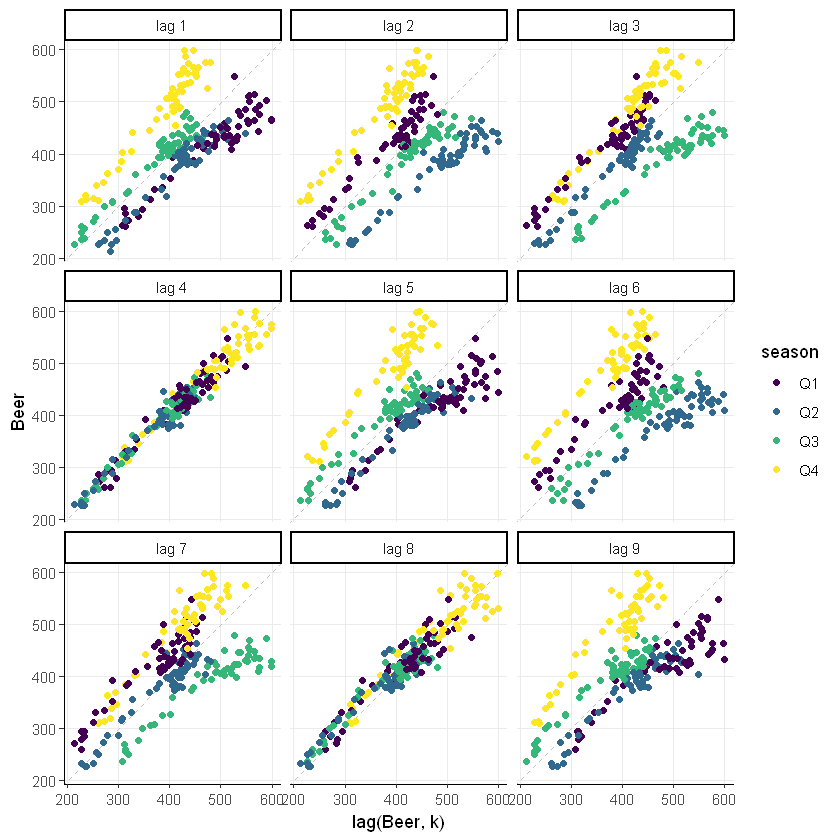

In [2]:
#! 其中滞后4期和8期的散点大致位于斜线上，这表明存在明显的季节性
aus_production %>%
  gg_lag(Beer, geom = "point", period = "year") +
  labs(x = "lag(Beer, k)") +
  theme_classic() +
  theme(
    panel.grid.major = element_line()
  )


## 自相关图

当数据是季节性的时，季节性滞后（季节性期间的倍数）的自相关将大于其他滞后，正如下图所示：

In [6]:
recent_production <- aus_production %>%
  filter(year(Quarter) >= 2000)
acf_result <- ACF(recent_production, Beer, lag_max = 9)
print(acf_result)
#! 结果为一个tsibble对象

# A tsibble: 9 x 2 [1Q]
       lag      acf
  <cf_lag>    <dbl>
1       1Q -0.0530 
2       2Q -0.758  
3       3Q -0.0262 
4       4Q  0.802  
5       5Q -0.0775 
6       6Q -0.657  
7       7Q  0.00119
8       8Q  0.707  
9       9Q -0.0888 


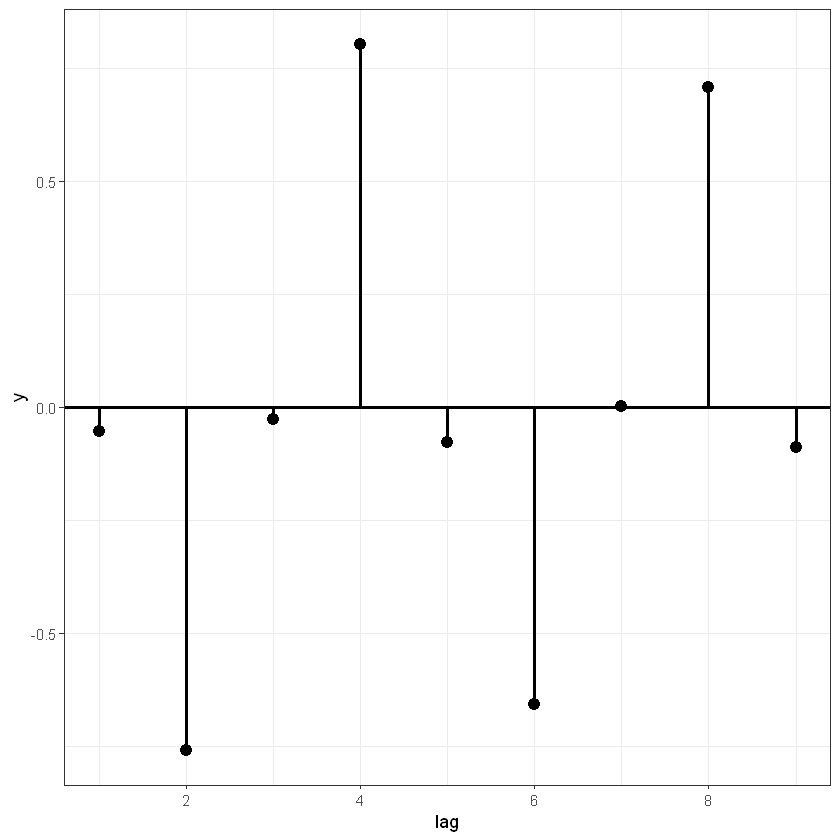

In [3]:
library(fpp3)
library(tidyverse)

recent_production <- aus_production %>%
  filter(year(Quarter) >= 2000)

recent_production %>%
  ACF(Beer, lag_max = 9) %>%
  ggplot() +
  geom_segment(
    aes(x = lag, y = 0, xend = lag, yend = acf),
    linewidth = 1
  ) +
  geom_hline(aes(yintercept = 0), linewidth = 1) +
  geom_point(aes(x = lag, y = acf), size = 3) +
  theme_bw()

但当数据具有趋势时，小滞后的自相关往往是大且正的（因为时间附近的观测值也在值上接近）。因此，趋势时间序列的 ACF 往往具有正值，该值随着滞后增加而缓慢减小。更加地，当数据既是趋势数据又是季节性数据时，情况又会有所不同。

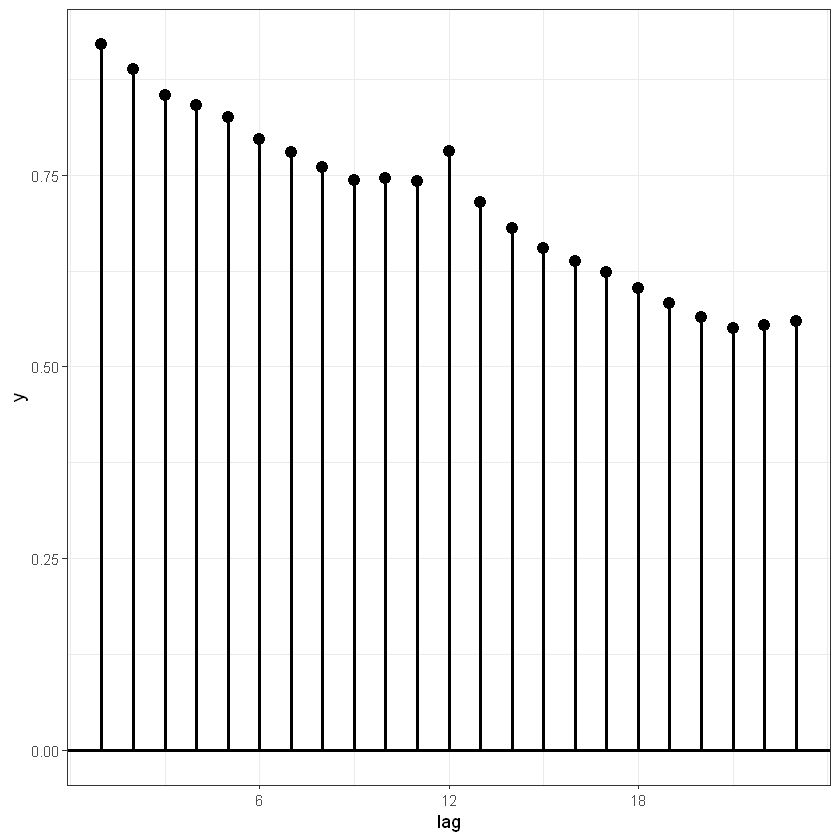

In [4]:
#! 一个时间序列既有趋势性又有季节性时：随着滞后增加，ACF的缓慢下降是由于趋势，而“扇形”形状是由于季节性
PBS %>%
  filter(ATC2 == "A10") %>%
  select(Month, Concession, Type, Cost) %>%
  summarise(TotalC = sum(Cost)) %>%
  mutate(Cost = TotalC / 1e6) -> a10

a10 %>%
  ACF(Cost) %>%
  ggplot() +
  geom_segment(
    aes(x = lag, y = 0, xend = lag, yend = acf),
    linewidth = 1
  ) +
  geom_hline(aes(yintercept = 0), linewidth = 1) +
  geom_point(aes(x = lag, y = acf), size = 3) +
  theme_bw()

当数据是白噪声时（无自相关的时间序列），我们预计每个自相关都接近于零。当然，它们不会完全等于零，因为存在一些随机变化。

## 时序的季节性分解

时序数据可以表现出多种模式，将时序拆分为多个组件（每个组件表示一个基础模式类别）通常很有帮助。我们知道三种类型的时间序列模式：趋势、季节性和周期。当我们将时间序列分解为组件时，通常会将趋势和周期组合成单个趋势周期组件（为简单起见，通常简称为趋势）。因此，最终将时间序列视为由三个组件组成：趋势周期组件（trend-cycle）、季节性组件（seasonal）和余数（remainder）组件（包含时间序列中的其他任何内容）。为了帮助提高对时间序列的理解，以及提高预测准确性，我们需要研究从时间序列中提取这些组件的最常见方法。但在分解时间序列时，我们有时需要先变换或调整序列以使分解（和以后的分析）尽可能是简单且有帮助的。

### 日历调整（calendar adjustment）

季节性数据中的一些变化可能是由于简单的日历效应造成的。在这种情况下，在进行任何进一步分析之前，需要删除这种变异。例如，如果正在研究零售商店的月度总销售额，则除了一年中的季节性变化外，由于每个月的交易日数不同，月份之间还会有所不同。通过计算每个月的平均每交易日的销售额，而不是当月的总销售额，很容易消除这种变化。

### 人口调整（population adjustment）

任何受人口变化影响的数据都可以进行调整，以提供人均数据。也就是说，考虑每人（或每千人或每百万人）的数据，而不是总数。例如，如果正在研究特定地区随时间推移的医院床位数量，则通过考虑每千人的床位数量来消除人口变化的影响，这样的结果将更容易解释------因为这样可以看到床位数量是否真正增加，或者增加是否完全是由于人口增加。床位总数可能会增加，但每千人的床位数量会减少（当人口增长快于医院床位数量时，就会发生这种情况）。对于受人口变化影响的大多数数据，最好使用人均数据而不是总数。

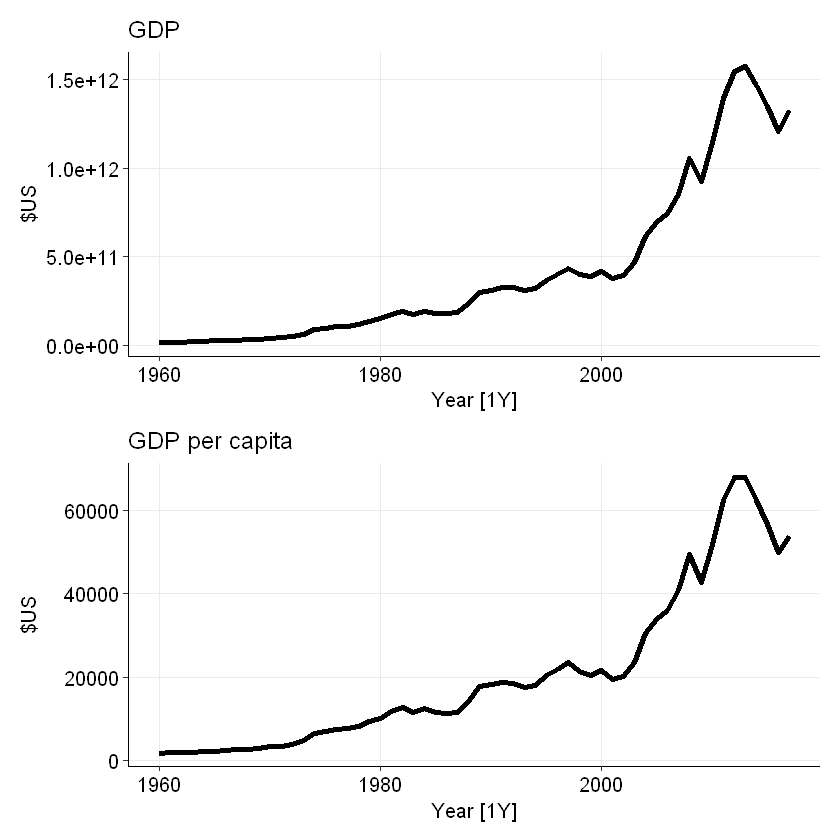

In [2]:
#! 对GDP进行转换------人均GDP。
library(tidyverse)
library(fpp3)
library(ggpubr)
library(patchwork)

p1 <- global_economy %>%
  filter(Country == "Australia") %>%
  autoplot(GDP) +
  geom_line(linewidth = 1.5) +
  labs(title = "GDP", y = "$US") +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

p2 <- global_economy %>%
  filter(Country == "Australia") %>%
  autoplot(GDP / Population) +
  geom_line(linewidth = 1.5) +
  labs(title = "GDP per capita", y = "$US") +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

print(p1 / p2)

### 通货膨胀调整（inflation adjustment）

受货币价值影响的数据最好在建模前进行调整。例如，由于通货膨胀，新房的平均成本在过去几十年中会增加。今年200万的房子与二十年前同价格的房子并不一样。因此，需要调整金融时间序列，以便所有值都以特定年份的货币价值表示。要进行这些调整，通常使用价格指数。如果以2000年为基期计算，zt表示当年价格指数，yt表示当年的原始房价，然后`xt = yt / zt ∗ z2000`，给出调整后的房价。

In [5]:
print(head(aus_retail))

# A tsibble: 6 x 5 [1M]
# Key:       State, Industry [1]
  State                        Industry            `Series ID`    Month Turnover
  <chr>                        <chr>               <chr>          <mth>    <dbl>
1 Australian Capital Territory Cafes, restaurants… A3349849A   1982 4月      4.4
2 Australian Capital Territory Cafes, restaurants… A3349849A   1982 5月      3.4
3 Australian Capital Territory Cafes, restaurants… A3349849A   1982 6月      3.6
4 Australian Capital Territory Cafes, restaurants… A3349849A   1982 7月      4  
5 Australian Capital Territory Cafes, restaurants… A3349849A   1982 8月      3.6
6 Australian Capital Territory Cafes, restaurants… A3349849A   1982 9月      4.2


In [6]:
print_retail <- aus_retail %>%
  filter(Industry == "Newspaper and book retailing") %>%
  group_by(Industry) %>%
  index_by(Year = year(Month)) %>%
  summarise(Turnover = sum(Turnover))
print(print_retail)

# A tsibble: 37 x 3 [1Y]
# Key:       Industry [1]
   Industry                      Year Turnover
   <chr>                        <dbl>    <dbl>
 1 Newspaper and book retailing  1982    1263 
 2 Newspaper and book retailing  1983    1800.
 3 Newspaper and book retailing  1984    2011.
 4 Newspaper and book retailing  1985    2109.
 5 Newspaper and book retailing  1986    2263.
 6 Newspaper and book retailing  1987    2534.
 7 Newspaper and book retailing  1988    2557.
 8 Newspaper and book retailing  1989    2859.
 9 Newspaper and book retailing  1990    2891.
10 Newspaper and book retailing  1991    2843.
# ℹ 27 more rows


In [7]:
print(global_economy)

# A tsibble: 15,150 x 9 [1Y]
# Key:       Country [263]
   Country     Code   Year         GDP Growth   CPI Imports Exports Population
   <fct>       <fct> <dbl>       <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>
 1 Afghanistan AFG    1960  537777811.     NA    NA    7.02    4.13    8996351
 2 Afghanistan AFG    1961  548888896.     NA    NA    8.10    4.45    9166764
 3 Afghanistan AFG    1962  546666678.     NA    NA    9.35    4.88    9345868
 4 Afghanistan AFG    1963  751111191.     NA    NA   16.9     9.17    9533954
 5 Afghanistan AFG    1964  800000044.     NA    NA   18.1     8.89    9731361
 6 Afghanistan AFG    1965 1006666638.     NA    NA   21.4    11.3     9938414
 7 Afghanistan AFG    1966 1399999967.     NA    NA   18.6     8.57   10152331
 8 Afghanistan AFG    1967 1673333418.     NA    NA   14.2     6.77   10372630
 9 Afghanistan AFG    1968 1373333367.     NA    NA   15.2     8.90   10604346
10 Afghanistan AFG    1969 1408888922.     NA    NA   15.0    10.1    10854

In [8]:
aus_economy <- global_economy %>%
  filter(Code == "AUS")
print(aus_economy)

# A tsibble: 58 x 9 [1Y]
# Key:       Country [1]
   Country   Code   Year          GDP Growth   CPI Imports Exports Population
   <fct>     <fct> <dbl>        <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>
 1 Australia AUS    1960 18573188487.  NA     7.96    14.1    13.0   10276477
 2 Australia AUS    1961 19648336880.   2.49  8.14    15.0    12.4   10483000
 3 Australia AUS    1962 19888005376.   1.30  8.12    12.6    13.9   10742000
 4 Australia AUS    1963 21501847911.   6.21  8.17    13.8    13.0   10950000
 5 Australia AUS    1964 23758539590.   6.98  8.40    13.8    14.9   11167000
 6 Australia AUS    1965 25931235301.   5.98  8.69    15.3    13.2   11388000
 7 Australia AUS    1966 27261731437.   2.38  8.98    15.1    12.9   11651000
 8 Australia AUS    1967 30389741292.   6.30  9.29    13.9    12.9   11799000
 9 Australia AUS    1968 32657632434.   5.10  9.52    14.5    12.3   12009000
10 Australia AUS    1969 36620002240.   7.04  9.83    13.3    12.0   12263000
# ℹ 48 more ro

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


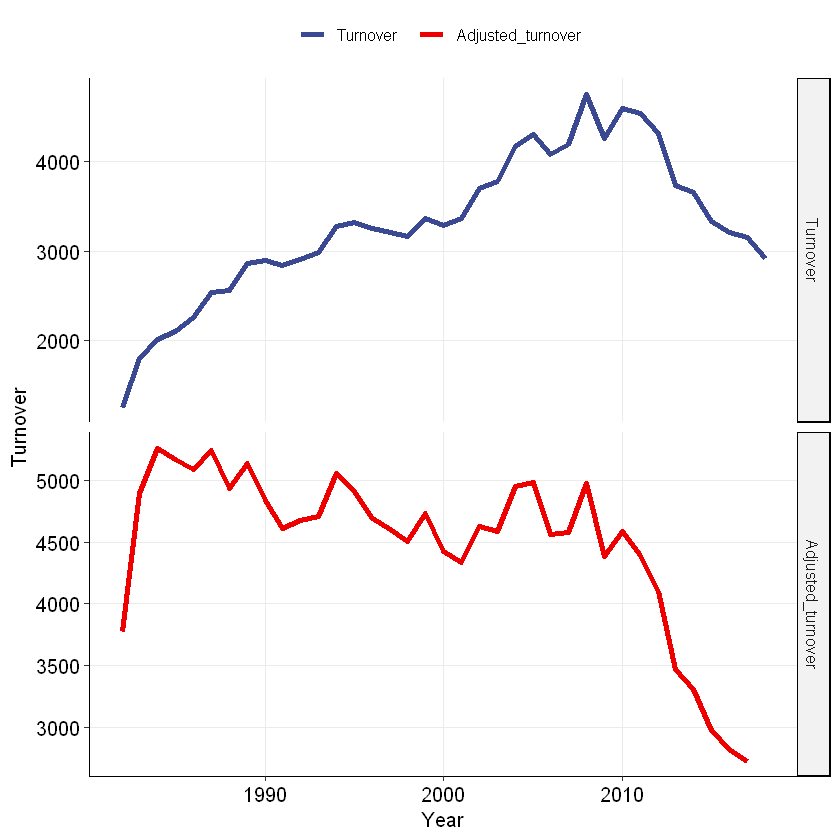

In [12]:
#! 基期是2009年
library(tidyverse)
print_retail %>%
  left_join(aus_economy, by = "Year") %>%
  mutate(Adjusted_turnover = Turnover / CPI * 100) %>%
  pivot_longer(
    c(Turnover, Adjusted_turnover),
    values_to = "Turnover",
    names_to = "kinds"
  ) %>%
  mutate(kinds = fct(kinds)) %>%
  ggplot(aes(x = Year, y = Turnover)) +
  geom_line(aes(color = kinds), linewidth = 1.5) +
  ggsci::scale_color_aaas() +
  facet_grid(kinds ~ ., scales = "free_y") +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    legend.title = element_blank()
  )


### 数学变换（Mathematical transformations）

#### 对数变换

如果时间序列数据，有着随序列水平而增加（或减少）的变化。那么对数变换可能很有用：对数的变化是原始刻度上的相对（<span style = 'color:red'><strong>或百分比</strong></span>）变化。当然，如果时间序列数据存在负数的情况，那么对数变换将不起作用。

### 幂次变换

有时候会使用原数据的二次方或者三次方等等，这些变换叫做幂次变换。这个变换也可能会被使用（尽管它们不那么具有解释性）。

### Box-Cox变换

Box-Cox变换族是一个有用的变换族，它们既包括对数变换，也包括幂变换，这取决于参数λ，自行查阅Box-Cox变换的公式定义。`guerrero`特征可以帮助抉择Box-Cox变换中参数λ的具体取值。结合使用`fabletools`包中的`features()`函数得到λ值，然后继续利用包中的`box_cox()`函数：

In [2]:
library(fpp3)
print(head(aus_production))

# A tsibble: 6 x 7 [1Q]
  Quarter  Beer Tobacco Bricks Cement Electricity   Gas
    <qtr> <dbl>   <dbl>  <dbl>  <dbl>       <dbl> <dbl>
1 1956 Q1   284    5225    189    465        3923     5
2 1956 Q2   213    5178    204    532        4436     6
3 1956 Q3   227    5297    208    561        4806     7
4 1956 Q4   308    5681    197    570        4418     6
5 1957 Q1   262    5577    187    529        4339     5
6 1957 Q2   228    5651    214    604        4811     7


In [6]:
print(
  aus_production %>%
    features(Gas, features = guerrero)
)

# A tibble: 1 × 1
  lambda_guerrero
            <dbl>
1           0.110


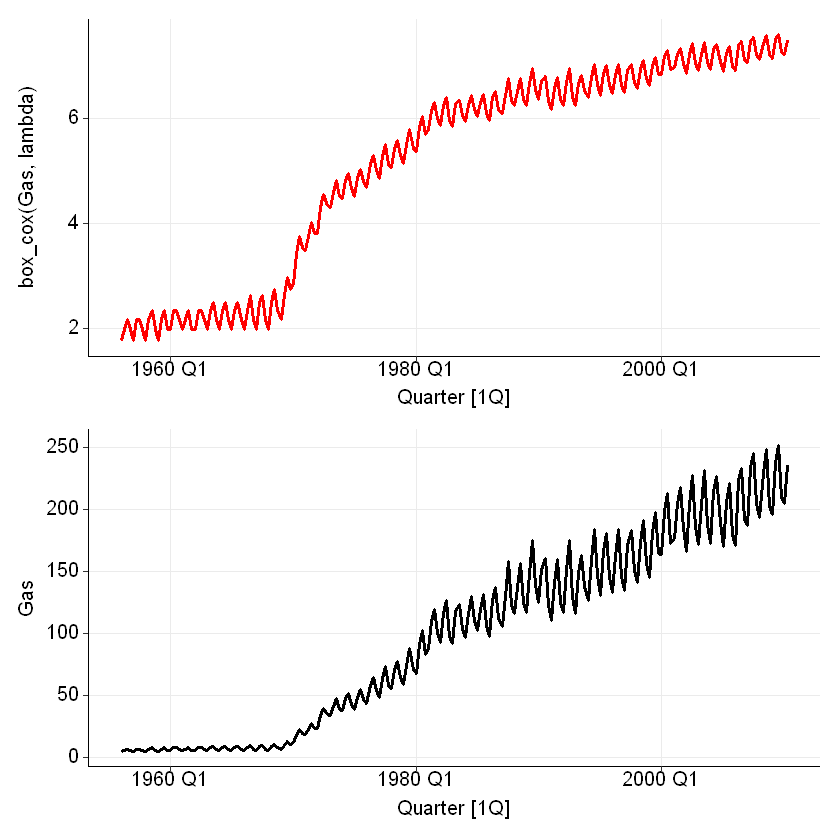

In [11]:
lambda <- aus_production %>%
  features(Gas, features = guerrero) %>%
  pull(lambda_guerrero)

library(ggpubr)
p1 <- aus_production %>%
  autoplot(box_cox(Gas, lambda)) +
  geom_line(linewidth = 1, color = "red") +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )
p2 <- aus_production %>%
  autoplot(Gas) +
  geom_line(linewidth = 1, color = "black") +
  theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

library(patchwork)
p1 / p2

时间序列分解有两个模型：加法模型（yt = St + Tt + Rt）和乘法模型（yt = St * Tt * Rt）。如果季节性波动的幅度或趋势周期周围的变化，不随时间序列的水平而变化（或者变化不是那么明显），则加法分解是最合适的。当季节性模式的变化或趋势周期的变化似乎与时间序列的水平成正比时，乘法分解更合适。乘法分解在经济时间序列中很常见。使用乘法分解可以首先对数变换数据，直到序列中的变异看起来随着时间的推移而稳定，然后使用加法分解。

![相加模型](图片素材\相加模型.png)

![相乘模型](图片素材\相乘模型.png)

时间序列分解的经典方法起源于1920年代，直到1950年代才被广泛使用。它仍然是许多时间序列分解方法的基础，因此了解它的工作原理很重要。经典时间序列分解的第一步是使用移动平均方法来估计趋势周期，因此从讨论移动平均开始。

### 移动平均法

![](图片素材\移动平均公式.png)

当m = 2k + 1时。对时间处t的趋势周期估计，可以通过对时间t在k段时间内序列的值求平均获得。由于在时间上接近的观测，它们的值也可能接近。因此，平均值消除了数据中的一些随机性，留下了一个平滑的趋势周期分量。称之为m-MA。

以下数据是1960年至2017年澳大利亚商品和服务出口占GDP的百分比：

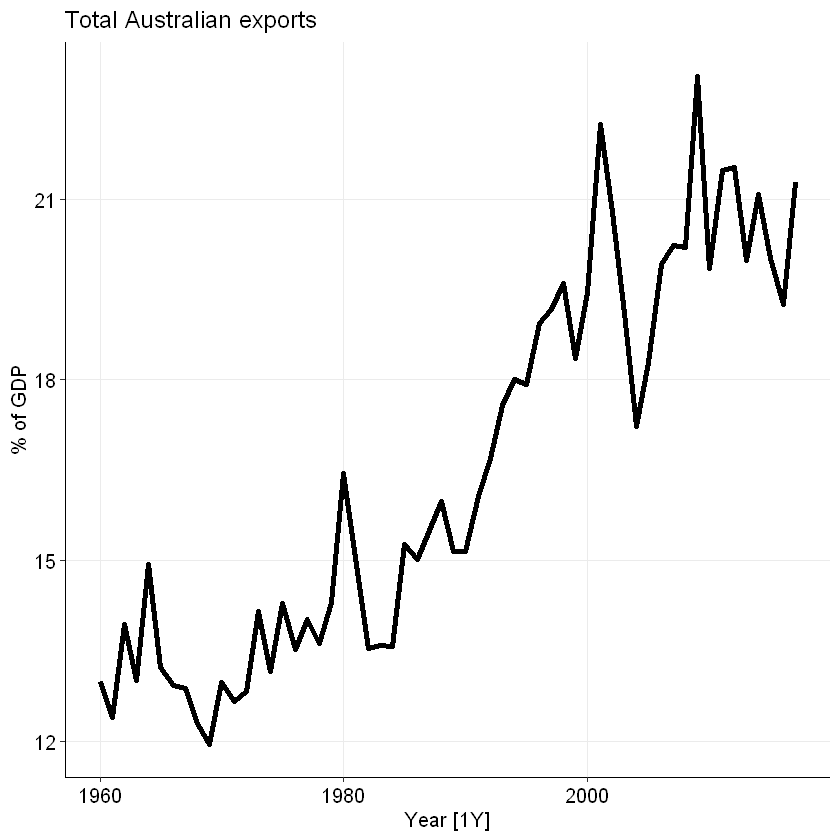

In [8]:
library(fpp3)
library(tidyverse)
global_economy %>%
  filter(Country == "Australia") %>%
  autoplot(Exports, linewidth = 1.5) +
  labs(y = "% of GDP", title = "Total Australian exports") +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

然后利用滑窗计算平均值即可，当m = 5时，滑窗大小为5，此时前两个和后两个时间序列由于平均而不复存在：

In [9]:
library(slider)
aus_exports <- global_economy %>%
  filter(Country == "Australia") %>%
  mutate(
    `5-MA` = slide_dbl(
      Exports,
      \(x) mean(x),
      .before = 2,
      .after = 2,
      .complete = TRUE
    )
  )
print(head(aus_exports))

# A tsibble: 6 x 10 [1Y]
# Key:       Country [1]
  Country   Code   Year       GDP Growth   CPI Imports Exports Population `5-MA`
  <fct>     <fct> <dbl>     <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>  <dbl>
1 Australia AUS    1960   1.86e10  NA     7.96    14.1    13.0   10276477   NA  
2 Australia AUS    1961   1.96e10   2.49  8.14    15.0    12.4   10483000   NA  
3 Australia AUS    1962   1.99e10   1.30  8.12    12.6    13.9   10742000   13.5
4 Australia AUS    1963   2.15e10   6.21  8.17    13.8    13.0   10950000   13.5
5 Australia AUS    1964   2.38e10   6.98  8.40    13.8    14.9   11167000   13.6
6 Australia AUS    1965   2.59e10   5.98  8.69    15.3    13.2   11388000   13.4


Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."


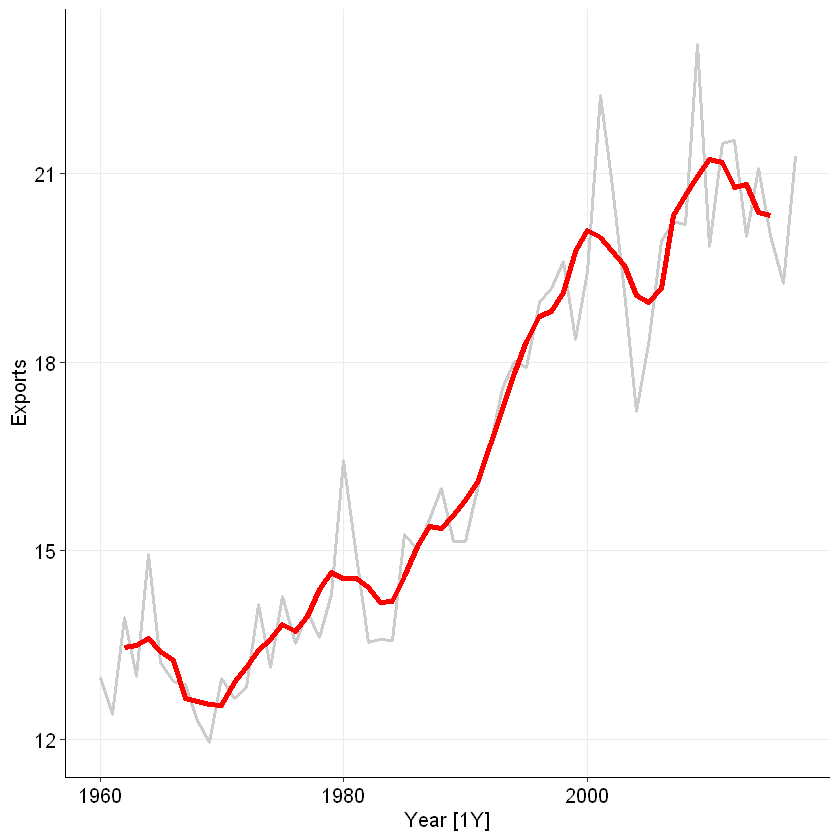

In [10]:
aus_exports %>%
  autoplot(Exports, color = "grey80", linewidth = 1) +
  geom_line(aes(y = `5-MA`), linewidth = 1.5, color = "red") +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

m越大移动平均线越平滑，但是这种简单平均的窗口m一般只取奇数（保持对称性）。

### 移动平均的移动平均（Moving averages of moving averages）

当m不为奇数时，这时很难保持对称性。需要对偶数m的移动平均再做一次移动平均，以如下为例，当第一次是m为偶数4的移动平均时，我们再做一次m为2的移动平均，这样便可以保证最后数据的对称性。这种当2-MA运用在偶数阶的移动平均（例如 4）后的处理方法，被称为“4 阶的中心移动平均”

In [11]:
beer <- aus_production %>%
  filter(year(Quarter) >= 1992) %>%
  select(Quarter, Beer)
beer_ma <- beer |>
  mutate(
    `4-MA` = slide_dbl(
      Beer,
      \(x) mean(x),
      .before = 1,
      .after = 2,
      .complete = TRUE
    ),
    `2x4-MA` = slide_dbl(
      `4-MA`,
      \(x) mean(x),
      .before = 1,
      .after = 0,
      .complete = TRUE
    )
  )
print(head(beer_ma))
print(tail(beer_ma))

# A tsibble: 6 x 4 [1Q]
  Quarter  Beer `4-MA` `2x4-MA`
    <qtr> <dbl>  <dbl>    <dbl>
1 1992 Q1   443    NA       NA 
2 1992 Q2   410   451.      NA 
3 1992 Q3   420   449.     450 
4 1992 Q4   532   452.     450.
5 1993 Q1   433   449      450.
6 1993 Q2   421   444      446.
# A tsibble: 6 x 4 [1Q]
  Quarter  Beer `4-MA` `2x4-MA`
    <qtr> <dbl>  <dbl>    <dbl>
1 2009 Q1   415   430      429.
2 2009 Q2   398   430      430 
3 2009 Q3   419   430.     430.
4 2009 Q4   488   424.     427.
5 2010 Q1   414    NA       NA 
6 2010 Q2   374    NA       NA 


![](图片素材\4阶中心移动平均.png)

由上述式子可以发现， 在应用于季度数据时，由于第一个和最后一个项应用于连续两年的同一季度，那么将这两项加和后，其实每个季度都得到了相等的权重。这样做的结果是：季节变动将被平均消除，而得到的值将具有很小或没有季节变动。使用2x8-MA或2x12-MA对季度数据进行类似处理也会得到类似的效果。
一般来说，2×m-MA等同于一个共有m+1项的加权移动平均数，其中所有的观测值的权重都是1/m（除了第一个和最后一个项，因为它们的权重是1/(2m)。总的来说，如果季节性周期为偶数且为m，我们使2×m-MA来估算趋势周期组件。如果季节性周期为奇数且为m，我们使用m-MA来估算趋势周期。例如，2×12-MA可用于估算具有年季节性的月度数据的趋势周期（或者3年季节性的月度数据），而7-MA可用于估算具有周季节性的日度数据的趋势周期。

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."


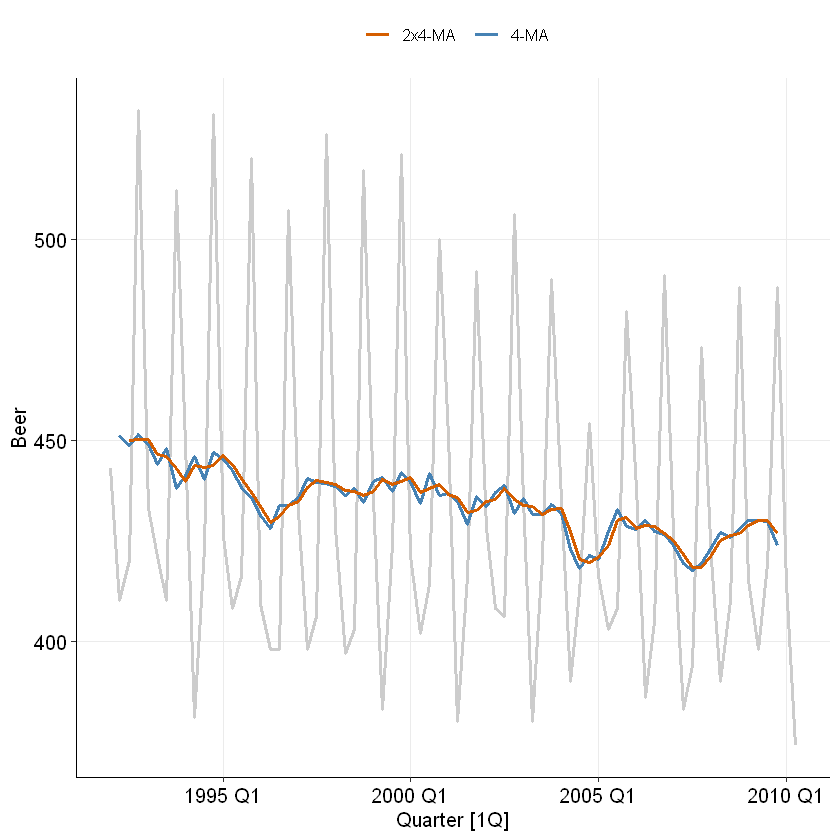

In [13]:
beer_ma %>%
  autoplot(Beer, linewidth = 1, color = "grey80") +
  geom_line(aes(y = `4-MA`, color = "4-MA"), linewidth = 1) +
  geom_line(aes(y = `2x4-MA`, color = "2x4-MA"), linewidth = 1) +
  scale_color_manual(values = c("#D55E00", "steelblue")) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    legend.title = element_blank()
  )

### 经典分解法（classical decomposition）

经典分解方法起源于1920年代。这是一个相对简单的过程，并是大多数其他时间序列分解方法的基础。在经典分解中假设季节性成分每年都是恒定的。

#### 加法模型的经典分解

1. 如果m是一个偶数，那么使用2xm-MA计算趋势周期组件。如果m是一个奇数，使用m-MA计算趋势周期分量。
2. 计算去趋势时间序列（减去趋势组件）。
3. 估计每个季节的季节性组件：这需要平均该季节的去趋势值。例如，对于月度数据，3月的季节性组件是所有去趋势数据中3月值的平均值。然后调整所有月份的季节性组件值，以确保它们加起来为零。
4. 最后通过去趋势时间序列数据再减去季节性组件，便得到了余数组件（随机项）

In [17]:
library(fpp3)
library(tidyverse)
us_retail_employment <- us_employment  %>%
  filter(year(Month) >= 1990, Title == "Retail Trade")
print(head(us_retail_employment))

# A tsibble: 6 x 4 [1M]
# Key:       Series_ID [1]
     Month Series_ID     Title        Employed
     <mth> <chr>         <chr>           <dbl>
1 1990 1月 CEU4200000001 Retail Trade   13256.
2 1990 2月 CEU4200000001 Retail Trade   12966.
3 1990 3月 CEU4200000001 Retail Trade   12938.
4 1990 4月 CEU4200000001 Retail Trade   13012.
5 1990 5月 CEU4200000001 Retail Trade   13108.
6 1990 6月 CEU4200000001 Retail Trade   13183.


Warning message:
"Removed 6 rows containing missing values (`geom_line()`)."


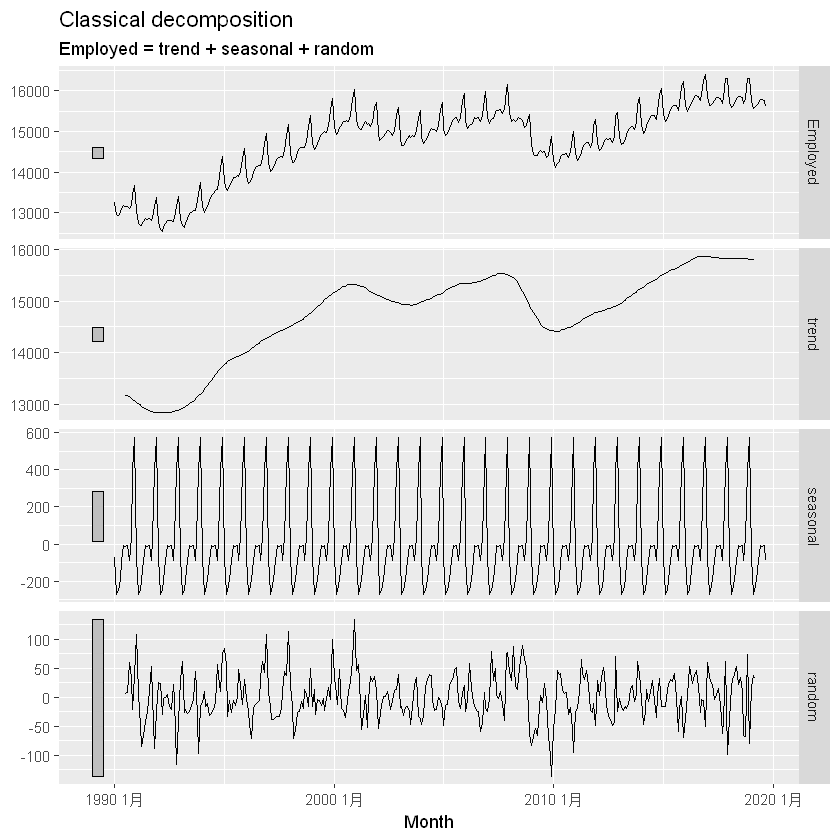

In [20]:
us_retail_employment %>%
  model(fit = classical_decomposition(Employed, type = "additive")) %>%
  components() %>%
  autoplot()

#### 乘法模型的经典分解

1. 如果m是一个偶数，那么使用2xm-MA计算趋势周期组件。如果m是一个奇数，使用m-MA计算趋势周期分量。
2. 计算去趋势时间序列（除去趋势组件）。
3. 估计每个季节的季节性组件：这需要平均该季节的去趋势值。例如，对于月度数据，3月的季节性组件是所有去趋势数据中3月值的平均值。然后调整所有月份的季节性组件值，以确保它们加起来为m。
4. 最后通过去趋势时间序列数据再除去季节性组件，便得到了余数组件（随机项）

虽然经典分解仍然被广泛使用，但不推荐，因为现在有几种更好的方法。经典分解的一些问题总结如下：
1. 趋势周期的估计值不适用于前几个和最后几个观测值。我们知道季节平均时会产生缺失值
2. 经典分解方法假设季节性成分每年重复。对于许多系列，这是一个合理的假设，但对于一些较长的系列，则不是。例如，随着空调的普及，电力需求模式随着时间的推移而改变。
3. 有时，少数时间段内的时间序列值可能特别不寻常。经典方法对这些类型的异常值的处理并不稳健。
4. 会过度平滑趋势周期组件的估计数据。

### x-11方法

一些官方的统计机构制定了自己的时间序列分解程序，用于季节性调整。他们中的大多数使用X-11方法的变体，或SEATS方法，或两者的组合。<span style = 'color:red'><strong>这些方法专门设计用于处理季度和月度数据，而不会处理其他类型的季节性，例如每日数据、每小时数据或每周数据</strong></span>。我们将使用这组称为“X-13ARIMA-SEATS”的方法的最新实现。

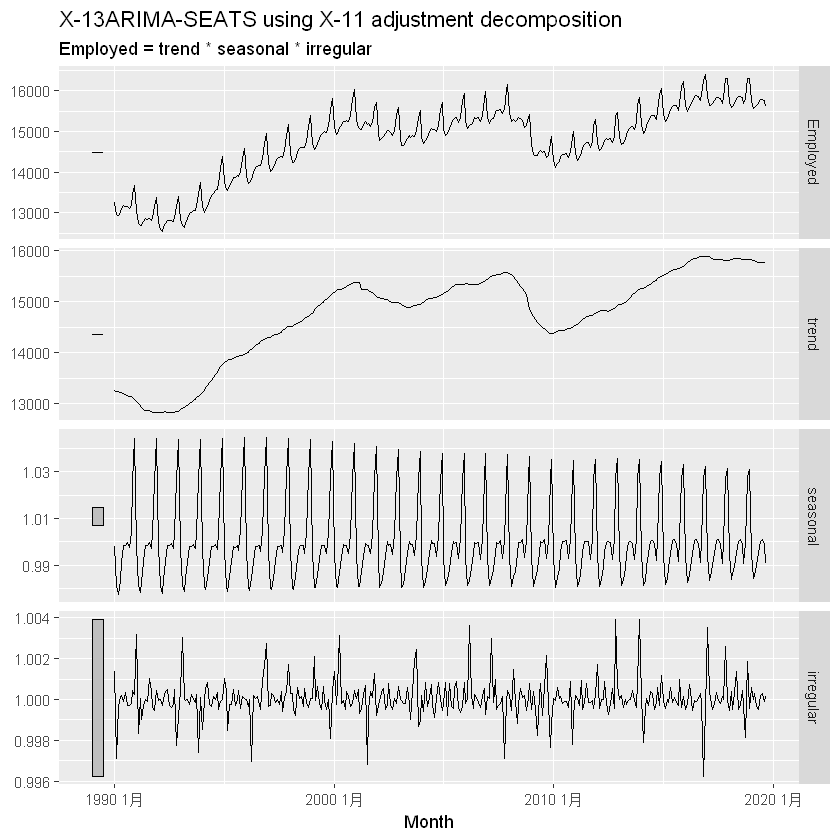

In [22]:
#! seasonal包不在fpp3生态里，需要下载并引用
library(seasonal)
x11_dcmp <- us_retail_employment %>%
  model(
    x11 = X_13ARIMA_SEATS(Employed ~ x11())
  )
components(x11_dcmp) %>%
  autoplot()

X-11方法起源于美国人口普查局，并由加拿大统计局进一步发展。它基于经典分解，但包括许多额外的步骤和功能，以克服一些经典分解的缺点。特别是，该方法避免了趋势周期组件估计的值缺失，并且允许季节性成分随时间缓慢变化（而不是固定不变的）。X-11还处理交易日变化、假日效应和已知预测因子的影响。它默认使用乘法模型（经典分解方法和STL都默认加法模型）。X-11对时间序列中的异常值和水平偏移具有高度稳健性。参考此书查看更多细节：<span style = 'color:red'><strong>Dagum, E. B., & Bianconcini, S. (2016). Seasonal adjustment methods and real time trend-cycle estimation. Springer</span></strong>

Warning message:
"Removed 12 rows containing missing values (`geom_line()`)."


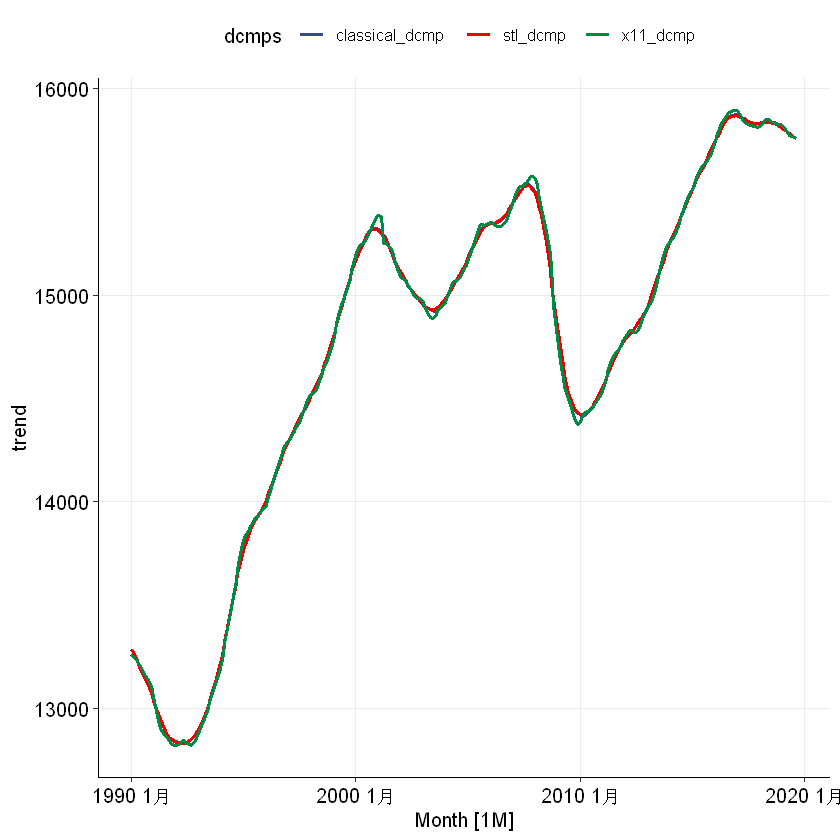

In [2]:
#! 比较几种分解方法的不同
library(tidyverse)
library(fpp3)

us_retail_employment <- us_employment  %>%
  filter(year(Month) >= 1990, Title == "Retail Trade")

x11_dcmp <- us_retail_employment %>%
  model(
    x11 = X_13ARIMA_SEATS(Employed ~ x11())
  )

classical_dcmp <- us_retail_employment %>%
  model(
    cla = classical_decomposition(Employed, type = "additive")
  )

stl_dcmp <- us_retail_employment %>%
  model(
    stl = STL(Employed)
  )

dcmp_list <- list(
  x11_dcmp = x11_dcmp,
  classical_dcmp = classical_dcmp,
  stl_dcmp = stl_dcmp
)

func <- function(x){
  fabletools::components(x) %>%
    dplyr::as_tibble() %>%
    dplyr::pull(5)
}

months <- components(x11_dcmp) %>% as_tibble() %>% pull(Month)

trend <- map(dcmp_list, func)

as_tibble(trend) %>%
  mutate(Month = months) %>%
  as_tsibble(
    index = Month
  ) %>%
  pivot_longer(
    where(is.numeric),
    names_to = "dcmps",
    values_to = "trend"
  ) %>%
  autoplot(trend, linewidth = 1) +
  ggsci::scale_color_aaas() +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

除了X-11法以外，`X_13ARIMA_SEATS()`函数还支持其他分解算法，如SEATS算法等等，通过官方文档学习了解更多。

### STL分解

STL相比于经典分解、SEATS和X-11方法有几个优势：
1. 与SEATS和X-11不同，STL能处理任何类型的季节性，而不仅仅是月度和季度数据。
2. 季节性组件也随时间变化，不过这种变化速率可以由用户控制。
3. 趋势周期组件数据的平滑度也可以由用户控制。
4. 它可以对异常值具有稳定性（在X-11分解过程中，通常会包括一个异常检测和修正的阶段，它可以识别和调整时间序列中的异常值以得到更准确的季节性和趋势成分的估计。通过这种方式，X-11可以降低异常值对分解结果的影响，从而在一定程度上显示出对异常值的稳定性。然而，STL和X-11在处理异常值方面可能有所不同。STL通过其稳健性选项提供了一种明确的方式来处理异常值，而X-11则可能通过其内置的异常检测和修正过程来处理异常），以便偶尔的异常观测不会影响趋势周期和季节性组件的估计。然而，这可能会影响残差（remainder）组件。

另一方面，STL也存在一些缺点。特别是，它不能自动处理交易日或日历的变化，而且它仅提供了加法分解的功能（乘法模型先对数转换，然后在指数转换回退）。介于加法和乘法模型之间的分解可以先使用数据的`Box-Cox`变换，其中要决定参数λ的值（0 < λ < 1，当λ = 0给出乘法分解，而λ = 1给出加法分解）。

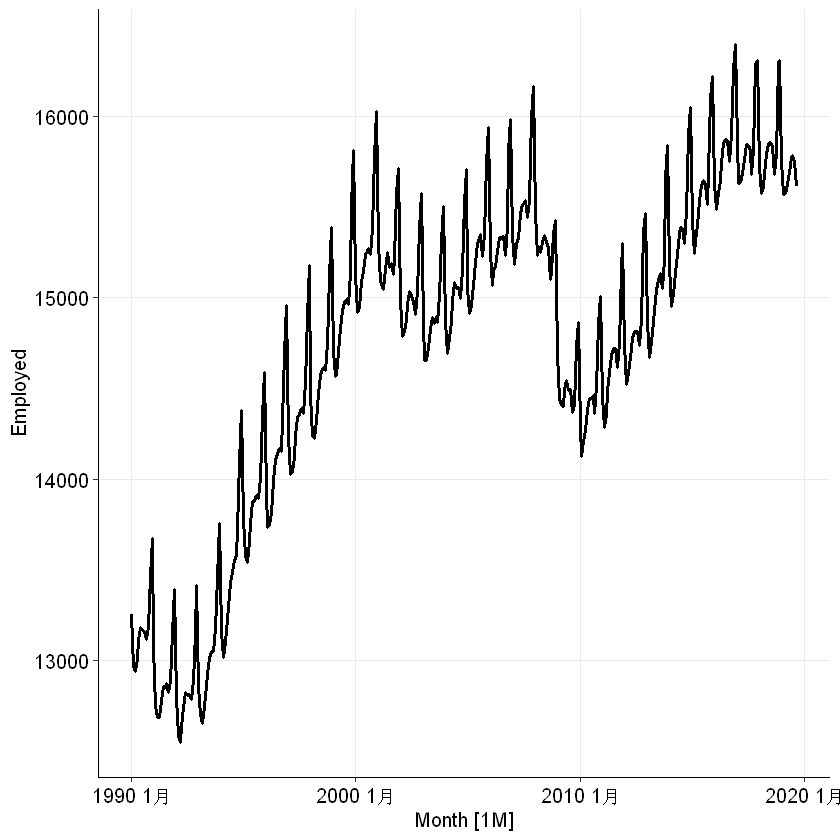

In [3]:
#step 数据是自1990年以来，美国零售业每月雇用的数千人总数
us_retail_employment <- us_employment  %>%
  filter(year(Month) >= 1990, Title == "Retail Trade") %>%
  select(- Series_ID)
autoplot(us_retail_employment, Employed) +
  geom_line(linewidth = 1) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

In [4]:
print(head(us_retail_employment))

# A tsibble: 6 x 3 [1M]
     Month Title        Employed
     <mth> <chr>           <dbl>
1 1990 1月 Retail Trade   13256.
2 1990 2月 Retail Trade   12966.
3 1990 3月 Retail Trade   12938.
4 1990 4月 Retail Trade   13012.
5 1990 5月 Retail Trade   13108.
6 1990 6月 Retail Trade   13183.


In [5]:
#step 采用fpp3生态下的stl分解方法（这与stats包中的是不一样的）
#! 加法模型，直接分解
dcmp <- us_retail_employment %>%
  model(stl = STL(Employed))
print(dcmp)

# A mable: 1 x 1
      stl
  <model>
1   <STL>


使用STL分解时要选择两个主要参数：趋势周期窗口和季节性窗口，以便控制趋势周期和季节组件的变化速度。它们被要求设置为奇数，且较小的值会产生更快速的变化。trend(window = ?) 中的 window参数就指定了趋势组件的平滑窗口的大小。它决定了在局部加权回归中使用的观测值的数量。如果想要一个更为平滑的趋势线，可以增加 window 参数的值。相反，如果想要一个对数据变化更为敏感的趋势线，可以减小 window 参数的值（很好理解，此时变化快速，更加敏感）。season(window = ?) 中的 window 参数是指定季节性组件的平滑窗口的大小。当 window 设为 "periodic" 时，季节性模式被假定为固定的，并不随时间而变化。如果期望季节性成分是变化的，可以设定 window 为一个特定的数值，而不是 "periodic"。例如，season(window = 35) 可以使季节性成分在局部回归中考虑35个观测值，以捕捉可能存在的季节性变化。

默认情况下，该函数会自动选择合适的参数。这通常会在过度拟合季节性，和使得季节性随时间缓慢变化之间，取得良好的平衡。但是，与任何自动化过程一样，需要针对某些特定的时间序列对默认设置进行调整。在这种情况下，默认趋势窗口设置会产生过于僵化的趋势周期组件。

In [6]:
#step 得到的mable对象要进行成分的提取
print(
  head(components(dcmp))
)

# A dable: 6 x 7 [1M]
# Key:     .model [1]
# :        Employed = trend + season_year + remainder
  .model    Month Employed  trend season_year remainder season_adjust
  <chr>     <mth>    <dbl>  <dbl>       <dbl>     <dbl>         <dbl>
1 stl    1990 1月   13256. 13288.       -33.0     0.836        13289.
2 stl    1990 2月   12966. 13269.      -258.    -44.6          13224.
3 stl    1990 3月   12938. 13250.      -290.    -22.1          13228.
4 stl    1990 4月   13012. 13231.      -220.      1.05         13232.
5 stl    1990 5月   13108. 13211.      -114.     11.3          13223.
6 stl    1990 6月   13183. 13192.       -24.3    15.5          13207.


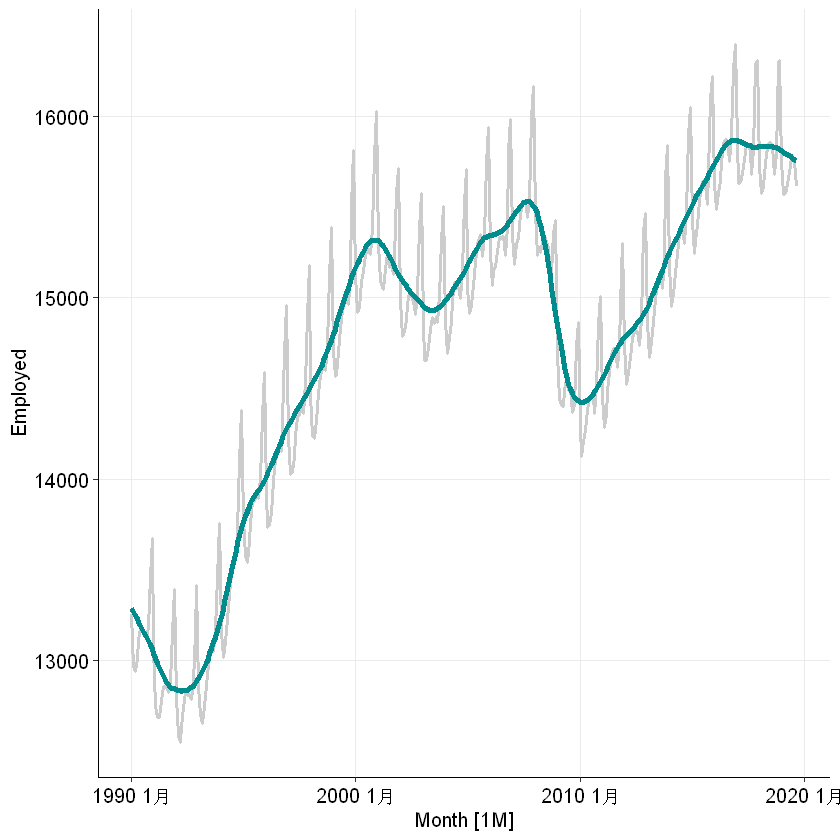

In [7]:
#step 在原时间序列上绘制趋势组件
components(dcmp) %>%
  as_tsibble() %>%    #step 得到的dable对象继续转换成tsibble对象
  autoplot(Employed, color = "grey80", linewidth = 1) +
  geom_line(aes(y = trend), colour = "#008c8c", linewidth = 1.5) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

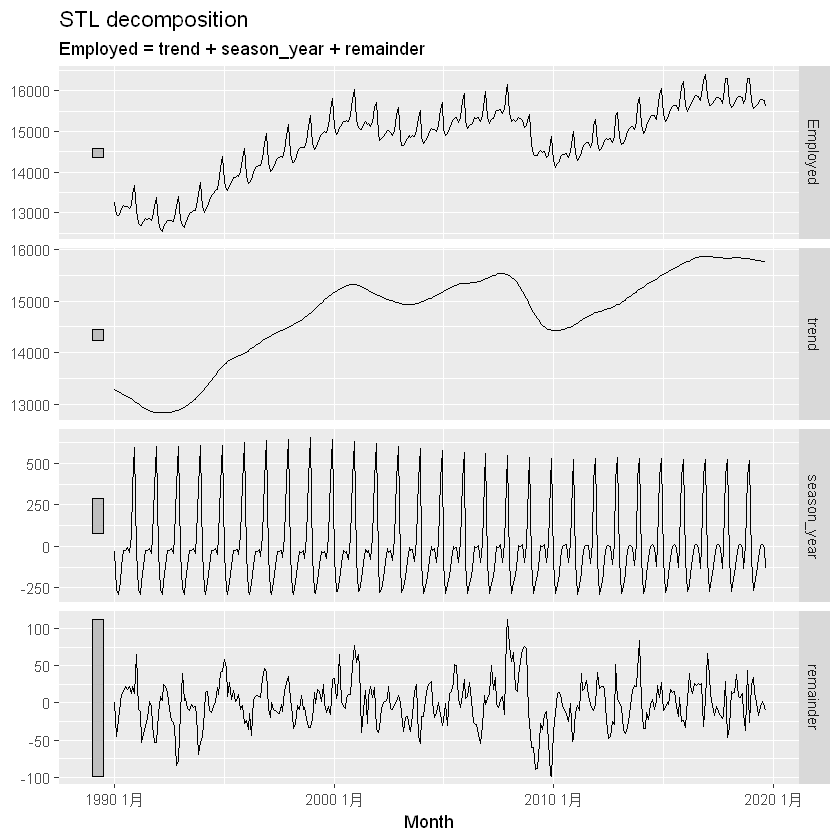

In [8]:
#? 直接绘制时间序列的分解图
components(dcmp) %>%
  autoplot()

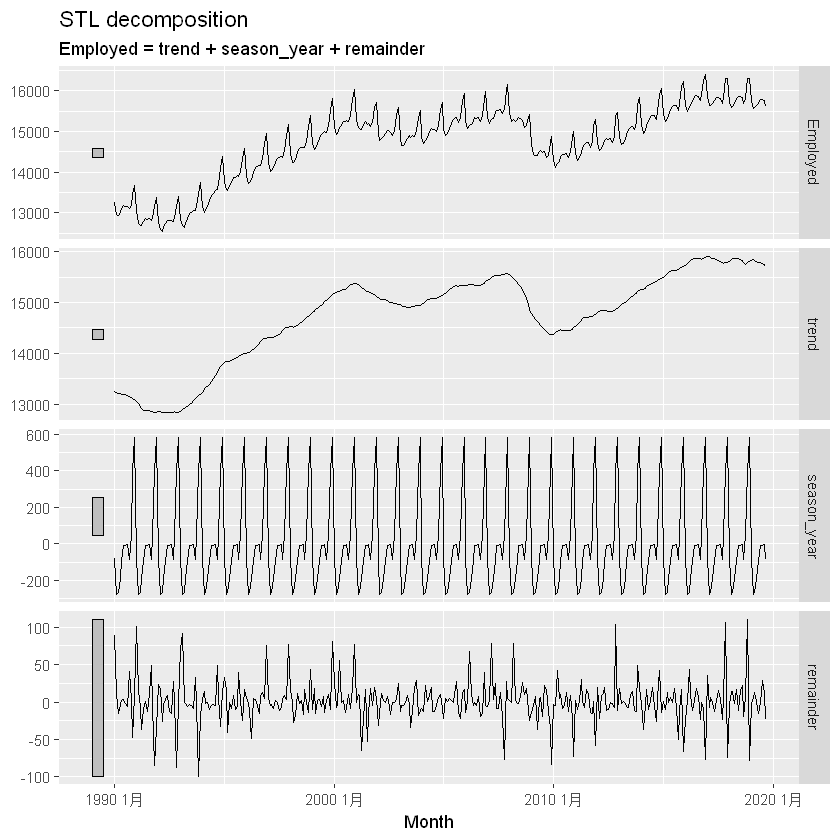

In [12]:
#! 注意两个组件的书写形式
us_retail_employment %>%
  model(stl = STL(Employed ~ trend(window = 7) +
                    season(window = "periodic"),
                  robust = TRUE)
  ) %>%
  components() %>%
  autoplot()

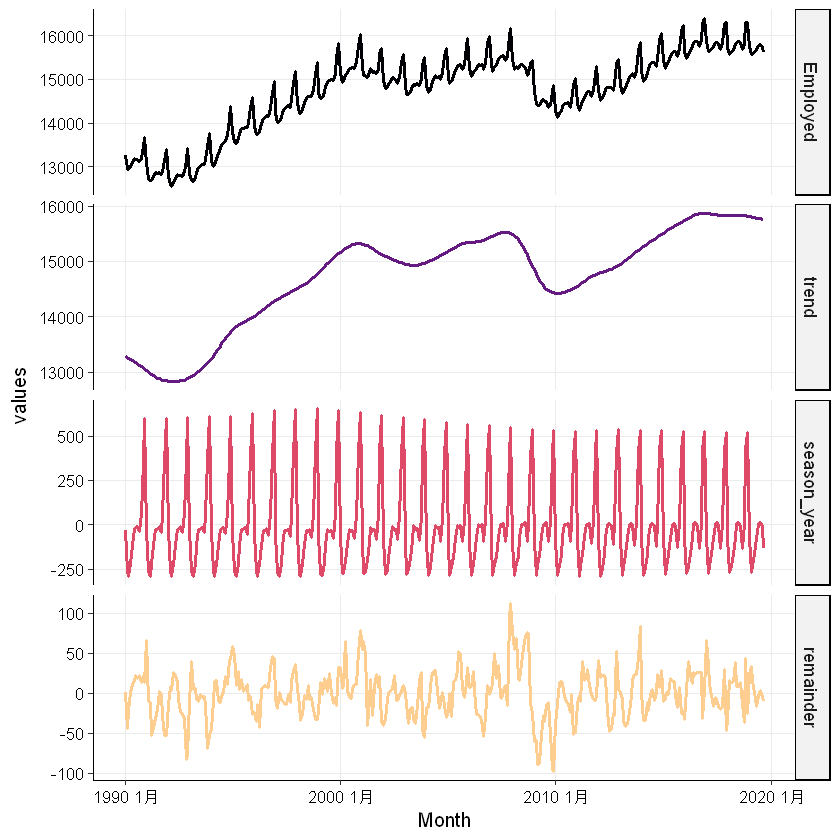

In [19]:
#step 绘图更加细致
components(dcmp) %>%
  as_tsibble() %>%
  select(-c(.model, season_adjust)) %>%
  pivot_longer(
    where(is.numeric),
    names_to = "decomposition",
    values_to = "values"
  ) %>%
  mutate(
    decomposition = factor(
      decomposition,
      levels = c("Employed", "trend", "season_year", "remainder")
    )
  ) %>%
  ggplot(aes(x = Month)) +
  geom_line(aes(y = values, color = decomposition), linewidth = .9) +
  scale_color_viridis_d(option = "magma", end = .9) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line(),
    axis.text = element_text(size = 10),
    strip.text = element_text(size = 11),
    legend.position = "none"
  ) +
  facet_grid(decomposition ~ ., scales = "free_y")

如果从原始数据中删除季节性分量，则结果值为<span style = 'color:red'><strong>“季节性调整”数据（Seasonally adjusted data）</strong></span>。对于加法模型，季节性调整数据为：yt − St。对于乘法模型，则为：yt / St。

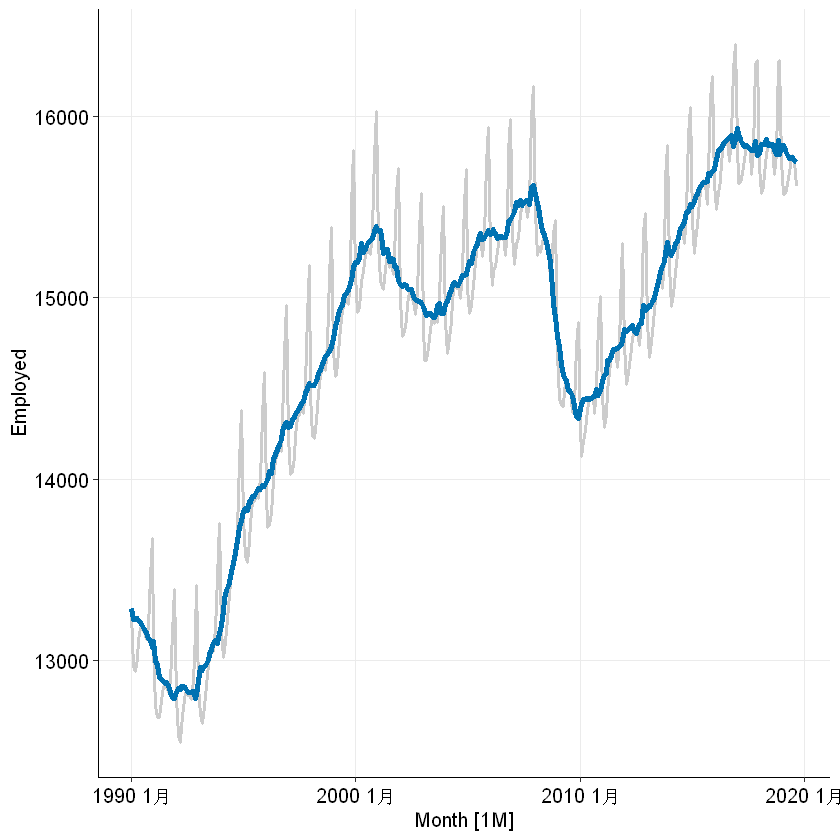

In [18]:
components(dcmp) %>%
  as_tsibble() %>%
  autoplot(Employed, colour = "grey80", linewidth = 1) +
  geom_line(aes(y = season_adjust), colour = "#0072B2", linewidth = 1.5) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

时序分解的常用方法是用LOESS光滑做季节性分解。这可以通过R中的`stl()`函数实现：
```r
stl(x, s.window, s.degree = 0,
    t.window = NULL, t.degree = 1,
    l.window = nextodd(period), l.degree = t.degree,
    s.jump = ceiling(s.window/10),
    t.jump = ceiling(t.window/10),
    l.jump = ceiling(l.window/10),
    robust = FALSE,
    inner = if(robust)  1 else 2,
    outer = if(robust) 15 else 0,
    na.action = na.fail)
```
其中`ts`是将要分解的时序数据，参数`s.window`控制季节效应变化的速度，`t.window`控制趋势效应变化的速度。`s.window`：季节性提取的loess窗口的跨度，可以是字符串 "periodic"，表示<span style = 'color:red'><strong>存在周期性现象，使得季节效应在各年间都一样</strong></span>。或者根据Cleveland等人的建议是一个奇数且至少为7的整数。该参数没有默认值。`t.window`：趋势提取的 loess 窗口的跨度，应为奇数。如果为 NULL，则采用默认值nextodd(ceiling((1.5*period) / (1-(1.5/s.window))))。


虽然stl()函数只能处理相加模型，但这也不算一个多严重的限制，因为相乘模型总可以通过对数变换转换成相加模型，用经过对数变换的序列拟合出的相加模型也总可以再转化回原始尺度。以如下乘数模型为例。

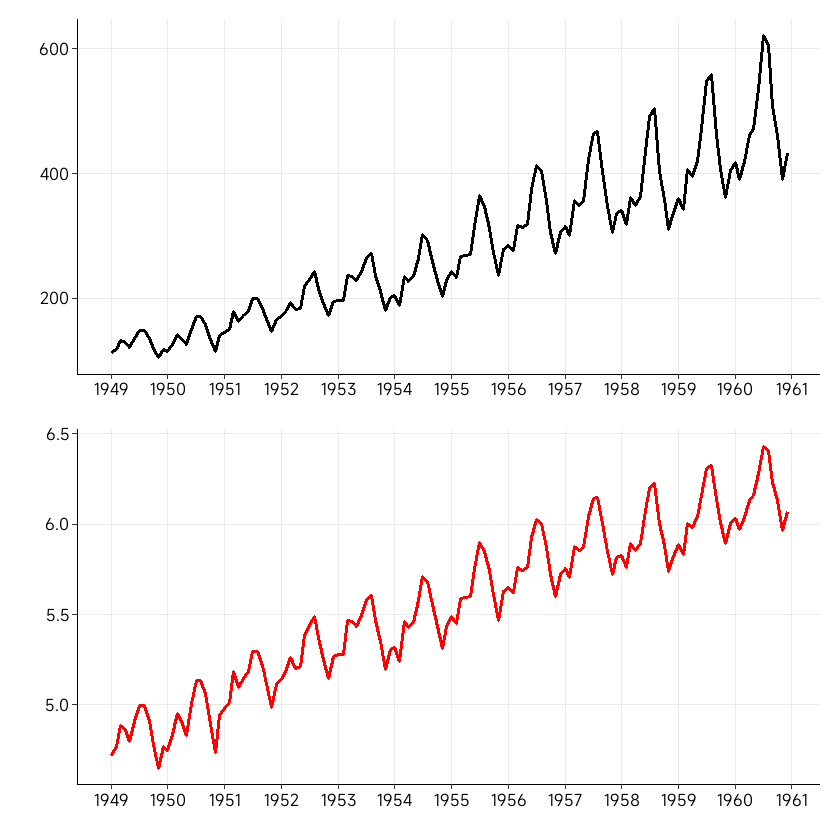

In [5]:
# 对数处理前后数据可视化
library(tidyverse)
library(lubridate)
library(scales)
library(ggpubr)
library(showtext)
library(patchwork)
library(zoo)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()

date <- as.Date.ts(AirPassengers)

l_AirPassengers <- log(AirPassengers)

raw <- data.frame(
  num = as.numeric(AirPassengers),
  date = date
  ) 

trans <- data.frame(
  num = as.numeric(l_AirPassengers),
  date = date
  ) 


p1 <- ggplot(raw)+
  geom_line(aes(x = date, y = num), linewidth = 1)+
  scale_x_date(
    date_breaks = "1 year",
    date_labels = "%Y"
  )+
  theme_pubr()+
  theme(
    panel.grid.major = element_line(),
    text = element_text(family = "misans"),
    axis.title = element_blank()
  )
  
p2 <- ggplot(trans)+
  geom_line(aes(x = date, y = num), color = "red", linewidth = 1)+
  scale_x_date(
    date_breaks = "1 year",
    date_labels = "%Y"
  )+
  theme_pubr()+
  theme(
    panel.grid.major = element_line(),
    text = element_text(family = "misans"),
    axis.title = element_blank()
  )

p1/p2

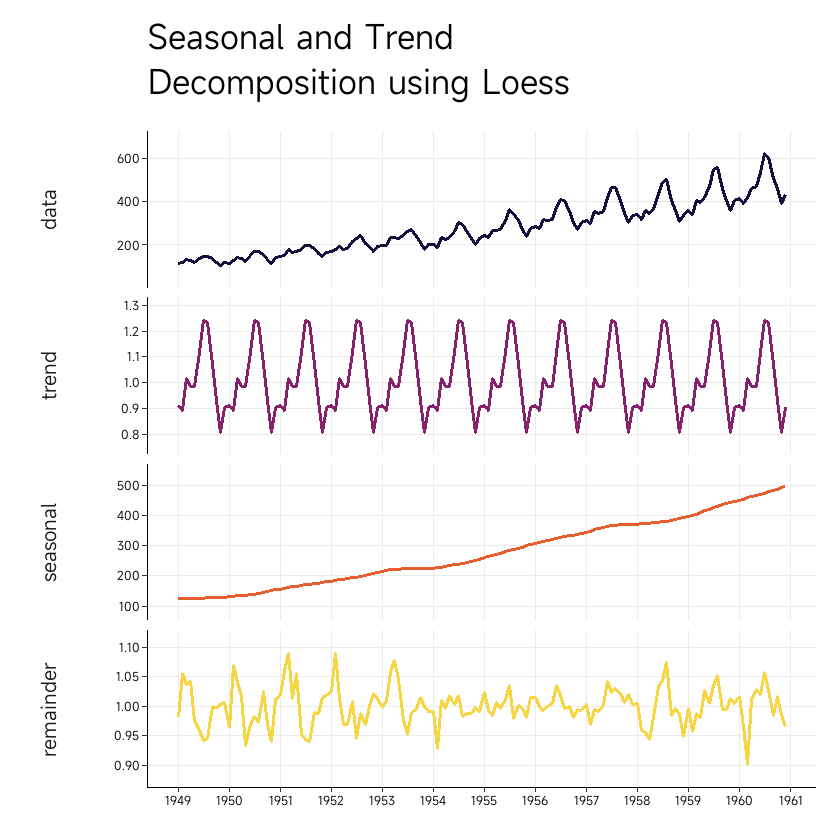

In [7]:
# stl()进行季节性分解
result <- as.numeric(exp(stl(l_AirPassengers, s.window = "period")$time.series)) # 先提取数据，然后转换成原数据

plot <- data.frame(
  date = rep(date, times = 4),
  num = c(as.numeric(AirPassengers), result),
  type = fct(rep(c("data", "trend", "seasonal", "remainder"), each = length(date)))
)

ggplot(plot, aes(x = date, y = num)) +
  geom_line(
    aes(group = 1, color = type),
    linewidth = 1
    )+
  scale_x_date(
    date_breaks = "1 year",
    labels = label_date(format = "%Y")
  )+
  facet_wrap(
    facets = ~type, 
    nrow = 4,
    scales = "free_y",
    strip.position = "left"
    )+
  labs(title = "Seasonal and Trend \nDecomposition using Loess")+
  scale_color_manual(values = viridis_pal(option = "inferno", begin = .1, end = .9)(4))+
  scale_y_continuous(expand = expansion(mult = c(.2, .2)))+
  theme_pubr()+
  theme(
    text = element_text(family = "misans"),
    plot.title = element_text(size = 25, margin = margin(0, 0, 0.5, 0, "cm")),
    plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
    panel.grid.major = element_line(),
    axis.title = element_blank(),
    axis.text = element_text(size = 9),
    legend.position = "none",
    strip.background.y = element_rect(fill = NA, color = NA),
    strip.text.y.left = element_text(size = 15),
    strip.placement = "outside",
    strip.switch.pad.wrap = unit(.5, "cm")
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


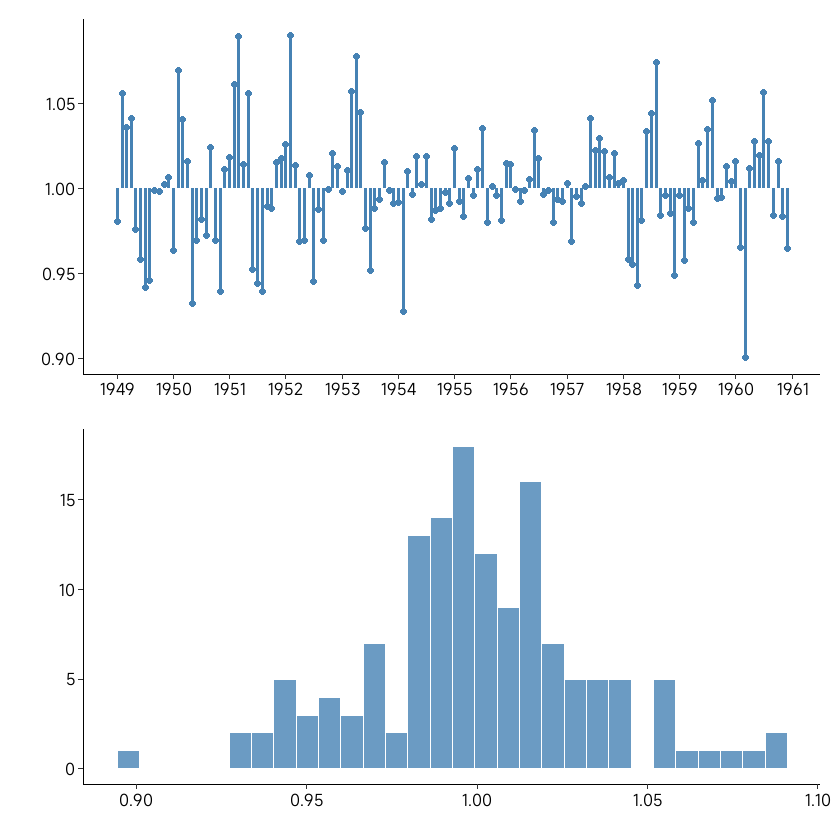

In [17]:
# 随机波动可视化，近似服从正态分布，分解有效
library(patchwork)

p1 <- ggplot(result)+
  geom_segment(
    aes(x = date, xend = date, y = 1, yend = remainder),
    linewidth = 1,
    color = "steelblue"
    )+
  geom_point(
    aes(x = date, y= remainder),
    color = "steelblue"
    )+
  scale_x_date(
    date_breaks = "1 year",
    date_labels = "%Y"
    )+
  theme_pubr()+
  theme(
    text = element_text(family = "misans"),
    axis.title = element_blank()
  )

p2 <- ggplot(result)+
  geom_histogram(
    aes(remainder),
    color = "white",
    fill = "steelblue",
    alpha = .8
    )+
  theme_pubr()+
  theme(
    text = element_text(family = "misans"),
    axis.title = element_blank()
  )

p1/p2

## 时间序列的特征

从时间序列计算的任何数字汇总都可以是该时间序列的一个特征，例如平均值、最小值或最大值等等。这些在fpp3生态中都可以用`features()`函数实现，该函数的`features`参数可以指定一个函数列表：

```r
features(.tbl, .var, features, ...)
```

In [2]:
library(fpp3)
tourism %>%
  features(
    Trips,
    features = list(
      mean = \(x) mean(x),
      sd = \(x) sd(x),
      quan = \(x) quantile(x)
    )
  ) %>%
  head() %>%
  print()


# A tibble: 6 × 10
  Region   State Purpose   mean    sd `quan_0%` `quan_25%` `quan_50%` `quan_75%`
  <chr>    <chr> <chr>    <dbl> <dbl>     <dbl>      <dbl>      <dbl>      <dbl>
1 Adelaide Sout… Busine… 156.   35.6       68.7     134.       153.       177.  
2 Adelaide Sout… Holiday 157.   27.1      108.      135.       154.       172.  
3 Adelaide Sout… Other    56.6  17.3       25.9      43.9       53.8       62.5 
4 Adelaide Sout… Visiti… 205.   32.5      137.      179.       206.       229.  
5 Adelaid… Sout… Busine…   2.66  4.30       0         0          1.26       3.92
6 Adelaid… Sout… Holiday  10.5   6.37       0         5.77       8.52      14.1 
# ℹ 1 more variable: `quan_100%` <dbl>


### ACF features

一个时间序列的所有自相关系数都可以被视为该序列的特征，同时还可以总结自相关系数以生成新的特征；例如，前十个自相关系数的平方和。还可以计算时间序列在不同时期之间的变化的自相关系数。也就是说，对数据进行“差分”，创建一个新的时间序列，由连续观测值之间的差值组成。然后，计算这个新的差分序列的自相关系数。另一种相关方法是计算时间序列的季节差分。例如，如果我们有月度数据，我们会计算连续的一月之间的差异，连续的二月之间的差异，依此类推。

`feat_acf()`函数
```r
feat_acf(x, .period = 1, lag_max = NULL, ...)
```
将返回六或七个特征：
- 原始数据的第一个自相关系数（滞后一期）；
- 原始数据的前十个自相关系数的平方和；
- 一次差分数据的第一个自相关系数；
- 一次差分数据的前十个自相关系数的平方和；
- 两次差分数据的第一个自相关系数；
- 两次差分数据的前十个自相关系数的平方和；
- 对于季节数据，还会返回第一个季节滞后的自相关系数（可以手动指定`.period`参数，设置为4表示季节性为月，12表示季节性为年；或者自动检测）

In [16]:
tourism %>%
  features(
    Trips,
    features = feat_acf
  ) %>%
  head() %>%
  print()

# A tibble: 6 × 10
  Region         State    Purpose   acf1 acf10 diff1_acf1 diff1_acf10 diff2_acf1
  <chr>          <chr>    <chr>    <dbl> <dbl>      <dbl>       <dbl>      <dbl>
1 Adelaide       South A… Busine… 0.0333 0.131     -0.520       0.463     -0.676
2 Adelaide       South A… Holiday 0.0456 0.372     -0.343       0.614     -0.487
3 Adelaide       South A… Other   0.517  1.15      -0.409       0.383     -0.675
4 Adelaide       South A… Visiti… 0.0684 0.294     -0.394       0.452     -0.518
5 Adelaide Hills South A… Busine… 0.0709 0.134     -0.580       0.415     -0.750
6 Adelaide Hills South A… Holiday 0.131  0.313     -0.536       0.500     -0.716
# ℹ 2 more variables: diff2_acf10 <dbl>, season_acf1 <dbl>


In [3]:
tourism %>%
  features(
    Trips,
    features = feat_acf
  ) %>%
  select(season_acf1) %>%
  head() %>%
  print()

# A tibble: 6 × 1
  season_acf1
        <dbl>
1      0.201 
2      0.351 
3      0.342 
4      0.345 
5     -0.0628
6      0.208 


### STL features

之前有介绍过STL分解，对于加法模型，定义为yt = Tt + St + Rt，且有以下定义：

![](图片素材/stl%20features.png)

如果FT(FS)越接近于1，那么趋势性（季节性）就越明显。

```r
feat_stl(x, .period, s.window = 11, ...)
```
其中`...`参数继承`stats::stl()`中的其余参数。

In [6]:
tourism %>%
  features(
    Trips,
    features = feat_stl
  ) %>%
  head() %>%
  print()
#? seasonal_strength_year说明季节性是年，即.period = 4（季度数据）的情况

# A tibble: 6 × 12
  Region  State Purpose trend_strength seasonal_strength_year seasonal_peak_year
  <chr>   <chr> <chr>            <dbl>                  <dbl>              <dbl>
1 Adelai… Sout… Busine…          0.464                  0.407                  3
2 Adelai… Sout… Holiday          0.554                  0.619                  1
3 Adelai… Sout… Other            0.746                  0.202                  2
4 Adelai… Sout… Visiti…          0.435                  0.452                  1
5 Adelai… Sout… Busine…          0.464                  0.179                  3
6 Adelai… Sout… Holiday          0.528                  0.296                  2
# ℹ 6 more variables: seasonal_trough_year <dbl>, spikiness <dbl>,
#   linearity <dbl>, curvature <dbl>, stl_e_acf1 <dbl>, stl_e_acf10 <dbl>


`feat_stl()`函数产生的成分解释（当数据为季度数据时）：
- seasonal_peak_year：表示峰值的时间（即表示哪一个月或季度包含最大的季节性分量）。这告诉我们关于季节性的某些信息。
- seasonal_trough_year：这表示低谷的时间（即表示哪一个月或季度包含最小的季节性分量）。
- spikiness：衡量了STL分解的余项分量Rt中尖峰的普遍性。它是余项分量Rt的留一方差的方差。
- linearity：衡量STL分解的趋势分量的线性程度。它基于应用于趋势分量的线性回归的系数。
- curvature：衡量STL分解的趋势分量的曲率。它基于应用于趋势分量的正交二次回归的系数。
- stl_e_acf1：是余项序列的第一个自相关系数。
- stl_e_acf10：是余项序列的前十个自相关系数的平方和。

In [9]:
#! 需要指定其他参数时(例如.period等）
tourism %>%
  features(
    Trips,
    \(x) feat_stl(x, .period = 4)
  ) %>%
  head() %>%
  print()

# A tibble: 6 × 12
  Region        State Purpose trend_strength seasonal_strength_4 seasonal_peak_4
  <chr>         <chr> <chr>            <dbl>               <dbl>           <dbl>
1 Adelaide      Sout… Busine…          0.464               0.407               3
2 Adelaide      Sout… Holiday          0.554               0.619               1
3 Adelaide      Sout… Other            0.746               0.202               2
4 Adelaide      Sout… Visiti…          0.435               0.452               1
5 Adelaide Hil… Sout… Busine…          0.464               0.179               3
6 Adelaide Hil… Sout… Holiday          0.528               0.296               2
# ℹ 6 more variables: seasonal_trough_4 <dbl>, spikiness <dbl>,
#   linearity <dbl>, curvature <dbl>, stl_e_acf1 <dbl>, stl_e_acf10 <dbl>


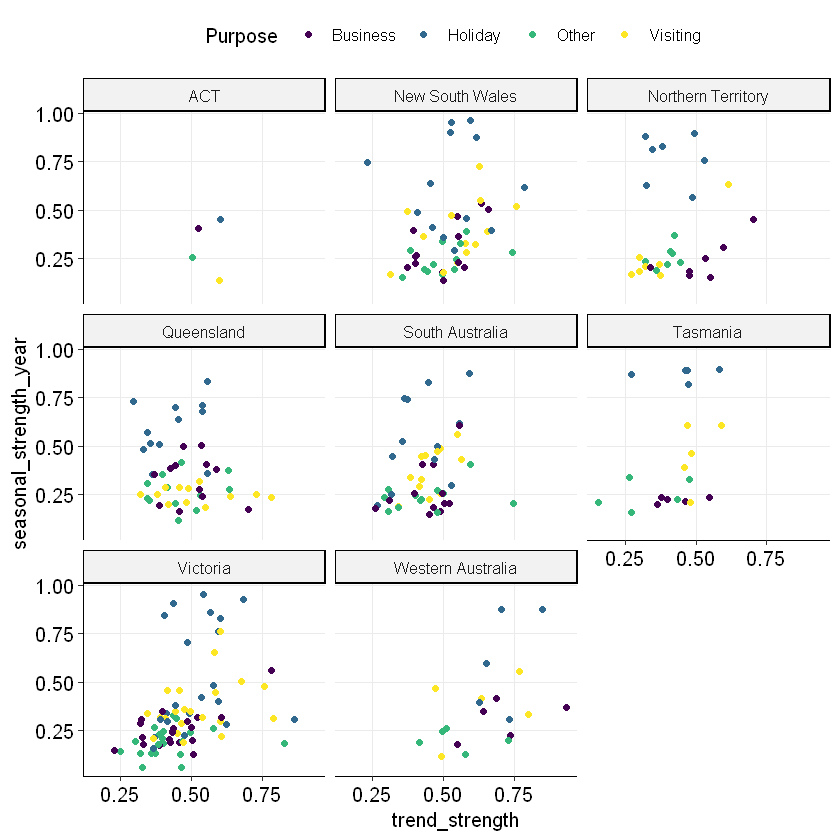

In [5]:
tourism %>%
  features(
    Trips,
    features = feat_stl
  ) %>%
  ggplot(aes(x = trend_strength, y = seasonal_strength_year,
             col = Purpose)) +
  geom_point() +
  scale_color_viridis_d() +
  facet_wrap(vars(State)) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

### Other Features

此外还有许多关于时间序列特征的计算，都包含在`feasts`包当中：

In [4]:
tourism %>%
  features(Trips, feature_set(pkgs = "feasts")) %>%
  head() %>%
  print()

Warning message:
"`n_flat_spots()` was deprecated in feasts 0.1.5.
ℹ Please use `longest_flat_spot()` instead.
ℹ The deprecated feature was likely used in the fabletools package.
  Please report the issue at <https://github.com/tidyverts/fabletools/issues>."


# A tibble: 6 × 51
  Region  State Purpose trend_strength seasonal_strength_year seasonal_peak_year
  <chr>   <chr> <chr>            <dbl>                  <dbl>              <dbl>
1 Adelai… Sout… Busine…          0.464                  0.407                  3
2 Adelai… Sout… Holiday          0.554                  0.619                  1
3 Adelai… Sout… Other            0.746                  0.202                  2
4 Adelai… Sout… Visiti…          0.435                  0.452                  1
5 Adelai… Sout… Busine…          0.464                  0.179                  3
6 Adelai… Sout… Holiday          0.528                  0.296                  2
# ℹ 45 more variables: seasonal_trough_year <dbl>, spikiness <dbl>,
#   linearity <dbl>, curvature <dbl>, stl_e_acf1 <dbl>, stl_e_acf10 <dbl>,
#   acf1 <dbl>, acf10 <dbl>, diff1_acf1 <dbl>, diff1_acf10 <dbl>,
#   diff2_acf1 <dbl>, diff2_acf10 <dbl>, season_acf1 <dbl>, pacf5 <dbl>,
#   diff1_pacf5 <dbl>, diff2_pacf5 <dbl>, season_pa

## 时间序列预测

![](图片素材\tidyforcast.png)

### 数据准备Data preparation (tidy)

预测的第一步是以正确的格式准备数据。此过程可能涉及加载数据、识别缺失值、筛选时间序列和其他预处理任务。此外许多模型有不同的数据要求：有些要求序列按时间顺序排列，有些则需要不存在缺失值。主要使用tsibble和tidyverse。

In [2]:
library(fpp3)
gdppc <- global_economy %>%
  mutate(GDP_per_capita = GDP / Population)
print(head(gdppc))

# A tsibble: 6 x 10 [1Y]
# Key:       Country [1]
  Country     Code   Year         GDP Growth   CPI Imports Exports Population
  <fct>       <fct> <dbl>       <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>
1 Afghanistan AFG    1960  537777811.     NA    NA    7.02    4.13    8996351
2 Afghanistan AFG    1961  548888896.     NA    NA    8.10    4.45    9166764
3 Afghanistan AFG    1962  546666678.     NA    NA    9.35    4.88    9345868
4 Afghanistan AFG    1963  751111191.     NA    NA   16.9     9.17    9533954
5 Afghanistan AFG    1964  800000044.     NA    NA   18.1     8.89    9731361
6 Afghanistan AFG    1965 1006666638.     NA    NA   21.4    11.3     9938414
# ℹ 1 more variable: GDP_per_capita <dbl>


### 根据数据绘图Plot the data (visualise)

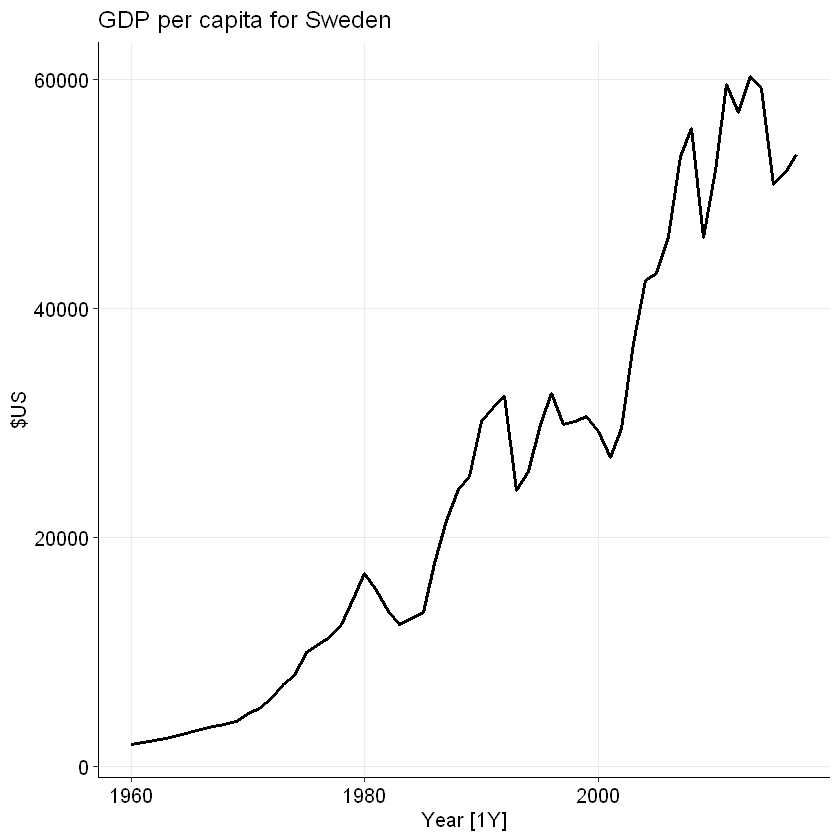

In [4]:
gdppc %>%
  filter(Country == "Sweden") %>%
  autoplot(GDP_per_capita, linewidth = 1) +
  labs(y = "$US", title = "GDP per capita for Sweden") +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )

### 指定模型Define a model(specify)

建模时有许多不同的时间序列模型可用于预测。为数据指定适当的模型对于生成适当准确的预测至关重要。`fabel`包中的模型是使用模型函数指定的，每个模型函数都使用一个`formula(y ~ x)`形式的接口。响应变量在公式的左侧指定，模型的结构在右侧编写。例如一个线性趋势模型：
```r
TSLM(GDP_per_capita ~ trend())
```
其中使用的模型函数是`TSLM()`，响应变量是`GDP_per_capita`，同时在建模时使用了“特殊”函数`trend()`指定线性趋势。

指定模型时有一些注意：
- 用于定义模型结构的特殊函数因模型而异（因为每个模型可以支持不同的结构）。每个模型函数的文档的“Specials”部分列出了这些特殊功能以及如何使用它们。
- fomula左侧指定响应变量，同时也支持对它们进行一些变换（如box-cox变换）

### 训练模型Train the model (estimate)

指定了适当的模型后，接下来需要根据一些数据训练模型。`model()`根据指定的数据集训练模型，且可以利用改函数同时训练多个模型。
```r
model(.data, ...)
```
如果.data为tsibble对象，模型将拟合每个key variables当中。生成的对象“mable”或者“a mable table”。

In [5]:
fit <- gdppc %>%
  model(
    trend_model = TSLM(GDP_per_capita ~ trend())
  )
print(fit)

Warning message:
"7 errors (1 unique) encountered for trend_model
[7] 0 (non-NA) cases
"


# A mable: 263 x 2
# Key:     Country [263]
   Country             trend_model
   <fct>                   <model>
 1 Afghanistan              <TSLM>
 2 Albania                  <TSLM>
 3 Algeria                  <TSLM>
 4 American Samoa           <TSLM>
 5 Andorra                  <TSLM>
 6 Angola                   <TSLM>
 7 Antigua and Barbuda      <TSLM>
 8 Arab World               <TSLM>
 9 Argentina                <TSLM>
10 Armenia                  <TSLM>
# ℹ 253 more rows


### 检验模型Check model performance (evaluate)

拟合模型后，检查其在数据上的表现非常重要。fpp3生态中有几种诊断工具可用于检查模型行为，以及允许将一个模型与另一个模型进行比较的准确性度量。

### 进行预测Produce forecasts(forecast)

在进行指定、训练和检查适当的模型后，就可以进行预测了。使用模型拟合的方程的最简单方法就是指定要预测的未来观测值的数量。可以使用`forecast()`函数
```r
## S3 method for class 'mdl_df'
forecast(
  object,
  new_data = NULL,
  h = NULL,
  point_forecast = list(.mean = mean),
  ...
)
```
参数解释：
- `object`：用于生成预测的时间序列模型
- `new_data`：包含用于预测的未来信息的tsibble。在有的情况下，当模型使用数据中的其他信息（例外如生回归量）时，通常需要指定该参数。
- `h`：预测时段，可以是数字或者指定时间的字符串（当时间序列是没有外生回归变量的常规时间序列，直接指定该参数）。
- `point_forecast`：指定生成的fable中返回的点预测度量（默认是使用预测分布的平均值，可以指定为其他统计量）。例如要计算预测中位数，可以使用list(.median = median)。

生成一个“fable”，或“a fable table”。每行对应于每个key variable的一个预测期。

In [7]:
fit %>%
  forecast(h = "2 years") %>%
  head() %>%
  print()

# A fable: 6 x 5 [1Y]
# Key:     Country, .model [3]
  Country     .model       Year  GDP_per_capita .mean
  <fct>       <chr>       <dbl>          <dist> <dbl>
1 Afghanistan trend_model  2018    N(526, 9653)  526.
2 Afghanistan trend_model  2019    N(534, 9689)  534.
3 Albania     trend_model  2018 N(4716, 476419) 4716.
4 Albania     trend_model  2019 N(4867, 481086) 4867.
5 Algeria     trend_model  2018 N(4410, 643094) 4410.
6 Algeria     trend_model  2019 N(4489, 645311) 4489.


预测模型可以和历史数据一起绘制，或者使用`autolayer()`添加图层，我更倾向于后者

Warning message in distributional::geom_hilo_ribbon(intvl_mapping, data = dplyr::anti_join(interval_data, :
"Ignoring unknown parameters: `linewidth`"
Warning message in distributional::geom_hilo_linerange(intvl_mapping, data = dplyr::semi_join(interval_data, :
"Ignoring unknown parameters: `linewidth`"
Warning message in ggplot2::geom_point(mapping = mapping, data = dplyr::semi_join(object, :
"Ignoring unknown parameters: `linewidth`"


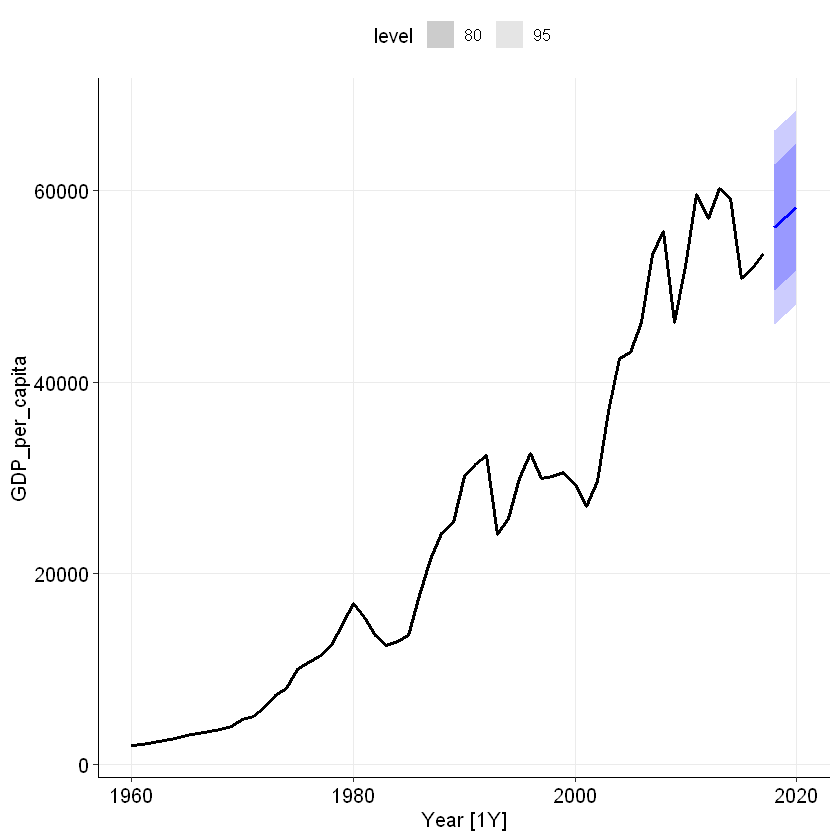

In [8]:
fore <- fit %>%
  forecast(h = "3 years") %>%
  filter(Country == "Sweden")

gdppc %>%
  filter(Country == "Sweden") %>%
  autoplot(GDP_per_capita, linewidth = 1) +
  autolayer(fore, linewidth = 1) +
  ggpubr::theme_pubr() +
  theme(
    panel.grid.major = element_line()
  )


#### ARIMA（差分自回归移动平均模型）预测模型

1. 验证序列平稳性

如果经由该随机过程所生成的时间序列满足下列条件：
- 均值E(Xt) = m是与时间t无关的常数。
- 方差Var(Xt) = s^2是与时间t无关的常数。
- 协方差Cov(Xt,Xt+k) = gk 是只与时期间隔k有关，与时间t无关的常数。
则称经由该随机过程而生成的时间序列是（弱）平稳的（stationary）。该随机过程便是一个平稳的随机过程（stationary stochastic process）。

一个平稳的时间序列指的是：遥想未来所能获得的样本时间序列，我们能断定其均值、方差、协方差必定与眼下已获得的样本时间序列等同。非平稳的时序可以通过差分来转换为平稳性序列。

可以使用`tseries`包中的`adf.test()`函数：Augmented Dickey-Fuller (ADF) Test 是一种用于检验时间序列是否具有单位根（unit root）的统计检验方法。如果存在单位根，表示时间序列具有非平稳性。
```r
adf.test(x, alternative = c("stationary", "explosive"),
         k = trunc((length(x)-1)^(1/3)))
```
其中"alternative"参数项指示备择假设，必须是 "stationary"（默认）或 "explosive" 中的一个。"stationary"：表示备择假设是时间序列是平稳的，即不存在单位根，是稳定的时间序列。"explosive"：表示备择假设是时间序列是爆炸性的，即存在单位根，是非平稳的时间序列。默认备择假设认为时间序列是平稳的。

In [16]:
# 以Nile数据集为例
library(tseries)
adf.test(Nile)
# 接受原假设，拒绝备择假设，认为时间序列非平稳


	Augmented Dickey-Fuller Test

data:  Nile
Dickey-Fuller = -3.3657, Lag order = 4, p-value = 0.0642
alternative hypothesis: stationary


利用`forecast`包中的`ndiffs()`函数确定差分阶数：
```r
ndiffs(
  x,
  alpha = 0.05,
  test = c("kpss", "adf", "pp"),
  type = c("level", "trend"),
  max.d = 2,
  ...
)
```
其主要参数：
- x：一个单变量的时间序列。
- alpha：检验的显著性水平，可能的取值范围为0.01到0.1。
- test：单位根检验的类型。
- type：回归中确定性分量的规范。
- max.d：允许的非季节性差分的最大数量。
- ...：传递给单位根检验的其他参数。

In [3]:
library(forecast)
ndiffs(Nile, max.d = 3)

[1] 1

`diff()`函数提取差分数据
```r
diff(x, lag = 1, differences = 1, ...)
```
其中：lag表示要使用的滞后阶数。differences表示差分的次数。

In [4]:
diff(Nile, differences = 1)

A Time Series:
 [1]   40 -197  247  -50    0 -347  417  140 -230 -145  -60  175 -116   26  -60
[16]  220 -381  159  182  -40  110  -60  100   10  -40 -190   70 -326   66   34
[31] -180  246 -107 -132  215 -224  328   30  -81 -138 -105 -270  368 -122  418
[46]  -20 -268  -68   57  -53   77   19   -2 -164  147 -101   52  244 -281   22
[61]   84  -20   99   40  -87  -75  188 -239  -95  -27  197  -34  -70   59  239
[76] -180   14  -26   42 -146    5   89  212 -132   68 -189  126   52 -160  205
[91] -114   -5  269 -258 -166  173 -201   -4   26

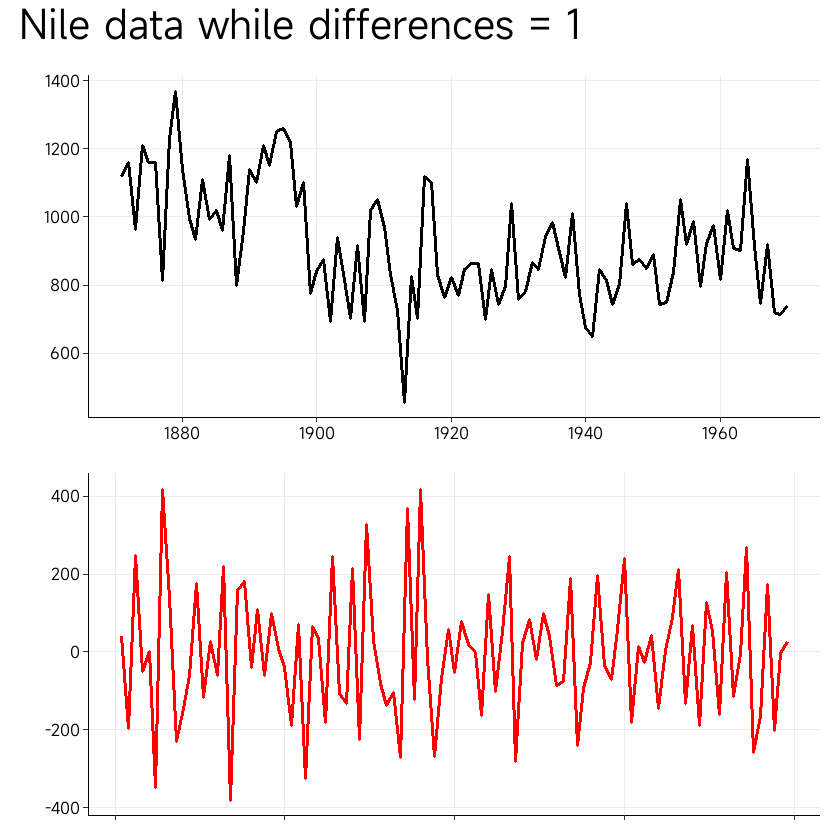

In [17]:
# 原数据与一阶差分可视化
library(tidyverse)
library(zoo)
library(ggpubr)
library(tseries)
library(forecast)
library(patchwork)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()
date <- as.Date.ts(Nile)
num1 <- as.numeric(Nile)
dNile <- diff(Nile, differences = 1)
num2 <- as.numeric(dNile)

p1 <- data.frame(date = date, num = num1) %>%
  ggplot(aes(x = date, y = num))+
  geom_line(linewidth = 1)+
  theme_pubr()

p2 <- data.frame(x = seq(1:length(num2)), num = num2) %>%
  ggplot(aes(x = x, y = num))+
  geom_line(linewidth = 1, color = "red")+
  theme_pubr()+
  theme(axis.text.x = element_blank())
  
  
(p1 / p2) + plot_annotation(title = "Nile data while differences = 1")&theme(
  text = element_text(family = "misans"),
  plot.title = element_text(size = 30),
  axis.title = element_blank(),
  panel.grid.major = element_line()
)  

In [18]:
adf.test(diff(Nile))

Warning message in adf.test(diff(Nile)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(Nile)
Dickey-Fuller = -6.5924, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


可以进一步对一阶差分后的数据进行白噪声检验，如果为白噪声，那么差分后的数据过去不能包含未来的相关信息，时间序列没有参考价值。
```r
Box.test(x, lag = 1, type = c("Box-Pierce", "Ljung-Box"), fitdf = 0)
```

In [7]:
Box.test(diff(Nile), type =  "Ljung-Box")
# 拒绝原假设，该时间序列不是白噪声


	Box-Ljung test

data:  diff(Nile)
X-squared = 16.492, df = 1, p-value = 4.885e-05


2. 找到一个（或几个）合理的模型（即选定可能的p值和q值）。

ARIMA(p, d, q)模型意味着时序被差分了d次，且序列中的每个观测值都是用过去的p个观测值和q个残差的线性组合表示的。为确定参数，最简单的方法是利用`forecast`包中的`auto.arima()`函数，避免人工判断造成的失误：

In [8]:
library(forecast)
summary(auto.arima(Nile))

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 = 20177:  log likelihood = -630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -16.06603 139.8986 109.9998 -4.005967 12.78745 0.825499
                    ACF1
Training set -0.03228482

如果人工判断需要进行ACF（自相关）和PACF（偏自相关）图形的绘制，利用函数`acf(), pacf()`：
```r
acf(x, lag.max = NULL,
    type = c("correlation", "covariance", "partial"),
    plot = TRUE, na.action = na.fail, demean = TRUE, ...)

pacf(x, lag.max, plot, na.action, ...)
```


参数解释：
- `x, y`：一个单变量或多变量（不包括 ccf）的数值型时间序列对象，或一个数值向量或矩阵，或一个 "acf" 对象。
- `lag.max`：计算自相关函数（ACF）的最大滞后阶数。默认值为 10，通过公式 10log⁡10(N/m) 计算得出，其中 N 为观测值的数量，m 为序列的数量。会自动限制为序列中观测值数量减 1 的值。
- `type`：一个字符型字符串，表示要计算的 ACF 类型。允许的值为 "correlation"（默认值，表示自相关）、"covariance" 或 "partial"（偏自相关）。
- `plot`：逻辑型。如果为 TRUE（默认值），将绘制 ACF 图。
- `na.action`：处理缺失值的函数。可以使用 na.pass。
- `demean`：逻辑型。计算协方差时是否以样本均值为中心。

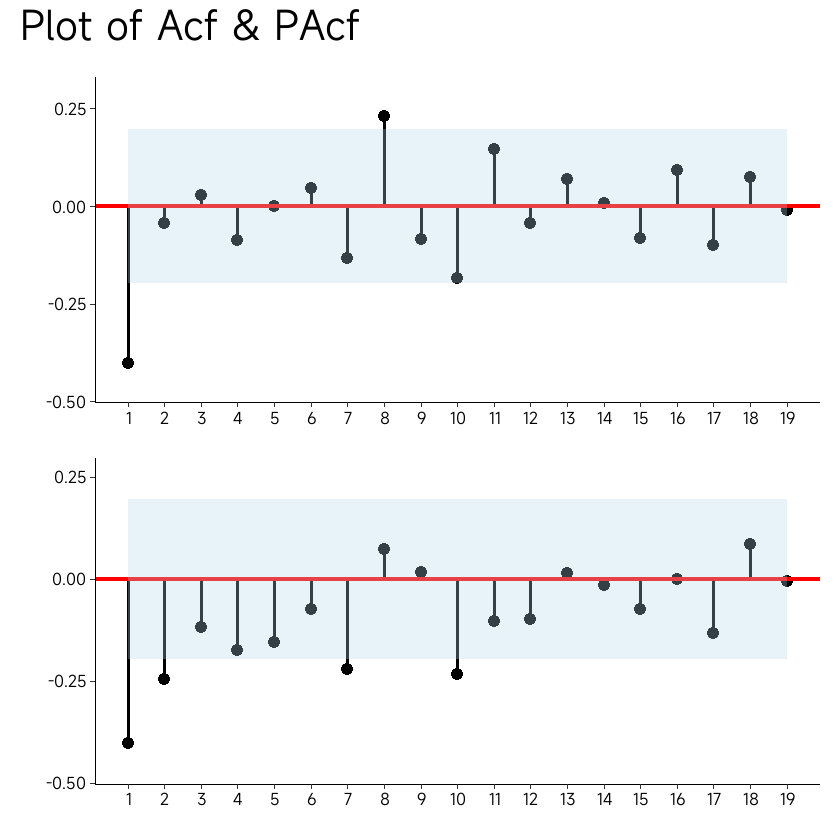

In [9]:
library(scales)

dNile <- diff(Nile)
result1 <- acf(dNile, plot = FALSE)
result2 <- pacf(dNile, plot = FALSE)

p1 <- data.frame(
  lag = as.numeric(result1$lag)[-1], 
  acf = as.numeric(result1$acf)[-1]
  ) %>%
  ggplot() +
    geom_segment(
      aes(x = lag, xend = lag, y = 0, yend = acf),
      linewidth = 1,
      color = "black"
      ) +
    geom_point(
      aes(x = lag, y = acf),
      color = "black",
      size = 3
      )+
    geom_hline(
      yintercept = 0,
      color = "red",
      linewidth = 1.2
      )+
    # 绘制置信区间
    geom_ribbon(
    aes(x = lag, ymin = - 1.96 / sqrt(length(Nile)), ymax =  1.96 / sqrt(length(Nile))),
    fill = "lightblue",
    alpha = 0.3
    )+
    scale_y_continuous(expand = expansion(add = c(0.1, 0.1)))+
    scale_x_continuous(breaks = breaks_width(width = 1))

p2 <- data.frame(lag = result2$lag, acf = result2$acf) %>%
  ggplot() +
  geom_segment(
    aes(x = lag, xend = lag, y = 0, yend = acf),
    linewidth = 1,
    color = "black"
  ) +
  geom_point(
    aes(x = lag, y = acf),
    color = "black",
    size = 3
  )+
  geom_hline(
    yintercept = 0,
    color = "red",
    linewidth = 1.2
  )+
  geom_ribbon(
    aes(x = lag, ymin = - 1.96 / sqrt(length(Nile)), ymax =  1.96 / sqrt(length(Nile))),
    fill = "lightblue",
    alpha = 0.3
  )+
  scale_y_continuous(expand = expansion(add = c(0.1, 0.1)))+
  scale_x_continuous(breaks = breaks_width(width = 1))

(p1 / p2) + plot_annotation(title = "Plot of Acf & PAcf") & theme_pubr()+
  theme(
    text = element_text(family = "misans"),
    plot.title = element_text(size = 30),
    axis.title = element_blank()
    )

人工判断的依据是拖尾和截尾。拖尾指序列以指数率单调递减或振荡衰减，而截尾指序列从某个时点之后变得非常小<span style = 'color:red'>（这个判断“小”的依据往往是看acf和pacf图是否落入置信区间之内）</span>：如果采用AR(p)模型（p阶自回归）：p的依据是acf拖尾，pacf在p阶后截尾，模型为ARIMA(p, d, 0)。如果采用MA(q)模型（q阶移动平均）：q的依据是acf在q阶后截尾，pacf拖尾，模型为ARIMA(0, d, q)。如果采用ARMA模型（自回归移动平均模型），则acf和pacf都要求拖尾。

依据图中信息，可以选择ARIMA(1, 1, 1)

3. 拟合模型

可以利用`forecast`包中的`arima()`函数对模型进行拟合，输入时间序列数据以及模型确定的参数：

In [10]:
library(forecast)
fit <- arima(Nile, order = c(1, 1, 1))
fit


Call:
arima(x = Nile, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 19769:  log likelihood = -630.63,  aic = 1267.25

返回结果中：
- aic是赤池信息量准则， AIC越小，模型越好。如果我们有其他备选模型，则可以通过比较AIC值来得到最合理的模型。

4. 模型评价

一般来说，一个回归模型如果合适，那模型的残差应该满足均值为0的正态分布，并且对于任意的滞后阶数，残差自相关系数都应该为零。即残差应该满足独立正态分布。

In [11]:
# 查看拟合结果的所有属性
attributes(fit)

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"    

$class
[1] "Arima"

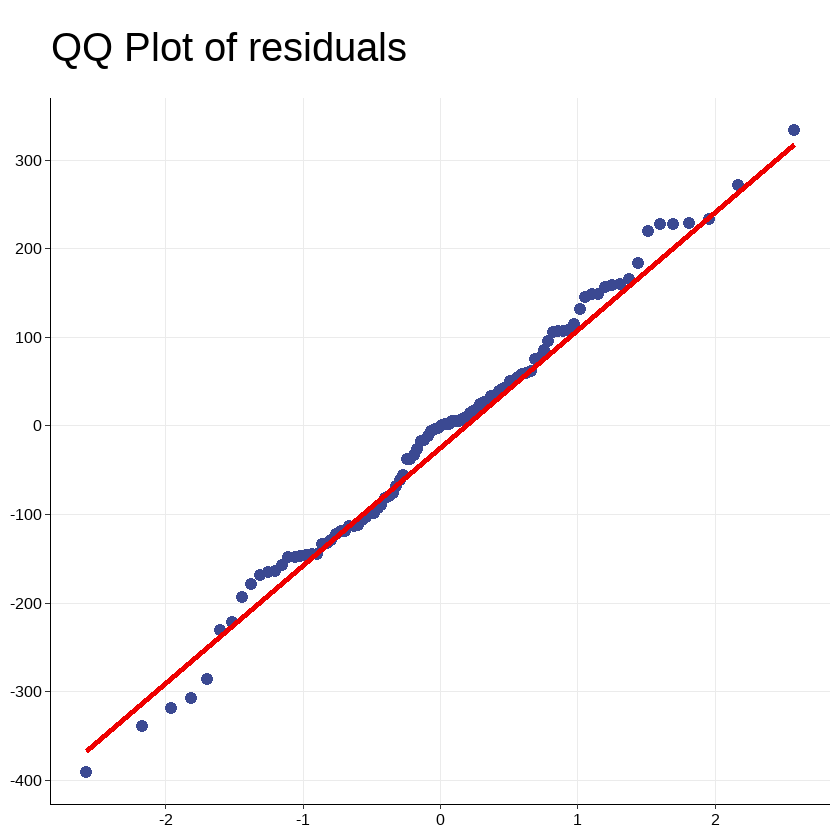

In [12]:
# 提取残差并进行Q-Q图的检验
data.frame(residuals = as.numeric(fit$residuals)) %>%
  ggplot(mapping = aes(sample = residuals)) +
    geom_qq(
      aes(color = "color1"),
      distribution = stats::qnorm, 
      dparams = list(mean = 0, sd = 1),
      size = 3
      ) +
    geom_qq_line(
      aes(color = "color2"),
      linewidth = 1.5
    )+
    labs(title = "QQ Plot of residuals")+
    scale_y_continuous(breaks = breaks_width(width = 100))+
    ggsci::scale_color_aaas()+
    theme_pubr()+
    theme(
      plot.title = element_text(size = 30, margin = margin(.5, 0, .5, 0, "cm")),
      panel.grid.major = element_line(),
      axis.title = element_blank(),
      legend.position = "none"
    )

进行残差的自相关系数检验：

In [13]:
Box.test(fit$residuals, type =  "Ljung-Box")
# 接受原假设，残差是白噪声，即没有自相关性。


	Box-Ljung test

data:  fit$residuals
X-squared = 0.10739, df = 1, p-value = 0.7431


5. 数据预测

利用`forecast()`函数进行最后的分析：
```r
## S3 method for class 'Arima'
forecast(
  object,
  h = ifelse(object$arma[5] > 1, 2 * object$arma[5], 10),
  level = c(80, 95),
  fan = FALSE,
  xreg = NULL,
  lambda = object$lambda,
  bootstrap = FALSE,
  npaths = 5000,
  biasadj = NULL,
  ...
)
```

主要参数：
- ` object`：输入类型为 "Arima"、"ar" 或 "fracdiff" 的对象。
- `h`：预测的周期数。如果使用 xreg，则忽略 h，预测的周期数将设置为 xreg 的行数。
- `level`：预测区间的置信水平。可以是一个数值或者数值向量。
- `fan`：如果为TRUE，则level置信区间水平设置为seq(51, 99, by=3)。这适用于绘制风扇图。
- `xreg`：未来的回归变量值（仅适用于类别为 Arima 的对象）。一个数值向量或矩阵的外部回归变量；不应该是数据框。
- `bootstrap`：如果为TRUE，则使用模拟和重新抽样的错误计算预测区间。
- `npaths`：当bootstrap = TRUE 时，计算模拟预测区间时使用的样本路径数。

In [22]:
pre <- forecast(
    object = fit,
    h = 10,
    level = c(90, 95)
)

print(as.data.frame(pre))

     Point Forecast    Lo 90    Hi 90    Lo 95    Hi 95
1971       816.1813 584.9094 1047.453 540.6039 1091.759
1972       835.5596 588.1335 1082.986 540.7332 1130.386
1973       840.4889 587.7645 1093.213 539.3492 1141.629
1974       841.7428 585.5188 1097.967 536.4331 1147.053
1975       842.0617 582.7583 1101.365 533.0826 1151.041
1976       842.1429 579.8866 1104.399 529.6452 1154.641
1977       842.1635 577.0098 1107.317 526.2134 1158.114
1978       842.1687 574.1546 1110.183 522.8102 1161.527
1979       842.1701 571.3271 1113.013 519.4408 1164.899
1980       842.1704 568.5283 1115.813 516.1057 1168.235


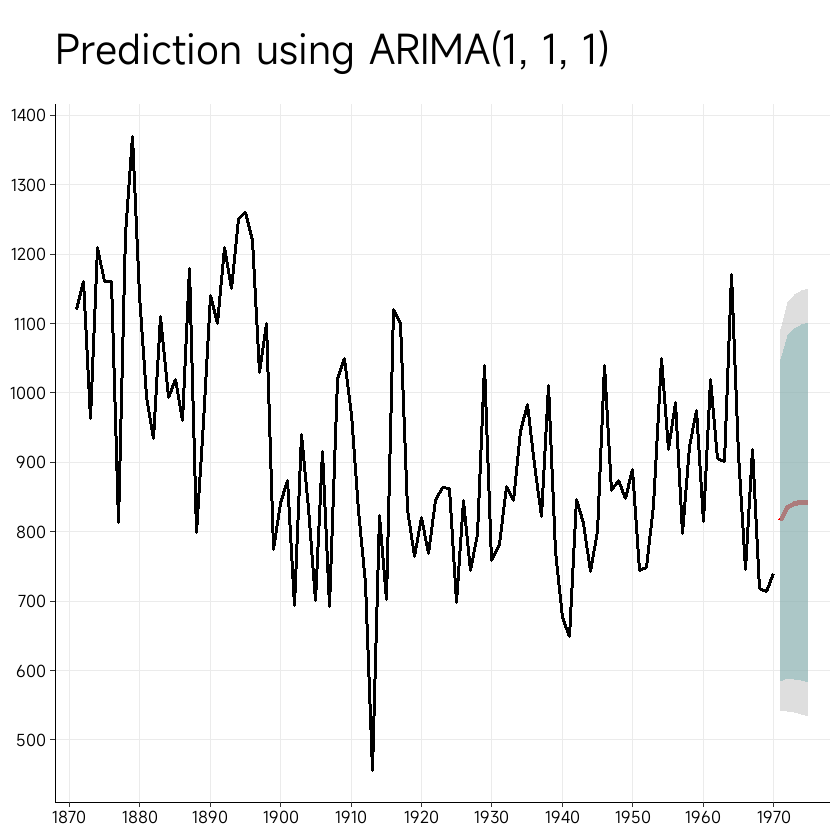

In [23]:
# 绘制预测图
library(zoo)

pre <- forecast(
  object = fit,
  h = 5,
  level = c(90, 95)
) %>%
  as.data.frame() %>%
    rownames_to_column("date")

colnames(pre) <- c("date", "forecast", "lower90", "upper90", "lower95", "upper95")

data.frame(date = year(as.Date.ts(Nile)), raw = as.numeric(Nile)) %>%
    ggplot() +
      geom_line(
        aes(x = date, y = raw),
        linewidth = 1,
        color = "black"
        ) +
      geom_line(
        data = pre,
        aes(x = as.numeric(date), y = forecast),
        linewidth = 1.5,
        color = "red"
      )+
      geom_ribbon(
        data = pre,
        aes(
          x = as.numeric(date),
          ymin = lower90,
          ymax = upper90),
        fill = "#008c8c",
        alpha = .4
      )+
      geom_ribbon(
        data = pre,
        aes(
          x = as.numeric(date),
          ymin = lower95,
          ymax = upper95),
        fill = "grey",
        alpha = .5
      )+
      labs(title = "Prediction using ARIMA(1, 1, 1)")+
      scale_x_continuous(
        breaks = breaks_width(width = 10),
        expand = expansion(add = c(3, 3))
        )+
      scale_y_continuous(breaks = breaks_width(width = 100))+
      theme_pubr()+
      theme(
        text = element_text(family = "misans"),
        plot.title = element_text(size = 30, margin = margin(.5, 0, .5, 0, "cm")),
        panel.grid.major = element_line(),
        axis.title = element_blank(),
        legend.position = "none"
      )

#### SARIMA预测模型

更进一步的，季节性时间序列模型 SARIMA(p,d,q)×(P,D,Q)s。
有些时间序列数据存在明显的周期性变化，这往往是由于季节性变化（包括季度、月度、周度等变化）或其他一些固有因素引起的，这类序列称为季节性时间序列。


设季节性时间序列的变化周期为s，即时间间隔为s的观测值有相似之处。对于非平稳季节性时间序列，有时需要进行D次季节差分之后才能转换为平稳的序列。在此基础上可以建立关于周期s的 
P阶自回归Q阶移动平均季节时间序列模型。于是下标P, Q, p, q分别表示季节与非季节自回归、移动平均算子的最大滞后阶数，D, d分别表示季节和非季节性差分次数。当P = D = Q = 0时，SARIMA模型退化为ARIMA模型，故ARIMA模型是SARIMA模型的特例。

1. 检测序列是否为白噪声

In [34]:
library(tseries)
Box.test(AirPassengers, type = "Ljung-Box")


	Box-Ljung test

data:  AirPassengers
X-squared = 132.14, df = 1, p-value < 2.2e-16


2. 借助`auto.arima()`函数自动确定所有参数。

In [31]:
library(forecast)
auto.arima(AirPassengers)

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

3. 模型拟合

利用`arima()`函数进行拟合：
```r
arima(x, order = c(0L, 0L, 0L),
      seasonal = list(order = c(0L, 0L, 0L), period = NA),
      xreg = NULL, include.mean = TRUE,
      transform.pars = TRUE,
      fixed = NULL, init = NULL,
      method = c("CSS-ML", "ML", "CSS"), n.cond,
      SSinit = c("Gardner1980", "Rossignol2011"),
      optim.method = "BFGS",
      optim.control = list(), kappa = 1e6)

```

In [38]:
s_fit <- arima(
    AirPassengers, 
    order = c(2, 1, 1), 
    seasonal = list(order = c(0, 1, 1), period = 12)
    )
s_fit 


Call:
arima(x = AirPassengers, order = c(2, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12))

Coefficients:
         ar1     ar2      ma1     sma1
      0.6031  0.1998  -0.9773  -0.1065
s.e.  0.0898  0.0898   0.0294   0.0864

sigma^2 estimated as 127.7:  log likelihood = -504.18,  aic = 1018.36

4. 模型检验

5. 预测

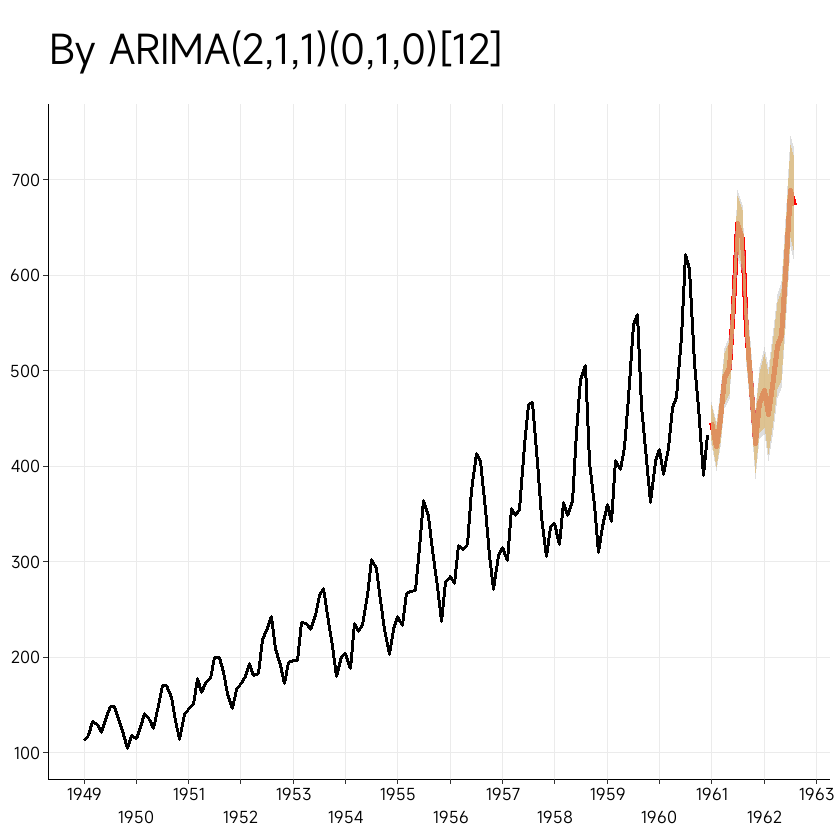

In [39]:
library(forecast)
library(tidyverse)
library(zoo)
library(lubridate)
library(scales)
library(ggpubr)
library(showtext)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()
s_fit <- auto.arima(AirPassengers)
s_pre <- forecast(
  object = s_fit,
  h = 20,
  level = c(90, 95)
) %>%
  as.data.frame() %>%
    rownames_to_column("date")

s_pre$date <- my(s_pre$date)
colnames(s_pre) <- c("date", "forecast", "lower90", "upper90", "lower95", "upper95")
data.frame(date = as.Date.ts(AirPassengers), raw = as.numeric(AirPassengers)) %>%
  ggplot() +
  geom_line(
    aes(x = date, y = raw),
    linewidth = 1,
    color = "black"
  ) +
  geom_line(
    data = s_pre,
    aes(x = date, y = forecast),
    linewidth = 1.5,
    color = "red"
  )+
  geom_ribbon(
    data = s_pre,
    aes(
      x = date,
      ymin = lower90,
      ymax = upper90),
    fill = "orange",
    alpha = .6
  )+
  geom_ribbon(
    data = s_pre,
    aes(
      x = date,
      ymin = lower95,
      ymax = upper95),
    fill = "grey",
    alpha = .5
  )+
  labs(title = "By ARIMA(2,1,1)(0,1,0)[12]")+
  scale_x_date(
    date_labels = "%Y",
    date_breaks = "1 year",
    guide = guide_axis(n.dodge = 2)
  ) +
  scale_y_continuous(breaks = breaks_width(width = 100))+
  theme_pubr()+
  theme(
    text = element_text(family = "misans"),
    plot.title = element_text(size = 30, margin = margin(.5, 0, .5, 0, "cm")),
    panel.grid.major = element_line(),
    axis.title = element_blank(),
    legend.position = "none"
  )

也可以利用acf和pacf进行人工筛选，此处不再阐述。另一种处理季节性时间序列的可行方法是利用`stl()`对数据进行分解，然后对趋势项的数据进行ARIMA拟合，最后再还原成未经分解预测数据。

# 聚类分析

通常，人们可以凭借经验和专业知识来实现分类，而聚类分析则可以作为一种定量方法，从数据分析角度给出一个更准确细致的分类工具。对样本进行分类叫做<span style = 'color:red'><strong>Q型聚类分析</strong></span>，对指标进行分类叫做<span style = 'color:red'><strong>R型聚类分析</strong></span>。

最常用的两种聚类方法是层次聚类（hierarchical agglomerative clustering）和划分聚类
（partitioning clustering）。在层次聚类中，每一个观测值自成一类，这些类每次两两合并，直到所有的类被聚成一类为止。在划分聚类中，首先指定类的个数K，然后观测值被随机分成K类，再重新形成聚合的类。这两种方法都对应许多可供选择的聚类算法。对于层次聚类来说，最常用的算法是单联动（single linkage）、全联动（complete linkage ）、平均联动（average linkage）、质心（centroid）和 Ward方法。对于划分聚类来说，最常用的算法是K均值（K-means）和围绕中心点的划分（PAM）。

每个聚类方法都有它的优点和缺点。

## 计算距离

`dist()`函数可以计算`矩阵或数据框中`所有行（观测值）之间的距离，计算的结果为dist对象， 只能通过矩阵（as.matrix()）直接与dist对象进行转换：
```r
dist(x, method = "euclidean", diag = FALSE, upper = FALSE, p = 2)
```

参数解释：
- `x`：一个数值矩阵、数据框（data frame）或 "dist" 对象，代表你要计算距离的数据。
- `method`：距离度量的方法，必须是以下之一："euclidean"（欧氏距离）、"maximum"（切比雪夫距离）、"manhattan"（曼哈顿距离）、"canberra"（堪培拉距离）、"binary"（二进制距离）或 "minkowski"（闵可夫斯基距离）。你可以使用这些方法中的一个，也可以使用它们的不含歧义的子字符串。
- `diag`：逻辑值，指示是否打印距离矩阵的对角线。
- `upper`：逻辑值，指示是否打印距离矩阵的上三角部分。
- `p`：参数指定Minkowski（闵氏）距离的幂。

其中任意两个观测值i, j之间的欧式距离为这两个观测值所有变量的离差平方和开根号。

In [2]:
library(flexclust)
library(tidyverse)
data("nutrient")
slice_head(nutrient, n = 6) %>%
  dist(
    method = "euclidean",
    diag = TRUE,
    upper = TRUE
  ) -> result

as.matrix(result) %>%
  as.data.frame()

,BEEF BRAISED,HAMBURGER,BEEF ROAST,BEEF STEAK,BEEF CANNED,CHICKEN BROILED
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BEEF BRAISED,0.00000,95.64000,80.93429,35.24202,161.22410,226.39002
HAMBURGER,95.64000,0.00000,176.49218,130.87784,65.87868,130.76578
BEEF ROAST,80.93429,176.49218,0.00000,45.76418,242.05968,307.16015
BEEF STEAK,35.24202,130.87784,45.76418,0.00000,196.42609,261.61888
BEEF CANNED,161.22410,65.87868,242.05968,196.42609,0.00000,66.06277
CHICKEN BROILED,226.39002,130.76578,307.16015,261.61888,66.06277,0.00000


可以看出，观测值之间距离越大，异质性越大，但由于未对数据进行特征缩放处理，距离很大程度上由数值较大的变量控制。利用缩放后数据有利于均衡各变量的影响。`scale()`函数可以实现此功能<span style = 'color:red'><strong>（注意，特征缩放有归一化，标准化等方法，scale()函数使用的是z-score标准化处理）</strong></span>：
```r
scale(x, center = TRUE, scale = TRUE)
```

In [5]:
nutrient.scale <- scale(nutrient)
head(nutrient.scale, 6)

,energy,protein,fat,calcium,iron
BEEF BRAISED,1.3101024,0.2352002,1.2897287,-0.4480464,0.1495365
HAMBURGER,0.3714397,0.4704005,0.3125618,-0.4480464,0.2179685
BEEF ROAST,2.1005553,-0.9408009,2.2668955,-0.4736761,-0.2610553
BEEF STEAK,1.6559256,0.0000000,1.6450621,-0.4480464,0.1495365
BEEF CANNED,-0.2708033,0.7056007,-0.3092717,-0.3455273,0.9022882
CHICKEN BROILED,-0.9130462,0.2352002,-0.9311051,-0.4608612,-0.6716471


## 层次聚类分析

层析聚类分析法算法如下：
1. 定义每个观测值（行或单元）为一类；
2. 计算每类和其他各类的距离；
3. 把距离最短的两类合并成一类，这样类的个数就减少一个；
4. 重复步骤2和步骤3，直到包含所有观测值的类合并成单个的类为止。

在层次聚类算法中，主要的区别是它们对类与类之间距离的定义不同。五种最常见的两类之间的距离定义：
1. 单联动：一个类中的点和另一个类中的点的最小距离。
2. 全联动：一个类中的点和另一个类中的点的最大距离。
3. 平均联动：一个类中的点和另一个类中的点的平均距离（也称作UPGMA，即非加权对组平均）。
4. 质心：两类中质心（变量均值向量）之间的距离。对单个的观测值来说，质心就是变量的值。
5. Ward法：两个类之间所有变量的方差分析的平方和。
   
- 单联动聚类方法倾向于发现细长的、雪茄型的类（形成细长的链状结构）。它也通常展示一种链式的现象。
- 全联动聚类倾向于将那些具有较大直径的类合并，形成大致相等直径的紧凑类。它对异常值非常敏感。
- 平均联动提供了以上两种方法的折中。相对来说，它不像链式，而且对异常值没有那么敏感。它倾向于把方差小的类聚合。
- Ward法倾向于把有少量观测值的类聚合到一起，并且倾向于产生与观测值个数大致相等的类。它对异常值也是敏感的。
- 质心法是一种很受欢迎的方法，因为其中类距离的定义比较简单、易于理解。相比其他方法，它对异常值不是很敏感。但是它可能不如平均联动法或Ward方法表现得好。

当需要嵌套聚类和有意义的层次结构时，层次聚类或许特别有用。在生物科学中这种情况很常见。在某种意义上分层算法是贪婪的，一旦一个观测值被分配给一个类，它就不能在后面的过程中被重新分配。另外，层次聚类难以应用到有数百甚至数千观测值的大样本中。

### hclust()函数进行层次聚类分析：

```r
hclust(d, method = "complete", members = NULL)
```

其中参数`d`传入dist对象，`method`参数决定类距离定义的算法："ward.D"、"ward.D2"、"single"（单联动）、"complete"（全联动）、"average"（等于 UPGMA，平均联动）、"mcquitty"（等于 WPGMA，加权平均联动）、"median"（等于 WPGMC）或 "centroid"（等于 UPGMC，质心法）。

In [6]:
dist(
nutrient.scale,
method = "euclidean",
diag = TRUE,
upper = TRUE
) %>%
hclust(method = "average") -> fit

fit
class(fit)


Call:
hclust(d = ., method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 27 


[1] "hclust"

### 绘制聚类树状图

对于hclust对象，可以用`plot()`函数直接进行绘制：
```r
plot(x, labels = NULL, hang = 0.1, check = TRUE,
     axes = TRUE, frame.plot = FALSE, ann = TRUE,
     main = "Cluster Dendrogram",
     sub = NULL, xlab = NULL, ylab = "Height", ...)
```

主要参数：
- `x`：一个由`hclust`产生的类型的对象。
- `hang`：标签应该在绘图高度下方垂挂的部分比例。负值会导致标签从0处垂挂。
- `labels`：参数决定叶子节点的标签的字符向量。默认情况下，使用原始数据的行名或行号。如果labels = FALSE，则不绘制任何标签。
- `...`：其他参数。

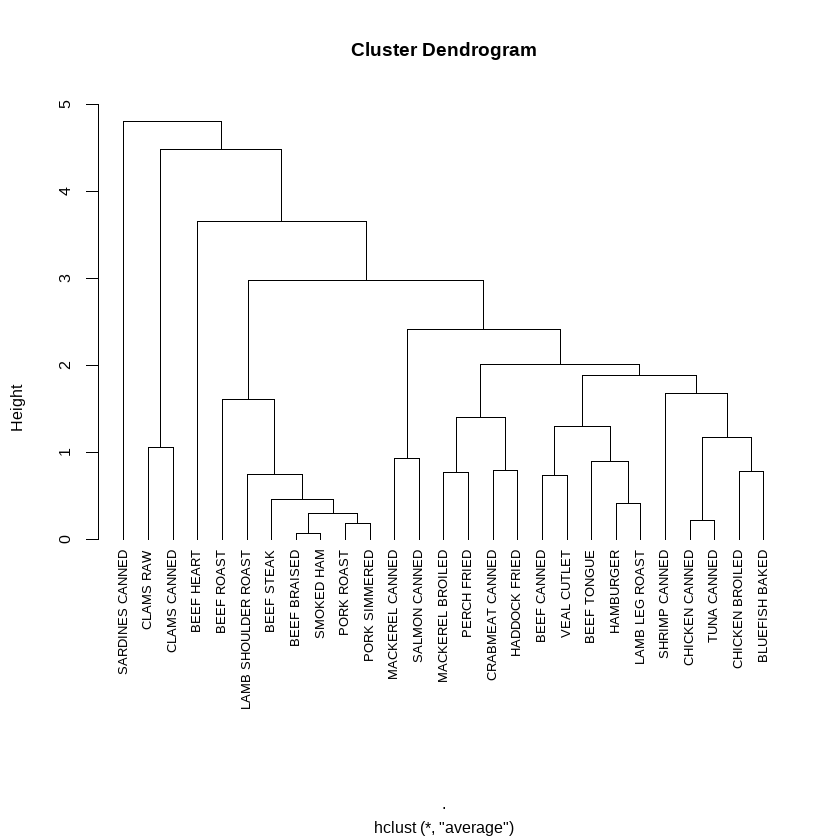

In [7]:
plot(fit, hang = -1, cex = .8)

### 选择聚类个数

树状图从下往上读，它展示了这些条目如何被结合成类。但这只体现了条目之间的相似性/异质性的层次分析视图：tuna canned和chicken canned是相似的，但是都和clams canned有很大的不同。但是，如果最终目标是确认分配的具体类数，需要额外的分析来选择聚类的适当个数。`NbClust`包提供了众多的指数来确定在一个聚类分析里类的最佳数目。不能保证这些指标得出的结果都一致。但是结果可用来作为选择聚类个数K值的一个参考。

`NbClust()`函数不必像之前一样先用`dist()`求出距离矩阵，然后再利用`hclust()`层次聚类。可以<span style = 'color:red'><strong>直接输入缩放后的数据</strong></span>进行分析：
```r
NbClust(data = NULL, diss = NULL, distance = "euclidean", min.nc = 2, max.nc = 15, method = NULL, index = "all", alphaBeale = 0.1)
```

主要参数：
- `data`：矩阵或数据集。
- `diss`：要使用的不相似性矩阵。默认情况下，diss=NULL，但如果需要被不相似性矩阵替代，distance参数应该设置为"NULL"。
- `distance`：用于计算不相似性矩阵的距离度量。必须是以下之一："euclidean"（欧几里德距离）、"maximum"（最大距离）、"manhattan"（曼哈顿距离）、"canberra"（堪培拉距离）、"binary"（二进制距离）、"minkowski"（闵可夫斯基距离）或"NULL"。默认情况下，distance="euclidean"。如果距离是"NULL"，则不相似性矩阵（diss）应由用户提供。如果distance不是"NULL"，则不相似性矩阵的参数应为"NULL"。
- `min.nc`：最小聚类数，介于1和（对象数量-1）之间。
- `max.nc`：最大聚类数，介于2和（对象数量-1）之间，大于或等于min.nc。默认情况下，max.nc=15。
- `method`：要使用的聚类距离计算方法。应该是以下之一："ward.D"、"ward.D2"、"single"、"complete"、"average"、"mcquitty"、"median"、"centroid"、"kmeans"。
- `index`：要计算的指数。可以选择如下值："kl"、"ch"、"hartigan"、"ccc"、"scott"、"marriot"、"trcovw"、"tracew"、"friedman"、"rubin"、"cindex"、"db"、"silhouette"、"duda"、"pseudot2"、"beale"、"ratkowsky"、"ball"、"ptbiserial"、"gap"、"frey"、"mcclain"、"gamma"、"gplus"、"tau"、"dunn"、"hubert"、"sdindex"、"dindex"、"sdbw"、"all"（除了GAP、Gamma、Gplus和Tau之外的所有指数）、"alllong"（包括Gap、Gamma、Gplus和Tau的所有指数）。
- `alphaBeale`：Beale指数的显著性值。

Warning message in pf(beale, pp, df2):
"NaNs produced"
Warning message in pf(beale, pp, df2):
"NaNs produced"


*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


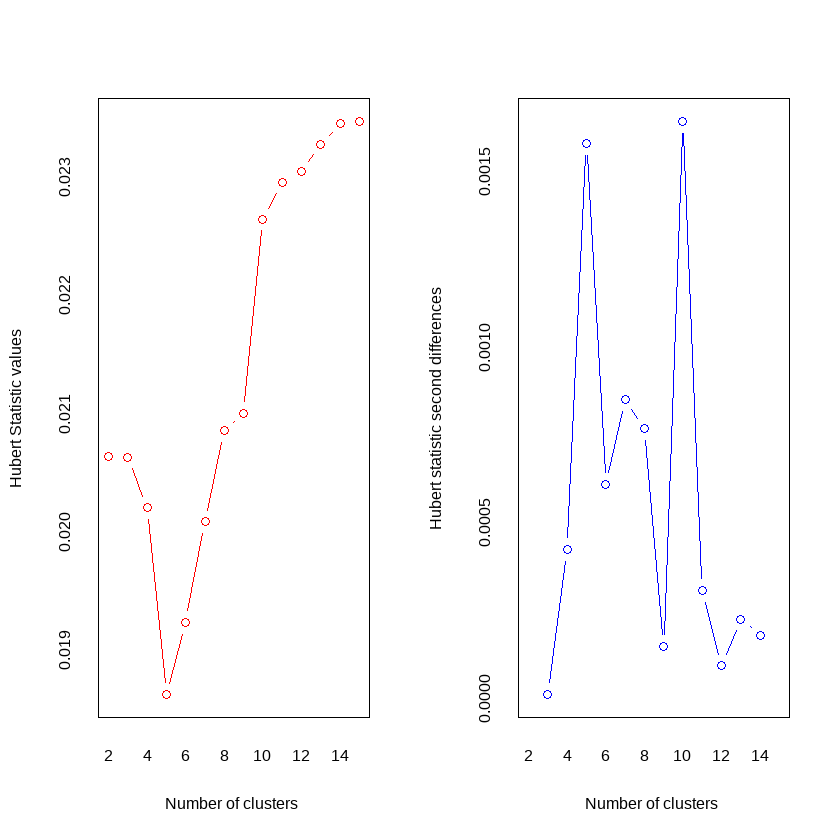

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 4 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 4 proposed 5 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 4 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number o

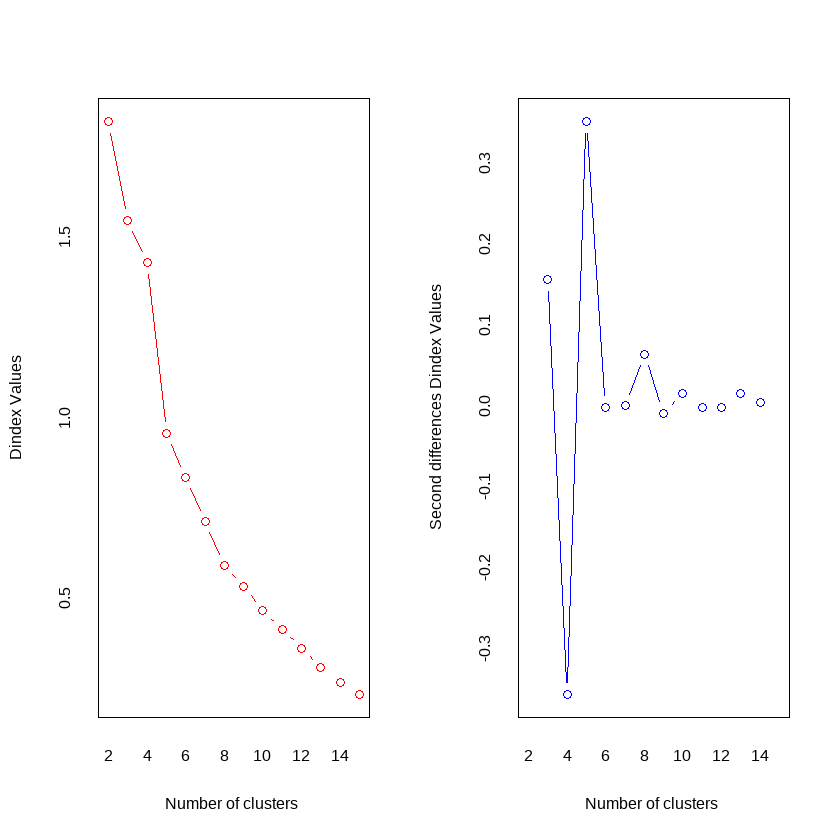

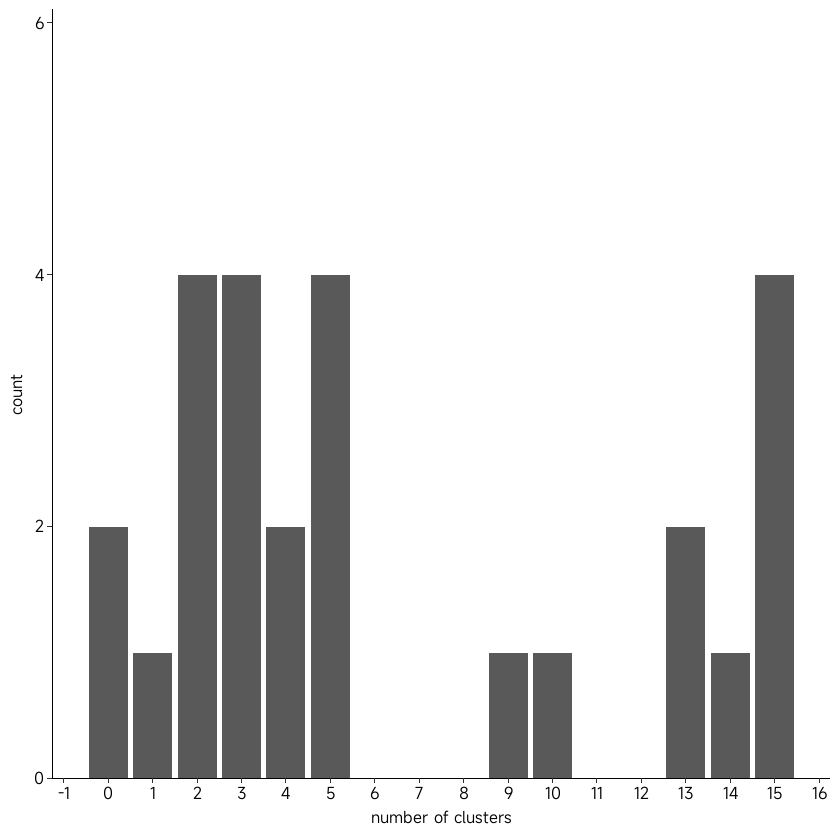

In [8]:
library(NbClust)
library(tidyverse)
library(flexclust)
library(ggpubr)
library(showtext)
library(scales)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()
data("nutrient")
nutrient.scale <- scale(nutrient)
cluster <- NbClust(
  data = nutrient.scale,
  distance = "euclidean",
  method = "average",
  min.nc = 2,
  max.nc = 15
)
# 提取评判准则最优结果，结果为矩阵形式。提取第一行转换成数据框可视化投票准则个数，确定最佳聚类个数。
freq <- as.data.frame(cluster$Best.nc[1,])
colnames(freq) <- "freq"

ggplot(freq)+
  geom_bar(aes(x = freq), color = "white")+
  labs(x = "number of clusters")+
  scale_x_continuous(breaks = breaks_width(width = 1)) +
  scale_y_continuous(
    expand = expansion(add = c(0, 0.1)), 
    limits = c(0, 6))+
  theme_pubr()+
  theme(
    text = element_text(family = "misans")
  )

### 获取聚类信息并可视化

`cutree()`函数可以将tree（`hclust()`函数生成对象）按照聚类个数进行划分：
```r
cutree(tree, k = NULL, h = NULL)
```
其中k是一个整数标量或向量，表示期望的群组数量。

In [9]:
cutree(tree = fit, k = 5)

BEEF BRAISED           HAMBURGER          BEEF ROAST          BEEF STEAK 
                  1                   2                   1                   1 
        BEEF CANNED     CHICKEN BROILED      CHICKEN CANNED          BEEF HEART 
                  2                   2                   2                   3 
     LAMB LEG ROAST LAMB SHOULDER ROAST          SMOKED HAM          PORK ROAST 
                  2                   1                   1                   1 
      PORK SIMMERED         BEEF TONGUE         VEAL CUTLET      BLUEFISH BAKED 
                  1                   2                   2                   2 
          CLAMS RAW        CLAMS CANNED     CRABMEAT CANNED       HADDOCK FRIED 
                  4                   4                   2                   2 
   MACKEREL BROILED     MACKEREL CANNED         PERCH FRIED       SALMON CANNED 
                  2                   2                   2                   2 
    SARDINES CANNED         TUNA CANNED       SHRIMP CANNED 
                  5                   2                   2

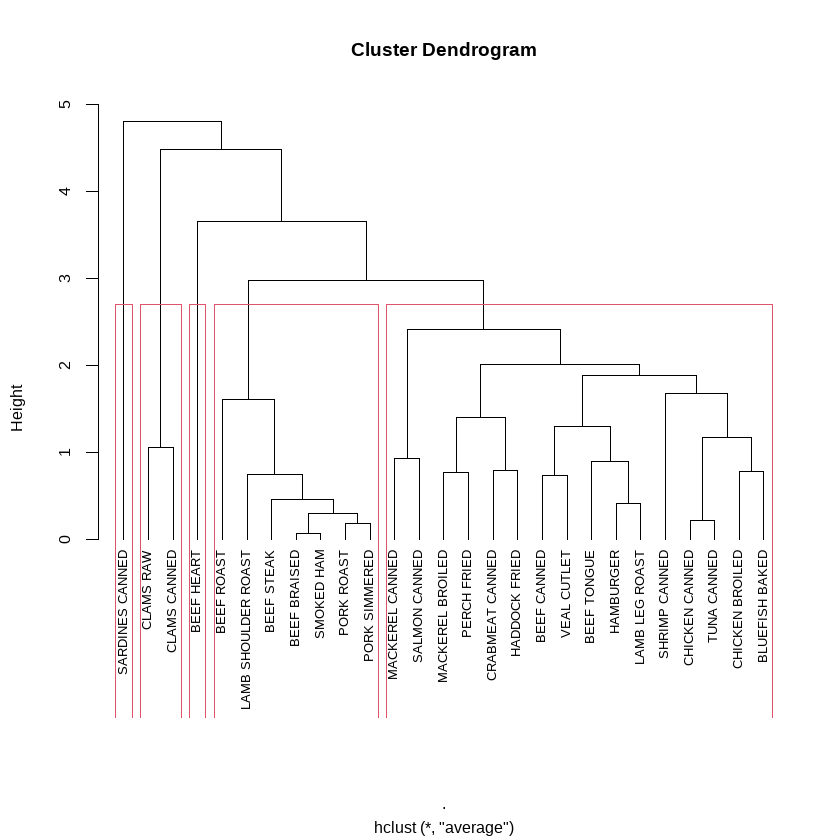

In [15]:
plot(fit, hang = -1, cex = 0.8)
rect.hclust(fit, k = 5)

高级绘图：

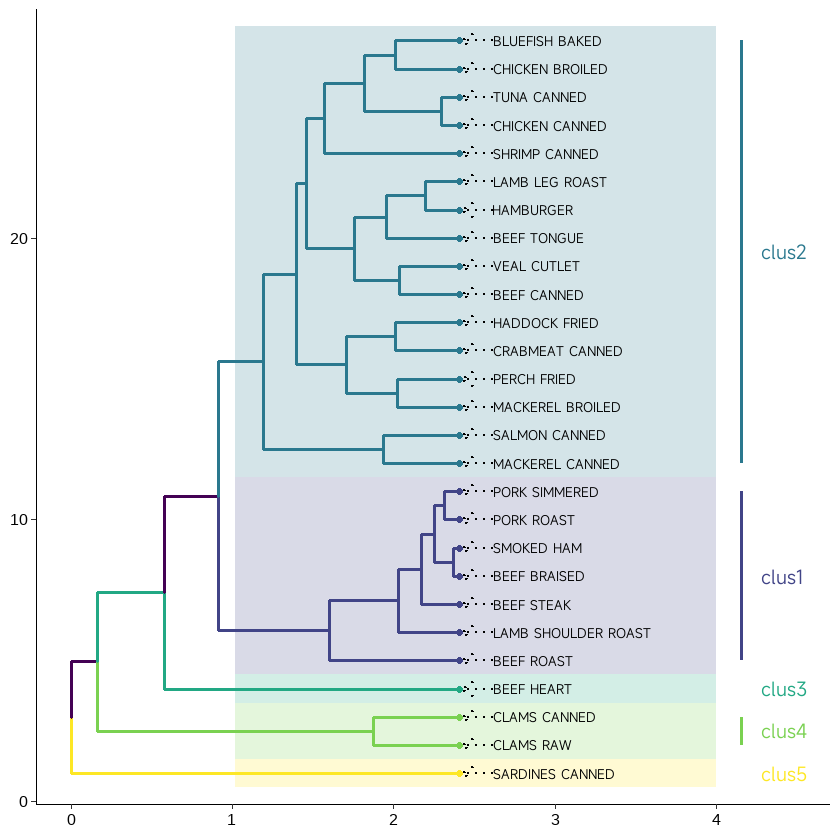

In [2]:
library(NbClust)
library(flexclust)
library(tidyverse)
library(ggpubr)
library(showtext)
library(scales)
library(treeio)
library(tidytree)
library(ggtree)
library(ggnewscale)
library(ggsci)

font_path <- "C:/USERS/LENOVO/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/MISANS-NORMAL.TTF"
font_add("misans", font_path)
showtext_auto()
data("nutrient")
nutrient.scale <- scale(nutrient)
fit <- hclust(
  d = dist(nutrient.scale, diag = TRUE, upper = TRUE),
  method = "average"
)
phylo <- as.phylo(fit)
tbl_tree <- as_tibble(phylo)

cut_result <- cutree(fit, k = 5)
g <- split(names(cut_result), cut_result)
names(g) <- paste0("clus", seq(1, 5))
tips <- data.frame(
  texa = names(cut_result),
  tips.color = paste0("clus", as.numeric(cut_result))
)
clade <- data.frame(
  id = c(33, 34, 8, 30, 25),
  annotation = c("clus1", "clus2", "clus3", "clus4", "clus5"),
  clade.color = c("clus1", "clus2", "clus3", "clus4", "clus5")
)
col_pal <- viridis_pal()(6)

p <- ggtree(
  tr = phylo,
  layout = "rectangular",
  size = 1
)
p <-  groupOTU(p, g, "CLUS") + aes(color = CLUS) 
plot <- p %<+% tips +
  geom_tippoint(
    mapping = aes(color = tips.color),
    show.legend = FALSE
  )+
  geom_tiplab(
    color = "black",
    align = TRUE,
    hjust = 0,
    linesize = .6,
    linetype = "dotted",
    offset = 0.2,
    arrow = arrow(length = unit(0.3, "cm")),
    geom = "text",
    family = "misans",
    size = 3.5
  )+
  geom_cladelab(
    data = clade, 
    mapping = aes(
      node = id,
      label = annotation,
      color = clade.color
    ),
    fontsize = 5,
    geom = "text",
    align = T,
    offset = 1.7,
    barsize = 1,
    family = "misans",
    offset.text = .1,
    show.legend = F
  ) +
  geom_hilight(
    data = clade,
    mapping = aes(
      node = id,
      fill = clade.color
    ),
    extendto = 4,
    type = "rect",
    to.bottom = T,
    alpha = .2,
    align = "left",
    show.legend = F
  ) +
  scale_x_continuous(expand = expansion(mult = c(0.05, 0.1))) +
  scale_colour_manual(values = col_pal) +
  scale_fill_manual(values = col_pal[-1]) +
  theme_pubr()+
  theme(legend.position = "none")

print(plot)

## 划分聚类分析

### K均值聚类

该算法步骤如下：
1. 选择K个中心点（随机选择K行）。
2. 把每个数据点分配到离它最近的中心点。
3. 重新计算每类中的点到该类中心点距离的平均值（也就说，得到长度为p的均值向量，这里的p是变量的个数）。
4. 分配每个数据到它最近的中心点。
5. 重复步骤(3)和步骤(4)直到所有的观测值不再被分配或是达到最大的迭代次数（R把10次作为默认迭代次数）。
这种方法的实施细节可以变化。R软件使用Hartigan & Wong（1979）提出的有效算法，这种算法是把观测值分成k组并使得观测值到其指定的聚类中心的平方的总和为最小。也就是说，在步骤(2)和步骤(4)中，每个观测值被分配到使下式得到最小值的那一类中：

![](图片素材\k均值聚类计算公式.png)

xij表示第i个观测值中第j个变量的值。 xkj表示第k个类中第j个变量的均值，其中p是变量的个数。K均值聚类能处理比层次聚类更大的数据集。另外，观测值不会永远被分到一类中。当提高整体解决方案时，聚类方案也会改动。但是均值的使用意味着所有的变量必须是连续的，<span style = 'color:red'><strong>并且这个方法很有可能被异常值影响</strong></span>。它在非凸聚类（例如U型）情况下也会变得很差。

# 机器学习

数据可分为结构化数据和非结构化数据。结构化数据是可以用二维表结构表示的数据；非结构化数据，是不能用二维表表示的数据，比如图片、文本、语音等。机器学习通常处理的是结构化数据，而非结构化数据，通常需要深度学习才能处理。


数据集通常先要划分为两部分：非测试集、测试集。
- 非测试集是训练模型用的，用的时候需要再划分为：
  - 训练集：用来训练模型参数的数据集，模型直接根据训练集来调整自身获得更好的预测效果。
  - 验证集：用于在训练过程中检验模型的性能状态、收敛情况：
    - 常用于超参数调参，根据几组模型验证集上的表现决定哪组超参数拥有最好的性能。
    - 还可用来监控训练过程中模型是否发生过拟合以判断何时停止训练，一般来说验证集表现稳定后，若继续训练，训练集表现还会继续上升，但是验证集会出现不升反降的情况，这样一般就发生了过拟合。
- 测试集：是测试模型用的，用来评价模型的泛化能力，即之前模型使用验证集确定了超参数，使用训练集调整了模型参数，最后使用一个从没有见过的数据集来判断该模型真正的性能如何。

重抽样，就是对数据集重复抽样，得到数据集的若干副本。机器学习传统的数据划分：训练集 + 测试集，就是对数据的一种重抽样：留出法（“holdout”）。留出法最简单，只得到了数据集的一个副本，所以只能做一次 “拟合模型 +模型预测 + 评估性能”。当从数据集抽样出多个副本，以做多次 “拟合模型 + 模型预测 + 评估性能”，取平均性能作为最终成绩---这种做法显然更科学。k 折交叉验证（“cv”），就是这种重抽样的代表，此外还有bootstrap自助重抽样等等。

嵌套重抽样，即两层重抽样，相当于是两层（外层和内层）for循环。外层是对整个数据集重抽样，生成整个数据集的若干副本，每个副本都划分为两部分：非测试集和测试集，于是就得到若干组非测试集和测试集划分，用于
整体上进行外循环的多次迭代：
1. 在非测试集上做特征选择/超参数调参 + 拟合最优特征子集/超参数模型（也即一轮内循环所做的事情）。
2. 在测试集上评估最优超参数模型性能，取平均性能作为整个模型的最终性能。
内层是对每一次外循环的非测试集重抽样，生成非测试集的若干副本，每个副本都划分为两部分：训练集和验证集，于是就得到若干组训练集（拟合模型）和验证集（评估模型性能）划分，通常是用于做特征选择/超参数调参的内循环多次迭代，以选出最优的特征子集/超参数，确定该次外循环迭代的最优超参数模型；另外，内循环也可用于监视训练过程是否过拟合。
只有严格地按照上述嵌套重抽样的方法使用数据，才能避免数据泄露，

模型，相当于是一个将特征向量映射到目标值的函数。函数𝑓可以是很简单的（如线性、树结构），也可以非常复杂（如深度神经网络），而且可以有无穷多的选择来构建这样的函数。如果没有对函数的限制，在所有可用的模型中找到一个“好”的模型的任务就不可能解决。这意味着：<span style = 'color:red'><strong>必须先验地确定我们模型的类别</strong></span>，从而大大缩小选择范围，称为结构性先验。

选择一种 ML 算法 + 固定一组超参数 𝜆 ∈ Λ，就相当于假定了一种共同的函数结构（模型空间）：ℋ = {𝑓𝜃∶ 𝑓𝜃 属于某个确定的以 𝜃 为参数的函数族}这些函数是用来自参数空间 Θ 的参数向量 𝜃 = (𝜃1, 𝜃2, ⋯ , 𝜃𝑑) 来区分的，一旦确定了最好的一组参数（模型参数，不是超参数），我们的模型就完全确定了。这意味着：训练模型时，在模型空间寻找最优模型 𝑓 ∈ ℋ, 就等同于在参数空间寻找最优参数值集合 𝜃 ∈ Θ。

## 数据清洗

##  特征工程

自变量通常称为特征，特征工程（Feature Engineering），就是发现或构建对因变量有明显影响作用的特征，具体来说是将原始特征转化成更好的表达问题本质的特征的过程，将这些特征运用到预测模型中能提高对不可见数据的模型预测精度。

#### mlr3pipelines

数据清洗、特征工程属于机器学习中的<span style = 'color:red'><strong>数据预处理环节</strong></span>，其实现是用mlr3verse框架下的管道包：mlr3pipelines。